In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.lines import Line2D
import missingno as msno

housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
copy = housing.copy()

print(housing.shape)
print(housing.columns)

(2580, 81)
Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       

In [2]:
housing = housing.drop_duplicates()
copy = copy.drop_duplicates()
housing.shape

(2579, 81)

In [3]:
housing.describe()

PID    GrLivArea      SalePrice   MSSubClass  LotFrontage  \
count  2.579000e+03  2579.000000    2579.000000  2579.000000  2117.000000   
mean   7.147546e+08  1485.950368  178053.442420    57.694843    68.510628   
std    1.886603e+08   488.723768   75044.983207    42.810137    22.839861   
min    5.263011e+08   334.000000   12789.000000    20.000000    21.000000   
25%    5.313630e+08  1112.000000  129950.000000    20.000000    57.000000   
50%    5.354542e+08  1436.000000  159900.000000    50.000000    68.000000   
75%    9.071806e+08  1733.000000  209750.000000    70.000000    80.000000   
max    1.007100e+09  4676.000000  755000.000000   190.000000   313.000000   

             LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count    2579.000000   2579.00000  2579.000000  2579.000000   2579.000000   
mean    10119.269484      6.04653     5.618457  1970.325708   1983.765025   
std      8128.389882      1.36770     1.122200    29.719469     20.483428   
min      1300.000000      1.00000     1.000000  1872.000000   1950.000000   
25%      7406.500000      5.00000     5.000000  1953.000000   1965.000000   
50%      9382.000000      6.00000     5.000000  1972.000000   1992.000000   
75%     11485.500000      7.00000     6.000000  1999.000000   2003.000000   
max    215245.000000     10.00000     9.000000  2010.000000   2010.000000   

       ...   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  ...  2578.000000  2579.000000  2579.000000    2579.000000  2579.000000   
mean   ...   466.864624    95.956960    46.103141      23.223342     2.512214   
std    ...   207.514072   129.063212    66.067238      64.118627    25.298791   
min    ...     0.000000     0.000000     0.000000       0.000000     0.000000   
25%    ...   318.000000     0.000000     0.000000       0.000000     0.000000   
50%    ...   474.000000     0.000000    26.000000       0.000000     0.000000   
75%    ...   576.000000   168.000000    68.000000       0.000000     0.000000   
max    ...  1488.000000  1424.000000   742.000000    1012.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  2579.000000  2579.000000   2579.000000  2579.000000  2579.000000  
mean     16.162854     1.662660     48.750291     6.152385  2007.839085  
std      56.803807    30.345262    498.820852     2.669913     1.312088  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  15500.000000    12.000000  2010.000000  

[8 rows x 38 columns]

In [4]:
#Helper Functions for Plotting, EDA
def vcbd(colname): #valcountsbreakdown
    print (housing[colname].value_counts(dropna = False)) 
    print (housing[colname].value_counts(dropna = False)/len(housing))

def mmm(colname):
    col = housing[colname]
    print (f"mean: {col.mean()}, median: {col.median()}, mode: {col.mode()}, std: {col.std()}")
    print (f"range: {col.max()-col.min()}, var: {col.var()}, IQR: {col.quantile(.75)-col.quantile(.25)}")
    print (f"skewness: {col.skew()}, kurt: {col.kurt()}, 10th pctile: {col.quantile(.1)}, 90th pct: {col.quantile(.9)}")
    
def snshist(colname, framename = housing, plotx = 14, ploty = 7, bins = 30):
    "makes clean histograms with stats summaries:\
    colname: string of column name in chosen dataframe\
    framename: non-string, name of dataframe\
    plotx: horizontal size of plot\
    ploty: vertical size of plot\
    bins: binsinhistogram\
    shoutout to Vinod!"
    
    col = framename[colname]
    
    mean = col.mean()
    median = col.median()
    mode = col.mode().values[0]
    plt.figure(figsize=(plotx, ploty))
    sns.histplot(x = col.values, bins=bins, kde=True, color='skyblue')
    plt.axvline(mean, color='r', linestyle='--', label=f"Mean: {mean:.2f}")
    plt.axvline(median, color='g', linestyle='-', label=f"Median: {median:.2f}")
    plt.axvline(mode, color='b', linestyle='-.', label=f"Mode: {mode:.2f}")
    
    plt.annotate(f"Skewness: {col.skew():.2f}\nKurtosis: {col.kurt():.2f}", xy = (.85, .1), xycoords = 'axes fraction',
                 fontsize = 14, bbox = dict(boxstyle="round,pad=.3", edgecolor="black", facecolor="aliceblue"))

    plt.title(f"Histogram of {colname} with KDE and Reference Lines")
    plt.xlabel(f"{colname}")
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

## DC: 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).

In [5]:
#PID: Nominal- Parcel ID, one value duplicated
vcbd('PID')

PID
909176150    1
923203100    1
909250220    1
534450150    1
528290190    1
            ..
531452260    1
528488130    1
923229010    1
528382020    1
906223180    1
Name: count, Length: 2579, dtype: int64
PID
909176150    0.000388
923203100    0.000388
909250220    0.000388
534450150    0.000388
528290190    0.000388
               ...   
531452260    0.000388
528488130    0.000388
923229010    0.000388
528382020    0.000388
906223180    0.000388
Name: count, Length: 2579, dtype: float64


GrLivArea
864     38
1040    25
1092    24
1456    15
912     14
        ..
2501     1
1477     1
1837     1
2668     1
1911     1
Name: count, Length: 1213, dtype: int64
GrLivArea
864     0.014734
1040    0.009694
1092    0.009306
1456    0.005816
912     0.005428
          ...   
2501    0.000388
1477    0.000388
1837    0.000388
2668    0.000388
1911    0.000388
Name: count, Length: 1213, dtype: float64
mean: 1485.9503683598293, median: 1436.0, mode: 0    864
Name: GrLivArea, dtype: int64, std: 488.7237681019985
range: 4342, var: 238850.921507816, IQR: 621.0
skewness: 0.9805115508643646, kurt: 1.9318929882786313, 10th pctile: 912.0, 90th pct: 2122.600000000001


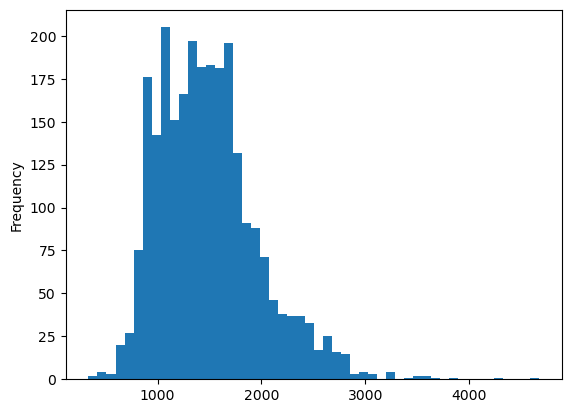

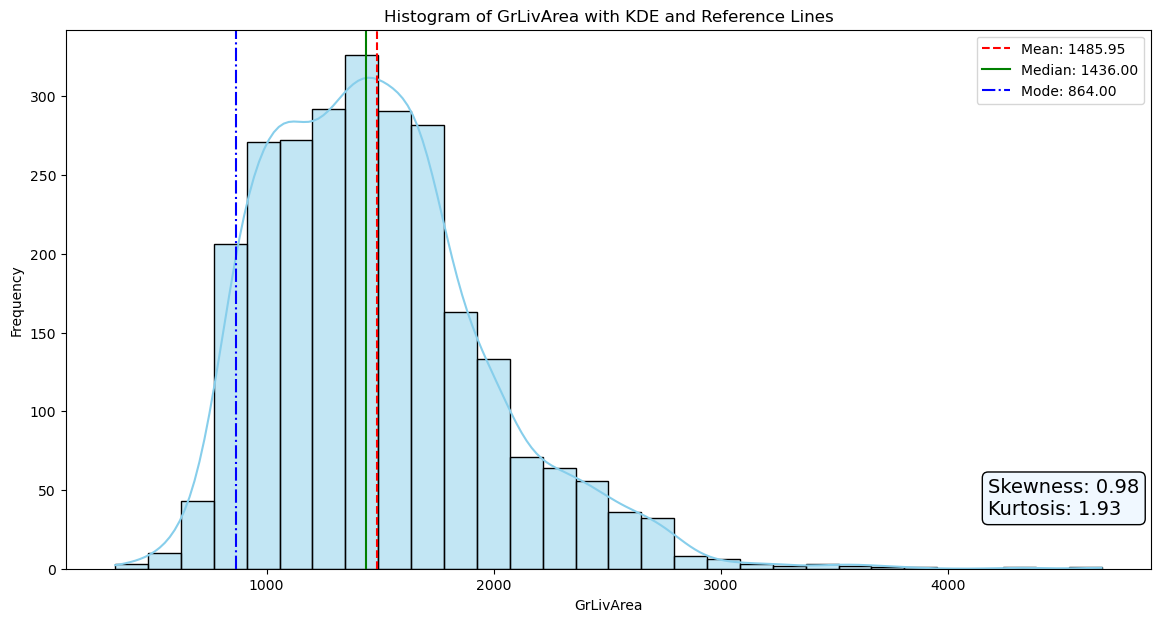

In [6]:
#GrLivArea: Continuous- Above grade(ground) living area sq ft
vcbd('GrLivArea')
mmm('GrLivArea')
housing['GrLivArea'].plot.hist(bins=50)
snshist('GrLivArea')
#right-skewed (DC recs removing 5 outliers with sq footage >4000 to help)

SalePrice
135000    32
140000    28
155000    27
130000    27
145000    24
          ..
258000     1
254750     1
40000      1
67000      1
139600     1
Name: count, Length: 870, dtype: int64
SalePrice
135000    0.012408
140000    0.010857
155000    0.010469
130000    0.010469
145000    0.009306
            ...   
258000    0.000388
254750    0.000388
40000     0.000388
67000     0.000388
139600    0.000388
Name: count, Length: 870, dtype: float64
count      2579.000000
mean     178053.442420
std       75044.983207
min       12789.000000
25%      129950.000000
50%      159900.000000
75%      209750.000000
max      755000.000000
Name: SalePrice, dtype: float64
mean: 178053.44241954247, median: 159900.0, mode: 0    135000
Name: SalePrice, dtype: int64, std: 75044.9832071625
range: 742211, var: 5631749504.563301, IQR: 79800.0
skewness: 1.7607507033716905, kurt: 5.430410648673599, 10th pctile: 107500.0, 90th pct: 272100.0000000001


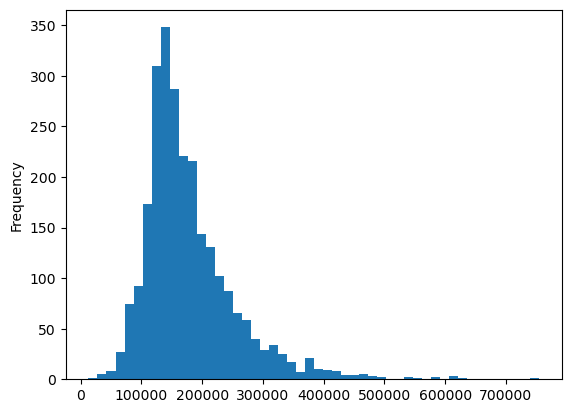

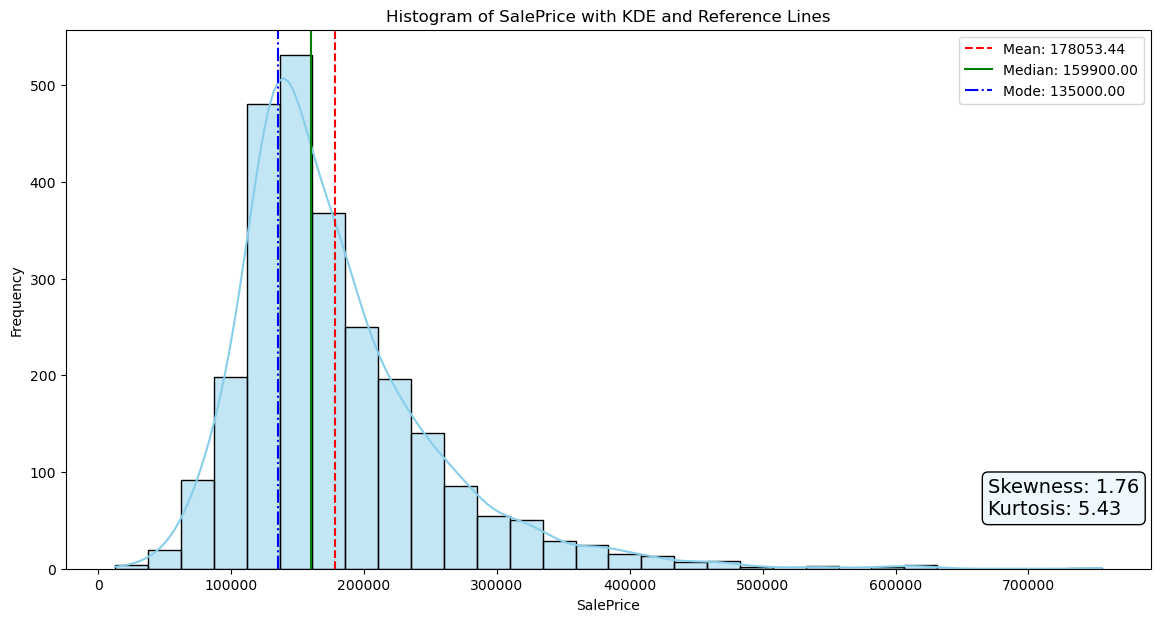

In [7]:
#SalePrice: TARGET- Continuous- $$
vcbd('SalePrice')
print(housing['SalePrice'].describe())
mmm('SalePrice')
housing['SalePrice'].plot.hist(bins=50)
snshist('SalePrice')

MSSubClass
20     939
60     502
50     258
120    169
30     123
160    120
70     116
80     109
90      87
190     53
85      43
75      21
45      17
180     15
40       6
150      1
Name: count, dtype: int64
MSSubClass
20     0.364095
60     0.194649
50     0.100039
120    0.065529
30     0.047693
160    0.046530
70     0.044979
80     0.042264
90     0.033734
190    0.020551
85     0.016673
75     0.008143
45     0.006592
180    0.005816
40     0.002326
150    0.000388
Name: count, dtype: float64


<Axes: xlabel='MSSubClass'>

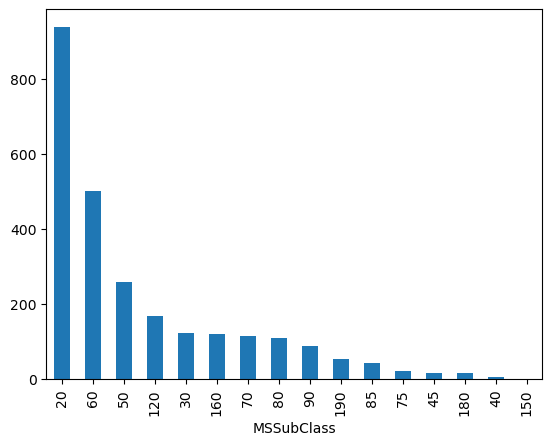

In [8]:
#MSSubClass: Nominal- Type of Dwelling
vcbd('MSSubClass')
#55% are 1946 and newer, 1 and 2 stories
housing['MSSubClass'].value_counts(dropna = False).plot.bar()

    020	1-STORY 1946 & NEWER ALL STYLES
    030	1-STORY 1945 & OLDER
    040	1-STORY W/FINISHED ATTIC ALL AGES
    045	1-1/2 STORY - UNFINISHED ALL AGES
    050	1-1/2 STORY FINISHED ALL AGES
    060	2-STORY 1946 & NEWER
    070	2-STORY 1945 & OLDER
    075	2-1/2 STORY ALL AGES
    080	SPLIT OR MULTI-LEVEL
    085	SPLIT FOYER
    090	DUPLEX - ALL STYLES AND AGES
    120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    150	1-1/2 STORY PUD - ALL AGES
    160	2-STORY PUD - 1946 & NEWER
    180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning
RL         2007
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: count, dtype: int64
MSZoning
RL         0.778209
RM         0.162078
FV         0.043815
RH         0.008143
C (all)    0.006592
I (all)    0.000775
A (agr)    0.000388
Name: count, dtype: float64


<Axes: xlabel='MSZoning'>

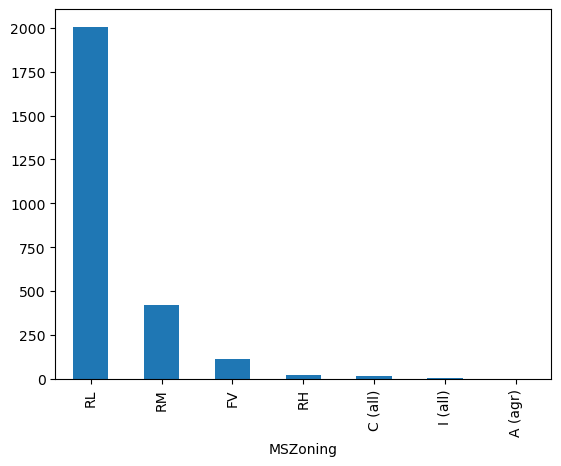

In [9]:
#MSZoning: Nominal- General Zoning Classification
vcbd('MSZoning')
housing['MSZoning'].value_counts(dropna = False).plot.bar()

   A	Agriculture
   C	Commercial
   FV	Floating Village Residential
   I	Industrial
   RH	Residential High Density
   RL	Residential Low Density
   RP	Residential Low Density Park 
   RM	Residential Medium Density

LotFrontage
NaN      462
60.0     246
80.0     127
70.0     124
50.0     111
        ... 
137.0      1
131.0      1
22.0       1
168.0      1
138.0      1
Name: count, Length: 127, dtype: int64
LotFrontage
NaN      0.179139
60.0     0.095386
80.0     0.049244
70.0     0.048081
50.0     0.043040
           ...   
137.0    0.000388
131.0    0.000388
22.0     0.000388
168.0    0.000388
138.0    0.000388
Name: count, Length: 127, dtype: float64
mean: 68.51062824752007, median: 68.0, mode: 0    60.0
Name: LotFrontage, dtype: float64, std: 22.83986138080395
range: 292.0, var: 521.6592678943397, IQR: 23.0
skewness: 1.169630134251428, kurt: 8.031285728367651, 10th pctile: 42.0, 90th pct: 94.0


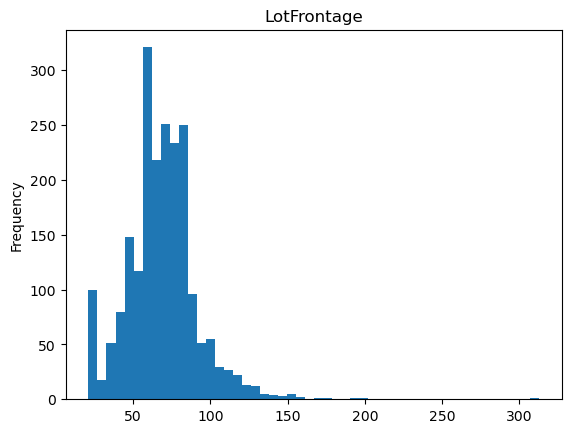

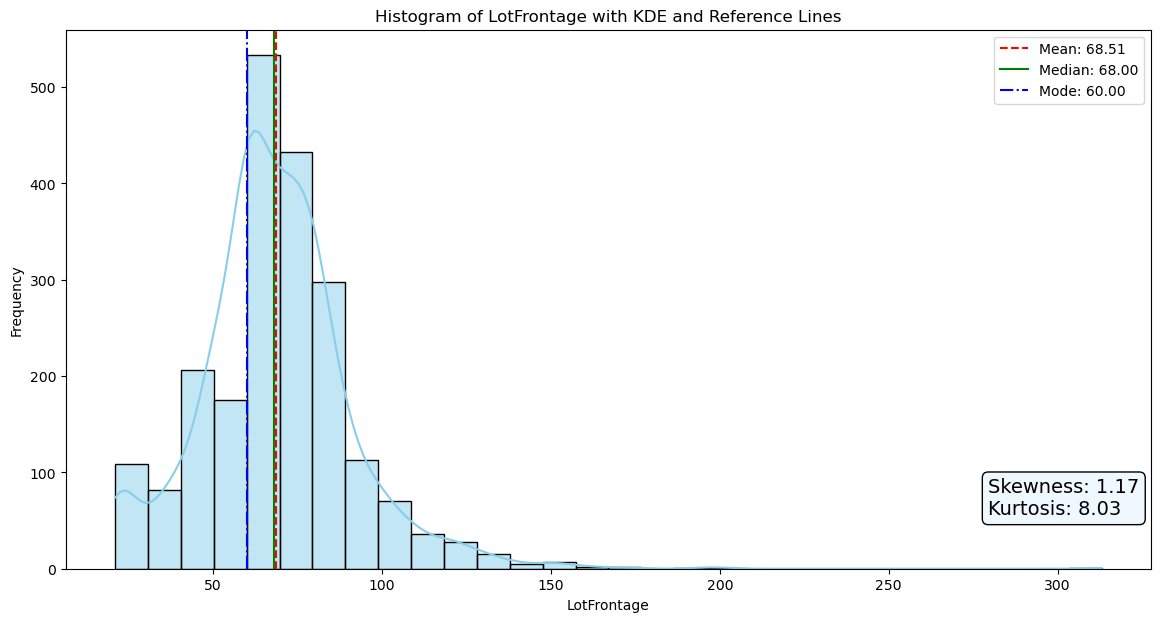

In [10]:
#'LotFrontage': Continuous- Linear feet of street connected to property
vcbd('LotFrontage')
mmm('LotFrontage')
housing['LotFrontage'].plot.hist(bins=50, title = 'LotFrontage')
#right-skewed, lot frontage is expensive/infrequent
snshist('LotFrontage')

LotArea
9600     41
7200     39
6000     34
9000     26
10800    24
         ..
11613     1
8581      1
8139      1
14977     1
9554      1
Name: count, Length: 1753, dtype: int64
LotArea
9600     0.015898
7200     0.015122
6000     0.013183
9000     0.010081
10800    0.009306
           ...   
11613    0.000388
8581     0.000388
8139     0.000388
14977    0.000388
9554     0.000388
Name: count, Length: 1753, dtype: float64
mean: 10119.26948429624, median: 9382.0, mode: 0    9600
Name: LotArea, dtype: int64, std: 8128.3898816051615
range: 213945, var: 66070722.067381166, IQR: 4079.0
skewness: 13.071928226681054, kurt: 265.07163796678583, 10th pctile: 4590.0, 90th pct: 14251.400000000001


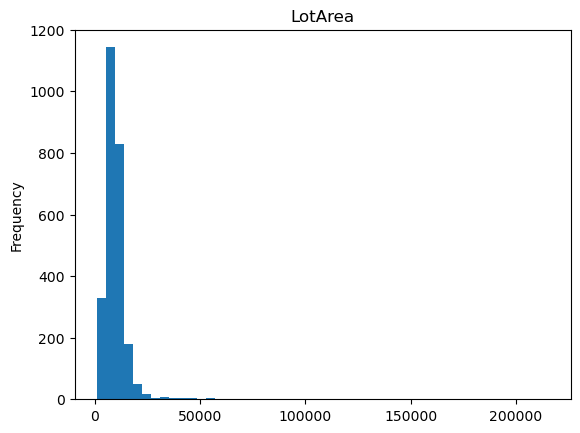

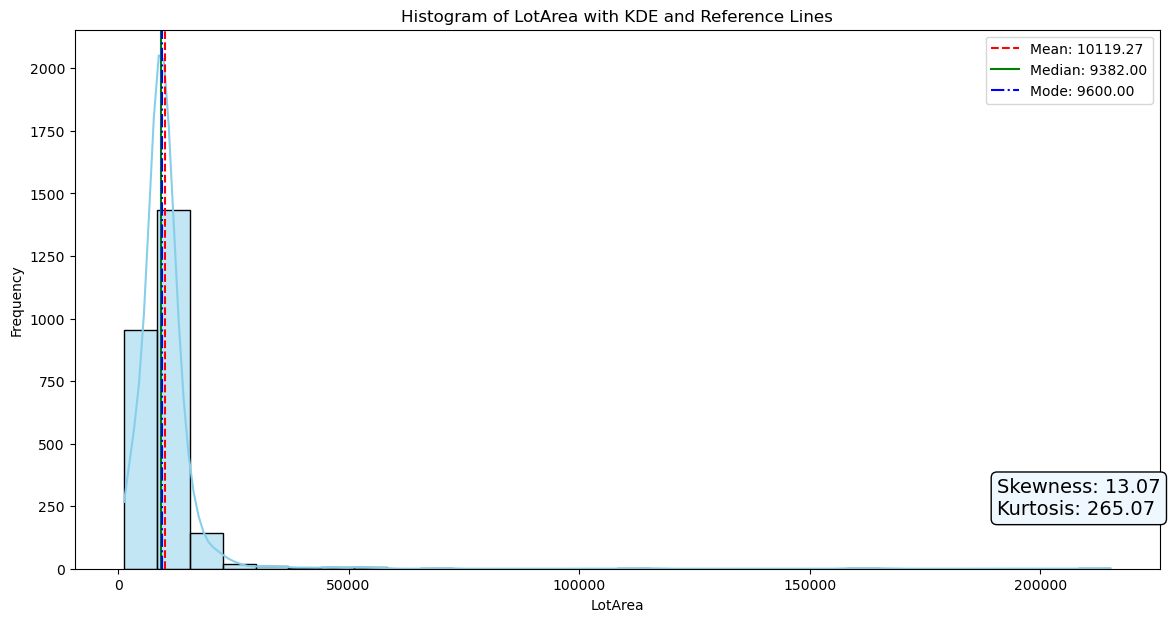

In [11]:
#'LotFrontage': Continuous- Lot size in ft^2
vcbd('LotArea')
mmm('LotArea')
housing['LotArea'].plot.hist(bins=50, title = 'LotArea')
snshist('LotArea')

Street
Pave    2569
Grvl      10
Name: count, dtype: int64
Street
Pave    0.996123
Grvl    0.003877
Name: count, dtype: float64


<Axes: title={'center': 'Street'}, xlabel='Street'>

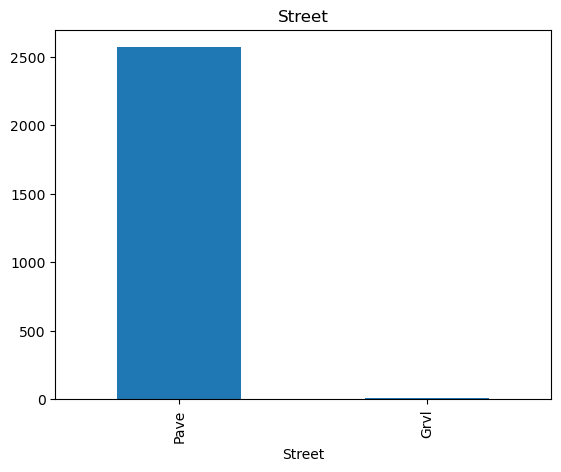

In [12]:
#Street: Nominal- Tyhpe of road access to property
vcbd('Street')
housing['Street'].value_counts(dropna = False).plot.bar(title = 'Street')

Alley
NaN     2411
Grvl     105
Pave      63
Name: count, dtype: int64
Alley
NaN     0.934858
Grvl    0.040713
Pave    0.024428
Name: count, dtype: float64


<Axes: title={'center': 'Alley'}, xlabel='Alley'>

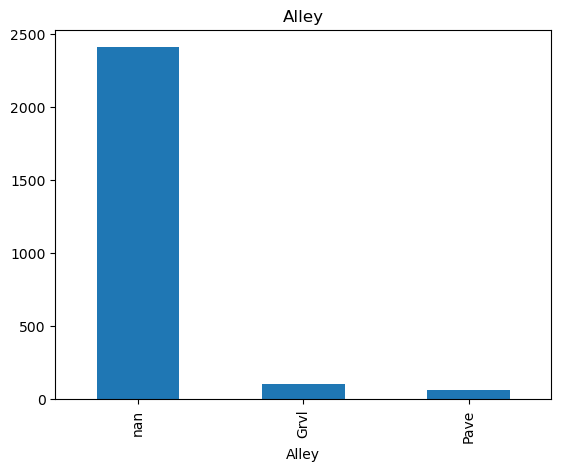

In [13]:
#Alley: Nominal- Type of alley access to property
vcbd('Alley')
housing['Alley'].value_counts(dropna = False).plot.bar(title = 'Alley')

LotShape
Reg    1640
IR1     855
IR2      71
IR3      13
Name: count, dtype: int64
LotShape
Reg    0.635905
IR1    0.331524
IR2    0.027530
IR3    0.005041
Name: count, dtype: float64


<Axes: title={'center': 'LotShape'}, xlabel='LotShape'>

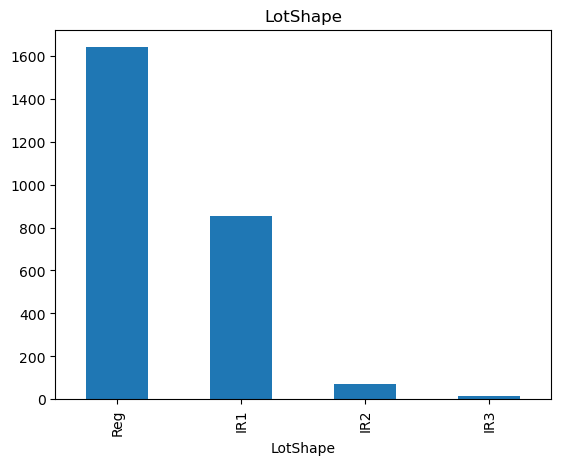

In [14]:
#Lot Shape: Ordinal Cat- Shape of property
vcbd('LotShape')
housing['LotShape'].value_counts(dropna = False).plot.bar(title = 'LotShape')

LandContour
Lvl    2337
Bnk      95
HLS      95
Low      52
Name: count, dtype: int64
LandContour
Lvl    0.906165
Bnk    0.036836
HLS    0.036836
Low    0.020163
Name: count, dtype: float64


<Axes: title={'center': 'LandContour'}, xlabel='LandContour'>

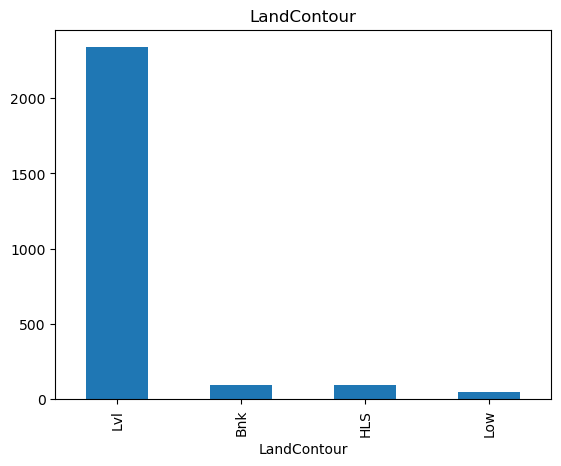

In [15]:
#'LandContour': Nominal- Flatness
vcbd('LandContour')
housing['LandContour'].value_counts(dropna = False).plot.bar(title = 'LandContour')

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Utilities
AllPub    2577
NoSewr       2
Name: count, dtype: int64
Utilities
AllPub    0.999225
NoSewr    0.000775
Name: count, dtype: float64


<Axes: title={'center': 'Utilities'}, xlabel='Utilities'>

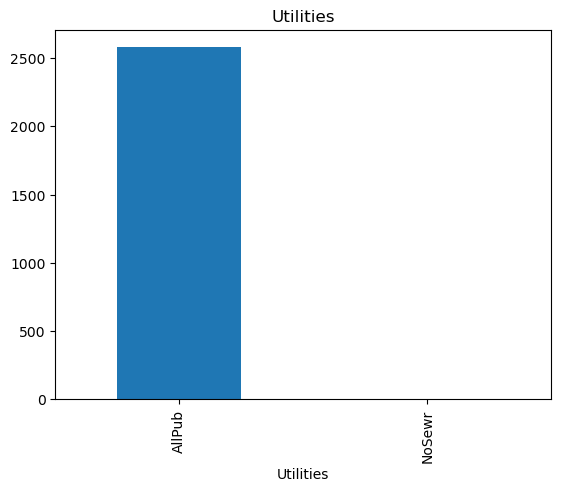

In [16]:
#Lot Shape: Ordinal Cat- Shape of property
vcbd('Utilities')
housing['Utilities'].value_counts(dropna = False).plot.bar(title = 'Utilities')
#two values from dictionary aren't even in here?

       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

LotConfig
Inside     1885
Corner      439
CulDSac     164
FR2          78
FR3          13
Name: count, dtype: int64
LotConfig
Inside     0.730903
Corner     0.170221
CulDSac    0.063591
FR2        0.030244
FR3        0.005041
Name: count, dtype: float64


<Axes: title={'center': 'LotConfig'}, xlabel='LotConfig'>

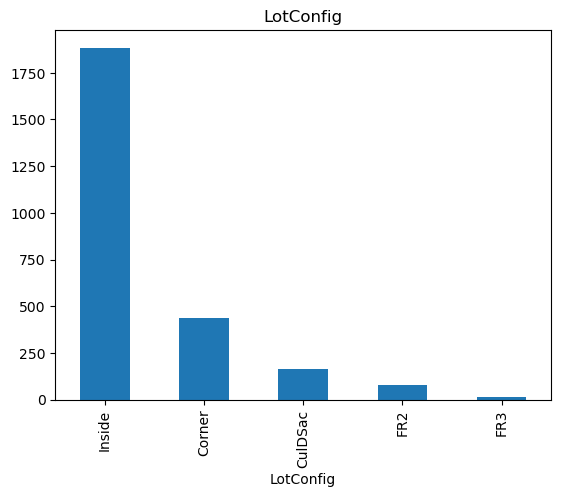

In [17]:
#'LotConfig': Nominal- Lot Configuration
vcbd('LotConfig')
housing['LotConfig'].value_counts(dropna = False).plot.bar(title = 'LotConfig')

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
       Frontage= "boundary between a plot of land or a building and the road onto which the plot or building fronts."

LandSlope
Gtl    2458
Mod     108
Sev      13
Name: count, dtype: int64
LandSlope
Gtl    0.953083
Mod    0.041877
Sev    0.005041
Name: count, dtype: float64


<Axes: title={'center': 'LandSlope'}, xlabel='LandSlope'>

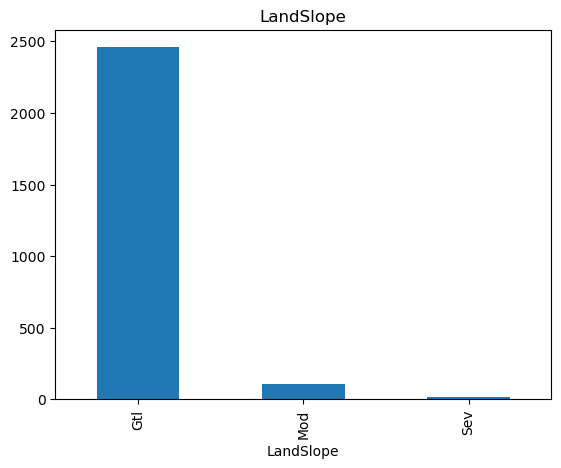

In [18]:
#'LandSlope': Ordinal Cat- Slope of property
vcbd('LandSlope')
housing['LandSlope'].value_counts(dropna = False).plot.bar(title = 'LandSlope')

Neighborhood
NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     92
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64
Neighborhood
NAmes      0.158976
CollgCr    0.091508
OldTown    0.082590
Edwards    0.063978
Somerst    0.055448
Gilbert    0.055448
Sawyer     0.053897
NWAmes     0.047693
NridgHt    0.046917
SawyerW    0.043815
Mitchel    0.040326
BrkSide    0.039938
Crawfor    0.035673
IDOTRR     0.029469
NoRidge    0.025979
Timber     0.020938
StoneBr    0.016673
SWISU      0.016285
ClearCr    0.015510
MeadowV    0.013183
BrDale     0.011245
Blmngtn    0.008918
Veenker    0.008918
NPkVill    0.008530
Blueste    0.003877
Greens     0.003102
GrnHill 

<Axes: title={'center': 'Neighborhood'}, xlabel='Neighborhood'>

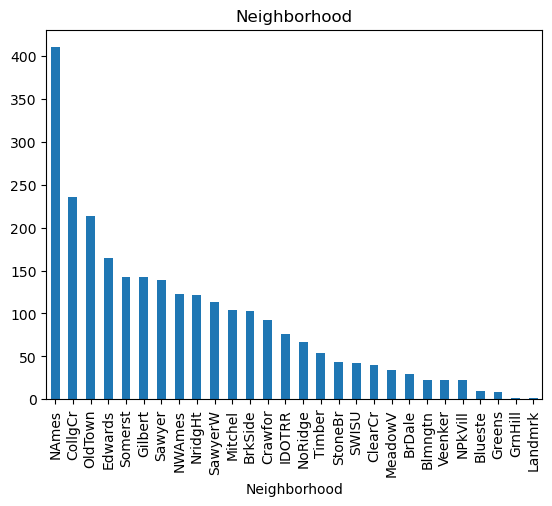

In [19]:
#'Neighborhood': Nominal- Physical Locations within Ames city limits
vcbd('Neighborhood')
housing['Neighborhood'].value_counts(dropna = False).plot.bar(title = 'Neighborhood')

Condition1
Norm      2227
Feedr      137
Artery      81
RRAn        40
PosN        37
RRAe        26
PosA        19
RRNn         8
RRNe         4
Name: count, dtype: int64
Condition1
Norm      0.863513
Feedr     0.053121
Artery    0.031408
RRAn      0.015510
PosN      0.014347
RRAe      0.010081
PosA      0.007367
RRNn      0.003102
RRNe      0.001551
Name: count, dtype: float64
Condition2
Norm      2554
Feedr       12
PosN         3
Artery       3
PosA         3
RRNn         2
RRAn         1
RRAe         1
Name: count, dtype: int64
Condition2
Norm      0.990306
Feedr     0.004653
PosN      0.001163
Artery    0.001163
PosA      0.001163
RRNn      0.000775
RRAn      0.000388
RRAe      0.000388
Name: count, dtype: float64


Condition1  Condition2
Artery          81         3.0
Feedr          137        12.0
Norm          2227      2554.0
PosA            19         3.0
PosN            37         3.0
RRAe            26         1.0
RRAn            40         1.0
RRNe             4         NaN
RRNn             8         2.0

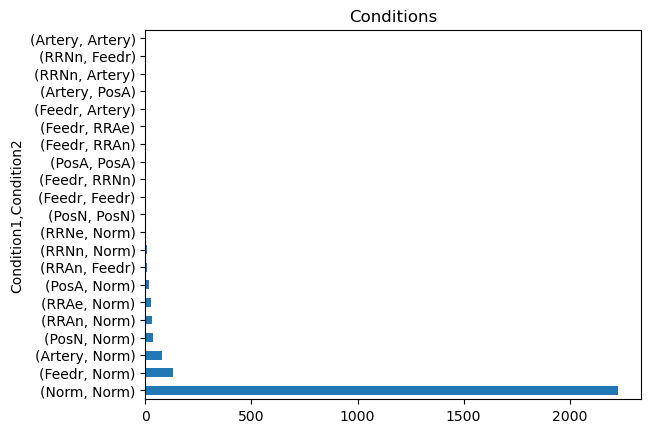

In [20]:
#'Condition 1/2': Nominal- Proximity to various Conditions
vcbd('Condition1')
vcbd('Condition2')
#housing[['Condition1', 'Condition2']] #norm norm
#will need to find ways to dummify, aggregate, see if correllated
housing[['Condition1', 'Condition2']].value_counts(dropna = False).plot.barh(title = 'Conditions')

housing[['Condition1', 'Condition2']].apply(pd.Series.value_counts)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

BldgType
1Fam      2138
TwnhsE     202
Twnhs       98
Duplex      87
2fmCon      54
Name: count, dtype: int64
BldgType
1Fam      0.829003
TwnhsE    0.078325
Twnhs     0.037999
Duplex    0.033734
2fmCon    0.020938
Name: count, dtype: float64


<Axes: title={'center': 'BldgType'}, xlabel='BldgType'>

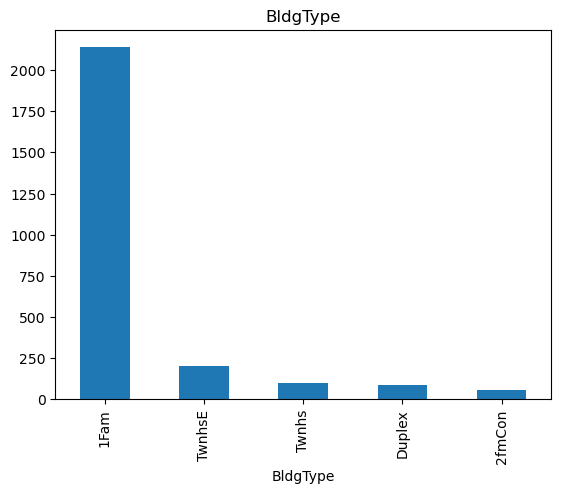

In [21]:
# 'BldgType' (Nominal): Type of dwelling
vcbd('BldgType')
housing['BldgType'].value_counts(dropna = False).plot.bar(title = 'BldgType')

       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

HouseStyle
1Story    1288
2Story     773
1.5Fin     283
SLvl       118
SFoyer      70
2.5Unf      22
1.5Unf      19
2.5Fin       6
Name: count, dtype: int64
HouseStyle
1Story    0.499418
2Story    0.299729
1.5Fin    0.109732
SLvl      0.045754
SFoyer    0.027142
2.5Unf    0.008530
1.5Unf    0.007367
2.5Fin    0.002326
Name: count, dtype: float64


<Axes: title={'center': 'HouseStyle'}, xlabel='HouseStyle'>

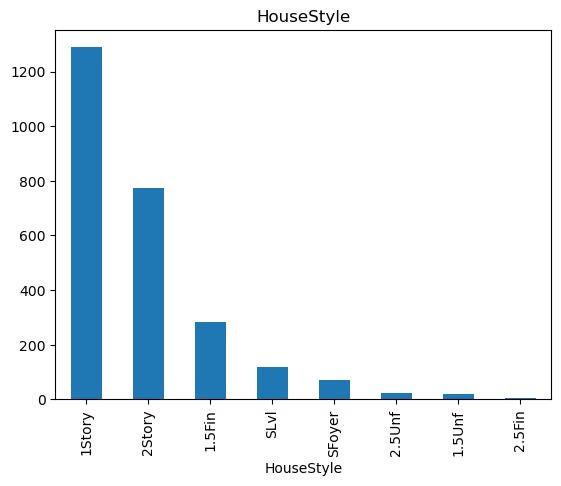

In [22]:
# 'HouseStyle' (Nominal): Style of dwelling
vcbd('HouseStyle')
housing['HouseStyle'].value_counts(dropna = False).plot.bar(title = 'HouseStyle')

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	        Split Level

OverallQual
5     752
6     669
7     525
8     290
4     195
9      80
3      32
10     20
2      13
1       3
Name: count, dtype: int64
OverallQual
5     0.291586
6     0.259403
7     0.203567
8     0.112447
4     0.075611
9     0.031020
3     0.012408
10    0.007755
2     0.005041
1     0.001163
Name: count, dtype: float64
mean: 6.046529662659946, median: 6.0, mode: 0    5
Name: OverallQual, dtype: int64, std: 1.3677001643340276
range: 9, var: 1.8706037395193265, IQR: 2.0
skewness: 0.1864172758279981, kurt: 0.12329695785463146, 10th pctile: 5.0, 90th pct: 8.0


<Axes: title={'center': 'OverallQual'}, xlabel='OverallQual'>

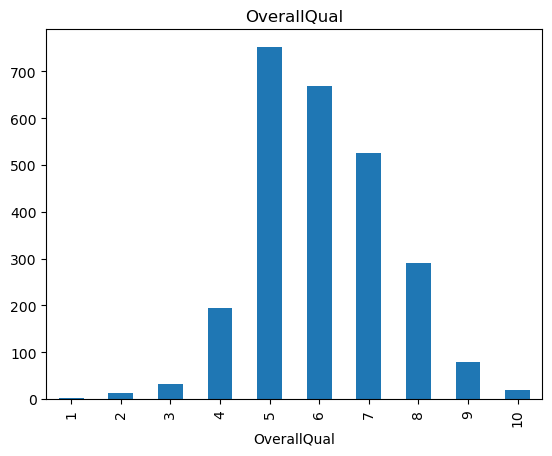

In [23]:
#'OverallQual': Ordinal- overall material and finish of house
vcbd('OverallQual')
mmm('OverallQual')
sortme = housing['OverallQual'].value_counts(dropna = False).sort_index()
sortme
sortme.plot.bar(title = 'OverallQual')

OverallCond
5    1402
6     497
7     360
8     140
4      88
9      41
3      39
2       8
1       4
Name: count, dtype: int64
OverallCond
5    0.543622
6    0.192710
7    0.139589
8    0.054285
4    0.034122
9    0.015898
3    0.015122
2    0.003102
1    0.001551
Name: count, dtype: float64
mean: 5.618456766188445, median: 5.0, mode: 0    5
Name: OverallCond, dtype: int64, std: 1.1222002413401444
range: 8, var: 1.2593333816638785, IQR: 1.0
skewness: 0.6250178605598323, kurt: 1.1691521628975514, 10th pctile: 5.0, 90th pct: 7.0


<Axes: title={'center': 'OverallCond'}, xlabel='OverallCond'>

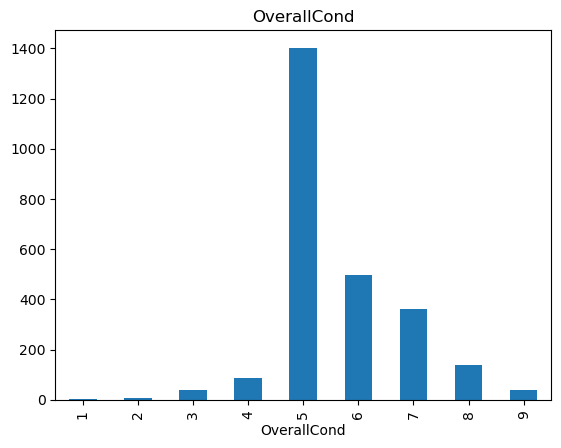

In [24]:
#'OverallCond': Ordinal- overall condition of house
vcbd('OverallCond')
mmm('OverallCond')
sortme2 = housing['OverallCond'].value_counts(dropna = False).sort_index()
sortme2
sortme2.plot.bar(title = 'OverallCond')

#Does condition correllate with quality enough to consolidate this?

YearBuilt
2005    109
2004     96
2003     86
2006     80
2007     64
       ... 
1875      1
1893      1
1904      1
1913      1
1879      1
Name: count, Length: 114, dtype: int64
YearBuilt
2005    0.042264
2004    0.037224
2003    0.033346
2006    0.031020
2007    0.024816
          ...   
1875    0.000388
1893    0.000388
1904    0.000388
1913    0.000388
1879    0.000388
Name: count, Length: 114, dtype: float64
mean: 1970.3257076386196, median: 1972.0, mode: 0    2005
Name: YearBuilt, dtype: int64, std: 29.7194693794376
range: 138, var: 883.2468601953293, IQR: 46.0
skewness: -0.5991992329522701, kurt: -0.4408670863517252, 10th pctile: 1925.0, 90th pct: 2005.0


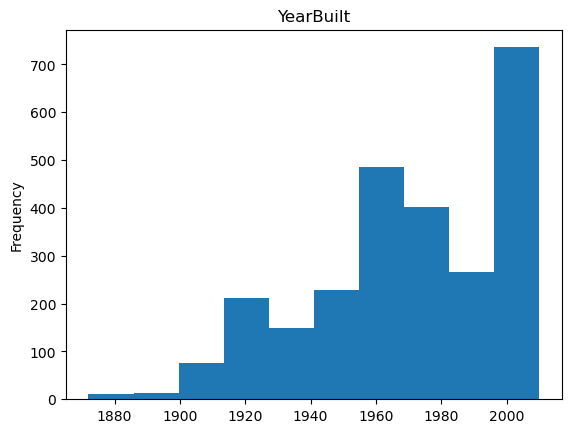

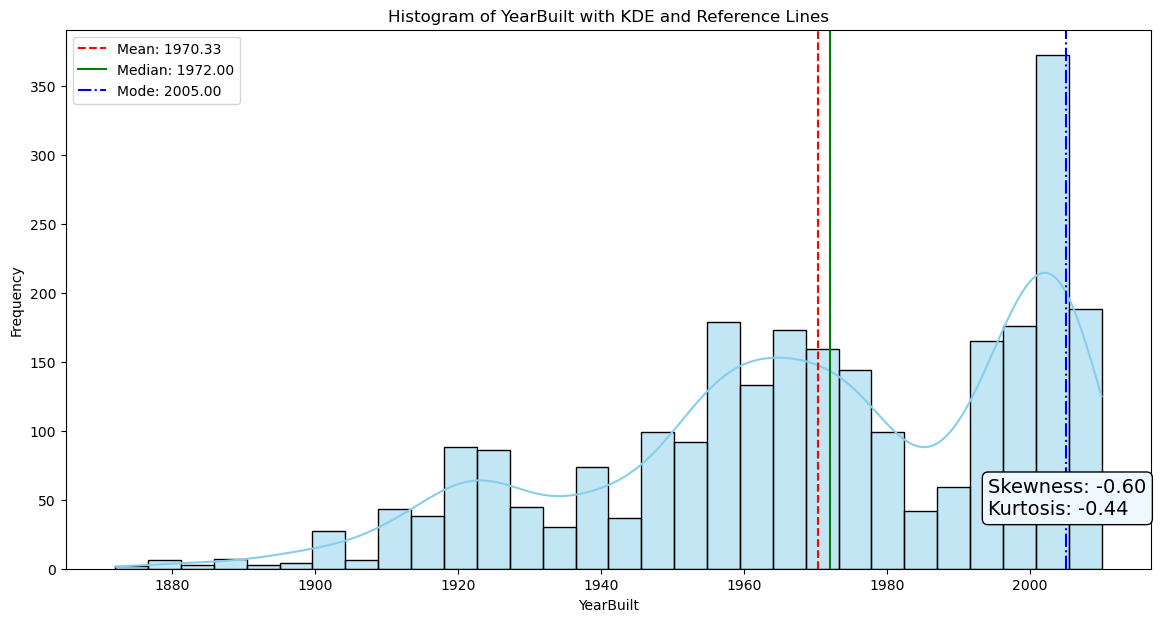

In [25]:
#'YearBuilt': Discrete- orig constr date
vcbd('YearBuilt')
mmm('YearBuilt')
housing['YearBuilt'].plot.hist(bins=10, title = 'YearBuilt')
#consider normalizing/standardizing- hunch that old and new houses most expensive
snshist('YearBuilt')

YearRemodAdd
1950    310
2006    136
2005    136
2004    105
2007    101
       ... 
1986     12
1952     11
1983     11
1982      8
2010      6
Name: count, Length: 61, dtype: int64
YearRemodAdd
1950    0.120202
2006    0.052734
2005    0.052734
2004    0.040713
2007    0.039162
          ...   
1986    0.004653
1952    0.004265
1983    0.004265
1982    0.003102
2010    0.002326
Name: count, Length: 61, dtype: float64
yrsbtwn
0      1386
1       352
30       34
40       29
25       24
       ... 
116       1
109       1
122       1
127       1
66        1
Name: count, Length: 116, dtype: int64
yrsbtwn
0      0.537418
1      0.136487
30     0.013183
40     0.011245
25     0.009306
         ...   
116    0.000388
109    0.000388
122    0.000388
127    0.000388
66     0.000388
Name: count, Length: 116, dtype: float64


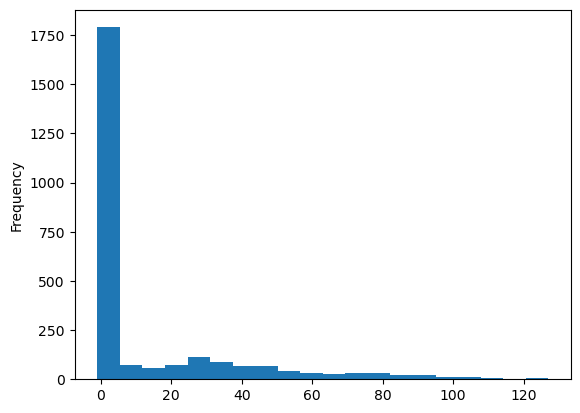

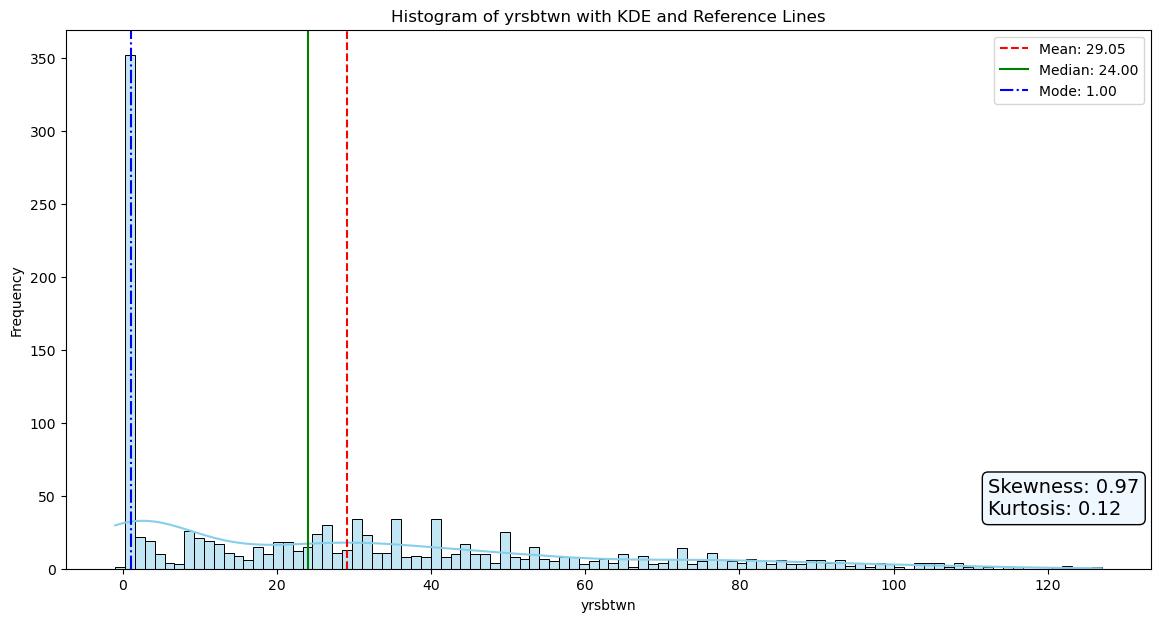

In [26]:
# 'YearRemodAdd'- Discrete: remodel date (same as const if none)
vcbd('YearRemodAdd')
copy['yrsbtwn'] = copy['YearRemodAdd'] - copy['YearBuilt']


print (copy['yrsbtwn'].value_counts(dropna=False)) 
print (copy['yrsbtwn'].value_counts()/len(housing))

copy['yrsbtwn'].plot.hist(bins = 20)
#vast majority of remodels are within a year or two of the home being built

nozeromask = copy.loc[copy['yrsbtwn'] != 0]
snshist(framename = nozeromask, colname = 'yrsbtwn', bins = 100)

RoofStyle
Gable      2058
Hip         473
Gambrel      18
Flat         16
Mansard      10
Shed          4
Name: count, dtype: int64
RoofStyle
Gable      0.797984
Hip        0.183404
Gambrel    0.006979
Flat       0.006204
Mansard    0.003877
Shed       0.001551
Name: count, dtype: float64


<Axes: title={'center': 'RoofStyle'}, ylabel='RoofStyle'>

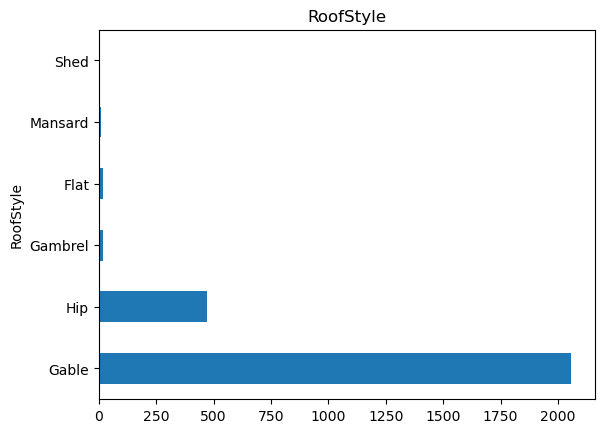

In [27]:
#'RoofStyle' (Nominal): Type of roof
vcbd('RoofStyle')
housing['RoofStyle'].value_counts(dropna = False).plot.barh(title = 'RoofStyle')

RoofMatl
CompShg    2543
Tar&Grv      18
WdShake       8
WdShngl       7
Metal         1
Roll          1
Membran       1
Name: count, dtype: int64
RoofMatl
CompShg    0.986041
Tar&Grv    0.006979
WdShake    0.003102
WdShngl    0.002714
Metal      0.000388
Roll       0.000388
Membran    0.000388
Name: count, dtype: float64


<Axes: title={'center': 'RoofMatl'}, ylabel='RoofMatl'>

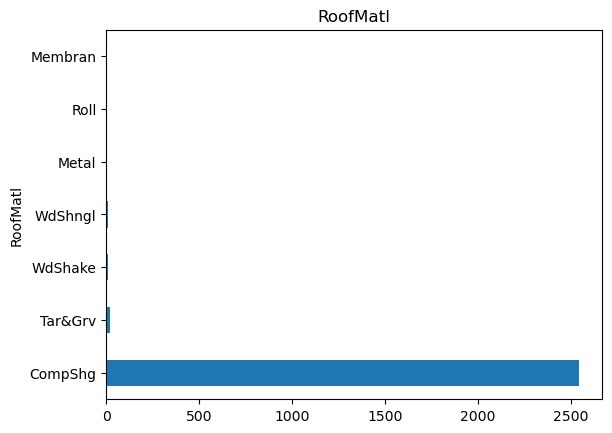

In [28]:
#'RoofMatl' (Nominal): Roof Material
vcbd('RoofMatl')
housing['RoofMatl'].value_counts(dropna = False).plot.barh(title = 'RoofMatl')
#Composite Shingle

Exterior1st
VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    384
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
AsphShn      2
CBlock       2
ImStucc      1
PreCast      1
Name: count, dtype: int64
Exterior1st
VinylSd    0.336565
HdBoard    0.161303
MetalSd    0.157813
Wd Sdng    0.148895
Plywood    0.075223
CemntBd    0.037611
BrkFace    0.031020
WdShing    0.019775
Stucco     0.014347
AsbShng    0.013183
BrkComm    0.001939
AsphShn    0.000775
CBlock     0.000775
ImStucc    0.000388
PreCast    0.000388
Name: count, dtype: float64
Exterior1st
VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    384
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
AsphShn      2
CBlock       2
ImStucc      1
PreCast      1
Name: count, dtype: int64
Exterior1st
VinylSd    0.336565
HdBoard    0.161303
MetalSd    0.157813
Wd Sdng    0.148895
Plywood    0.075223
CemntBd    0.037611
Br

<Axes: title={'center': 'Exteriors'}, ylabel='Exterior1st,Exterior2nd'>

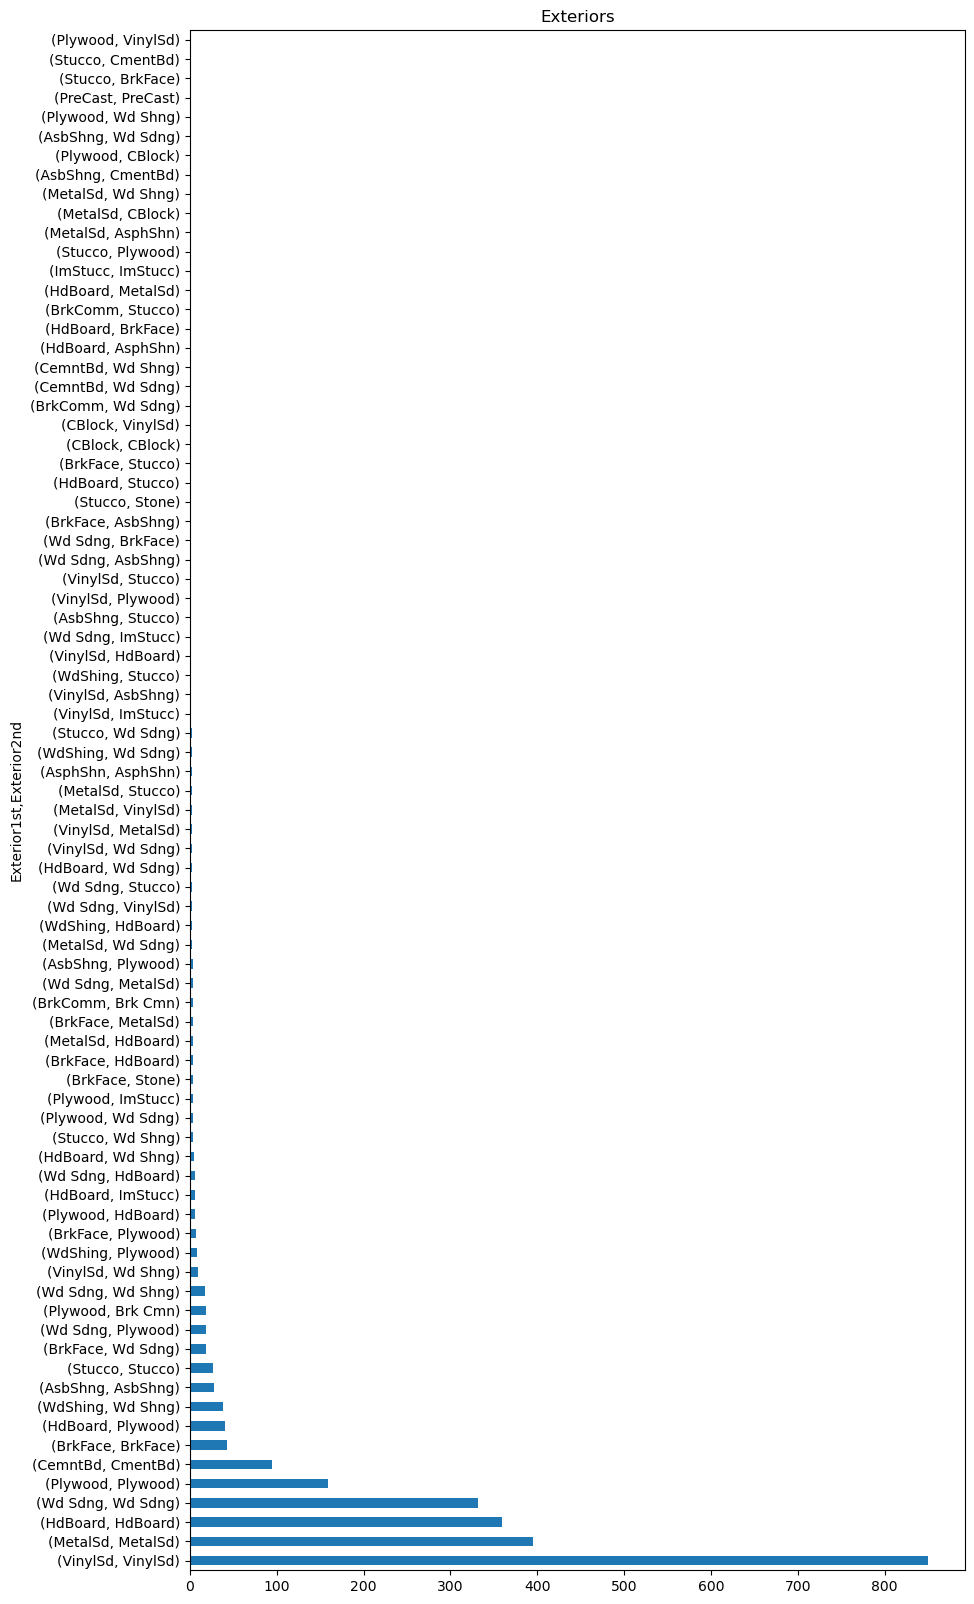

In [29]:
#'Exterior 1/2': Nominal- Exterior Covering (2 if more than one)

vcbd('Exterior1st')
vcbd('Exterior1st')
housing[['Exterior1st', 'Exterior2nd']].apply(pd.Series.value_counts)
housing[['Exterior1st', 'Exterior2nd']].value_counts(dropna = False).plot.barh(title = 'Exteriors', figsize = (10, 20))
#most are one exterior material: vinyl, metal, hard board, wood siding, plywood, cement

MasVnrType
NaN        1572
BrkFace     804
Stone       183
BrkCmn       20
Name: count, dtype: int64
MasVnrType
NaN        0.609539
BrkFace    0.311749
Stone      0.070958
BrkCmn     0.007755
Name: count, dtype: float64


<Axes: title={'center': 'MasVnrType'}, ylabel='MasVnrType'>

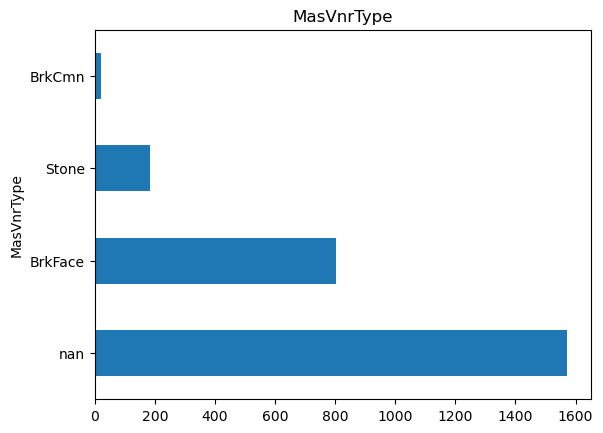

In [30]:
#'MasVnrType' (Nominal): Masonry veneer type
vcbd('MasVnrType')
housing['MasVnrType'].value_counts(dropna = False).plot.barh(title = 'MasVnrType')

MasVnrArea
0.0      1553
NaN        14
120.0      13
216.0      11
108.0      10
         ... 
279.0       1
406.0       1
528.0       1
634.0       1
293.0       1
Name: count, Length: 417, dtype: int64
MasVnrArea
0.0      0.602171
NaN      0.005428
120.0    0.005041
216.0    0.004265
108.0    0.003877
           ...   
279.0    0.000388
406.0    0.000388
528.0    0.000388
634.0    0.000388
293.0    0.000388
Name: count, Length: 417, dtype: float64
mean: 99.34697855750487, median: 0.0, mode: 0    0.0
Name: MasVnrArea, dtype: float64, std: 175.89568555092308
range: 1600.0, var: 30939.29219542921, IQR: 158.0
skewness: 2.6649433634584403, kurt: 9.96271839123746, 10th pctile: 0.0, 90th pct: 320.0


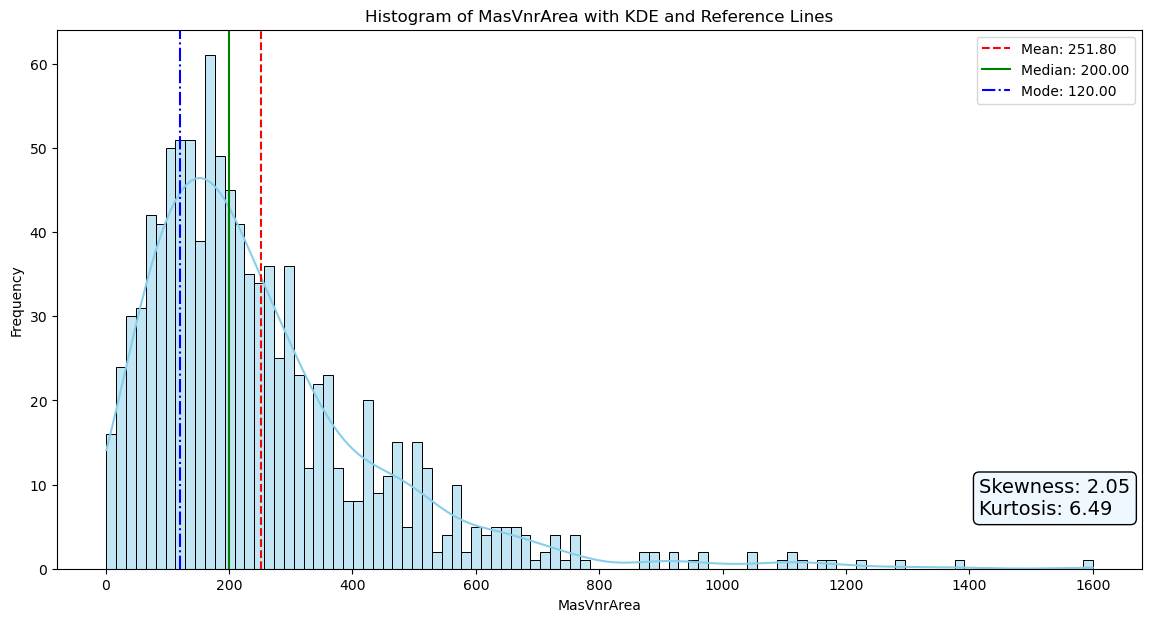

<Axes: title={'center': 'MasVnrArea'}, ylabel='Frequency'>

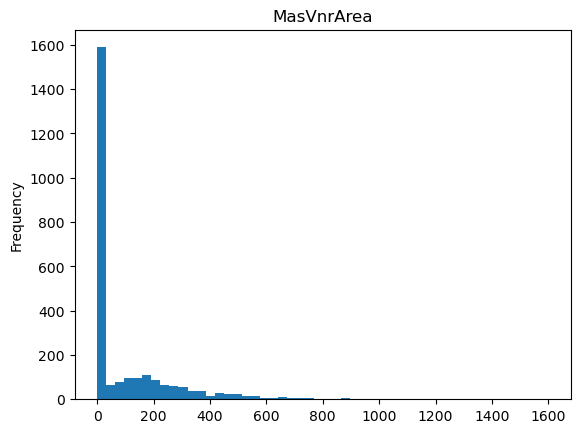

In [31]:
# 'MasVnrArea'- Continuous: Masonry veneer area in square feet

vcbd('MasVnrArea')
mmm('MasVnrArea')

nozeromask = copy.loc[copy['MasVnrArea'] != 0]
snshist(framename = nozeromask, colname = 'MasVnrArea', bins = 100)

housing['MasVnrArea'].plot.hist(bins=50, title = 'MasVnrArea')

ExterQual
TA    1635
Gd     841
Ex      73
Fa      30
Name: count, dtype: int64
ExterQual
TA    0.633967
Gd    0.326095
Ex    0.028306
Fa    0.011632
Name: count, dtype: float64


<Axes: title={'center': 'ExterQual'}, xlabel='ExterQual'>

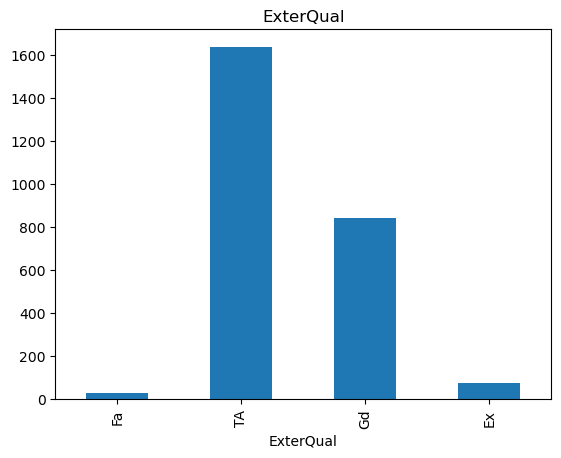

In [32]:
# 'ExterQual'-ordinal-  quality of material on exterior [Poor, Fair, Typical, Good, Excellent]

vcbd('ExterQual')

sortme4 = housing['ExterQual'].value_counts(dropna = False)[['Fa', 'TA', 'Gd', 'Ex']]

sortme4.plot.bar(title = 'ExterQual')

ExterCond
TA    2231
Gd     279
Fa      56
Ex      11
Po       2
Name: count, dtype: int64
ExterCond
TA    0.865064
Gd    0.108181
Fa    0.021714
Ex    0.004265
Po    0.000775
Name: count, dtype: float64


<Axes: title={'center': 'ExterCond'}, xlabel='ExterCond'>

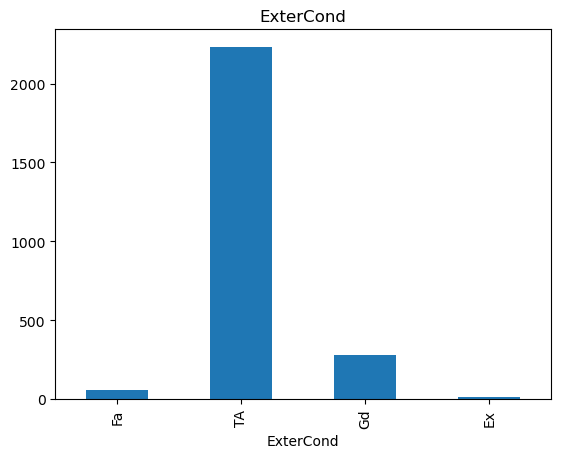

In [33]:
# 'ExterCond'- ordinal - condition of material on exterior
vcbd('ExterCond')

sortme4 = housing['ExterCond'].value_counts(dropna = False)[['Fa', 'TA', 'Gd', 'Ex']]

sortme4.plot.bar(title = 'ExterCond')

Foundation
CBlock    1139
PConc     1105
BrkTil     278
Slab        42
Stone       10
Wood         5
Name: count, dtype: int64
Foundation
CBlock    0.441644
PConc     0.428461
BrkTil    0.107794
Slab      0.016285
Stone     0.003877
Wood      0.001939
Name: count, dtype: float64


<Axes: title={'center': 'Foundation'}, xlabel='Foundation'>

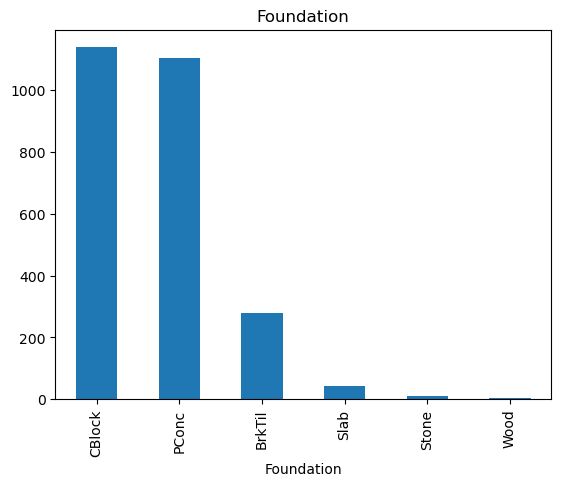

In [34]:
# 'Foundation' : Nominal- Type of Foundation
vcbd('Foundation')

housing['Foundation'].value_counts(dropna = False).plot.bar(title = 'Foundation')

BsmtQual
TA     1166
Gd     1076
Ex      188
Fa       78
NaN      69
Po        2
Name: count, dtype: int64
BsmtQual
TA     0.452113
Gd     0.417216
Ex     0.072896
Fa     0.030244
NaN    0.026755
Po     0.000775
Name: count, dtype: float64


<Axes: title={'center': 'BsmtQual'}, xlabel='BsmtQual'>

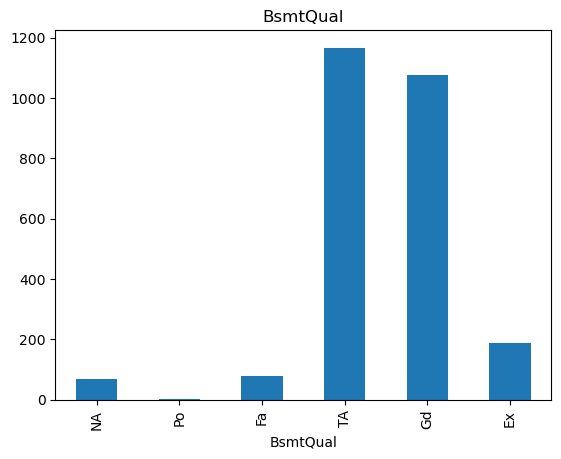

In [35]:
# 'BsmtQual'- ordinal - binned height of basement
vcbd('BsmtQual')

copy['BsmtQual'] = copy['BsmtQual'].fillna(value = 'NA')

sortme5 = copy['BsmtQual'].value_counts(dropna = False)[['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']]

sortme5.plot.bar(title = 'BsmtQual')
#HEIGHT

    Height   
        Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond
TA     2315
Gd      101
Fa       88
NaN      69
Ex        3
Po        3
Name: count, dtype: int64
BsmtCond
TA     0.897635
Gd     0.039162
Fa     0.034122
NaN    0.026755
Ex     0.001163
Po     0.001163
Name: count, dtype: float64


<Axes: title={'center': 'BsmtCond'}, xlabel='BsmtCond'>

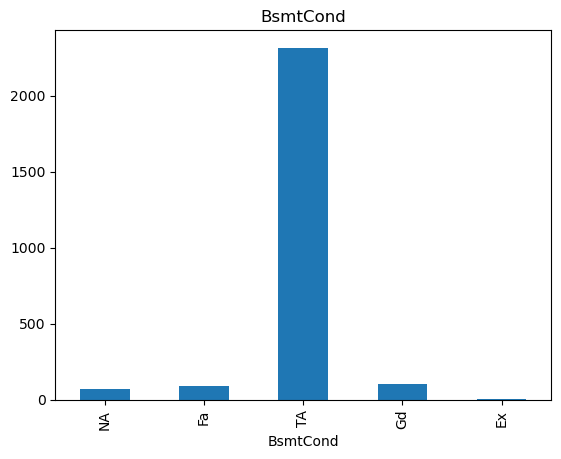

In [36]:
# 'BsmtCond'- ordinal - general condition of bsmnt, 'NA' = no bsmnt
vcbd('BsmtCond')

copy['BsmtCond'] = copy['BsmtCond'].fillna(value = 'NA')

sortme6 = copy['BsmtCond'].value_counts(dropna = False)[['NA', 'Fa', 'TA', 'Gd', 'Ex']]

sortme6.plot.bar(title = 'BsmtCond')

BsmtExposure
No     1708
Av      344
Gd      242
Mn      214
NaN      71
Name: count, dtype: int64
BsmtExposure
No     0.662272
Av     0.133385
Gd     0.093835
Mn     0.082978
NaN    0.027530
Name: count, dtype: float64


<Axes: title={'center': 'BsmtExposure'}, xlabel='BsmtExposure'>

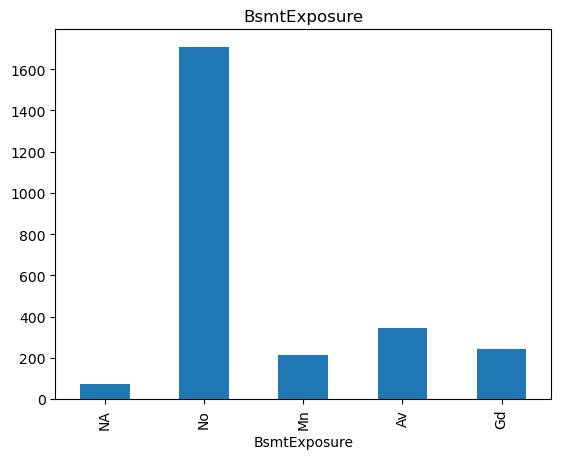

In [37]:
#'BsmtExposure'- ordinal- walkout or garden level walls: no bsmnt, no exp, minimum, avg, good (most split or foyers score avg+)
vcbd('BsmtExposure')

copy['BsmtExposure'] = copy['BsmtExposure'].fillna(value = 'NA')

sortme7 = copy['BsmtExposure'].value_counts(dropna = False)[['NA', 'No', 'Mn', 'Av', 'Gd']]

sortme7.plot.bar(title = 'BsmtExposure')

BsmtFinType1
GLQ    753
Unf    706
ALQ    397
Rec    265
BLQ    250
LwQ    139
NaN     69
Name: count, dtype: int64
BsmtFinType1
GLQ    0.291974
Unf    0.273750
ALQ    0.153936
Rec    0.102753
BLQ    0.096937
LwQ    0.053897
NaN    0.026755
Name: count, dtype: float64
BsmtFinType2
Unf    2179
Rec      97
LwQ      84
NaN      70
BLQ      64
ALQ      53
GLQ      32
Name: count, dtype: int64
BsmtFinType2
Unf    0.844901
Rec    0.037611
LwQ    0.032571
NaN    0.027142
BLQ    0.024816
ALQ    0.020551
GLQ    0.012408
Name: count, dtype: float64
     BsmtFinType1  BsmtFinType2
ALQ           397            53
BLQ           250            64
GLQ           753            32
LwQ           139            84
NA             69            70
Rec           265            97
Unf           706          2179


<Axes: title={'center': 'BsmtFinType'}, ylabel='BsmtFinType1,BsmtFinType2'>

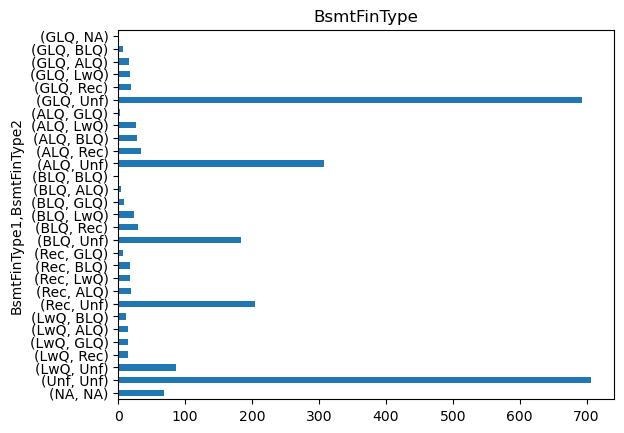

In [38]:
#'BsmtFinType1/2'- ordinal-rating of basement finished area:
#NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ- low qual, avg rec room, below avg living quarters, avg, good

vcbd('BsmtFinType1')
vcbd('BsmtFinType2')

copy['BsmtFinType1'] = copy['BsmtFinType1'].fillna(value = 'NA')
copy['BsmtFinType2'] = copy['BsmtFinType2'].fillna(value = 'NA')
sortme8 = copy[['BsmtFinType1', 'BsmtFinType2']].value_counts(dropna = False)[['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']]
print(copy[['BsmtFinType1', 'BsmtFinType2']].apply(pd.Series.value_counts))
sortme8.plot.barh(title = 'BsmtFinType')

BsmtFinType1
GLQ    753
Unf    706
ALQ    397
Rec    265
BLQ    250
LwQ    139
NaN     69
Name: count, dtype: int64
BsmtFinType1
GLQ    0.291974
Unf    0.273750
ALQ    0.153936
Rec    0.102753
BLQ    0.096937
LwQ    0.053897
NaN    0.026755
Name: count, dtype: float64
mean: 444.28510473235065, median: 384.0, mode: 0    0.0
Name: BsmtFinSF1, dtype: float64, std: 429.40701523093793
range: 2288.0, var: 184390.38472954294, IQR: 732.0
skewness: 0.8032078857609625, kurt: 0.1997170186712447, 10th pctile: 0.0, 90th pct: 1035.3000000000002


<Axes: title={'center': 'Avg Sqf of BsmtFinType1'}, ylabel='BsmtFinType1'>

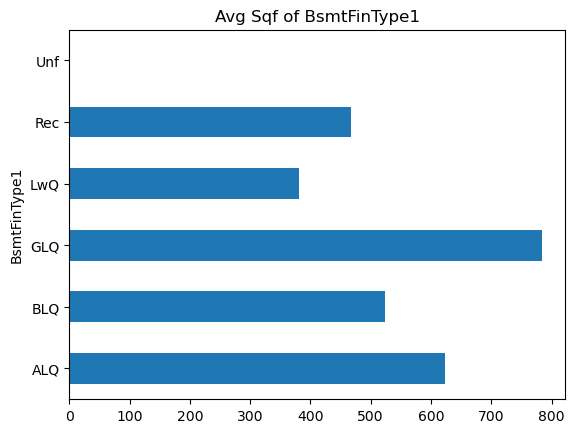

In [39]:
# 'BsmtFinType1', 'BsmtFinSF1'- ordinal then continuous
vcbd('BsmtFinType1')
mmm('BsmtFinSF1')

housing.groupby('BsmtFinType1')['BsmtFinSF1'].mean().plot.barh(title = 'Avg Sqf of BsmtFinType1')

BsmtFinType2
Unf    2179
Rec      97
LwQ      84
NaN      70
BLQ      64
ALQ      53
GLQ      32
Name: count, dtype: int64
BsmtFinType2
Unf    0.844901
Rec    0.037611
LwQ    0.032571
NaN    0.027142
BLQ    0.024816
ALQ    0.020551
GLQ    0.012408
Name: count, dtype: float64
mean: 53.259503491078355, median: 0.0, mode: 0    0.0
Name: BsmtFinSF2, dtype: float64, std: 174.45460596654232
range: 1526.0, var: 30434.409542941543, IQR: 0.0
skewness: 3.9904991916955876, kurt: 17.45408538862659, 10th pctile: 0.0, 90th pct: 159.90000000000055


<Axes: title={'center': 'Avg Sqf of BsmtFinType2'}, ylabel='BsmtFinType2'>

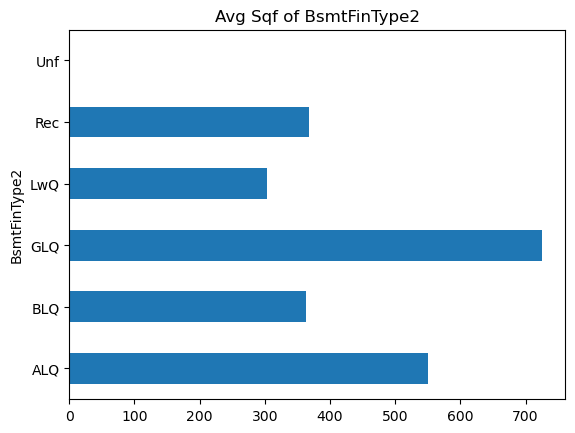

In [40]:
# 'BsmtFinType2', 'BsmtFinSF2'- ordinal then continuous
vcbd('BsmtFinType2')
mmm('BsmtFinSF2')

housing.groupby('BsmtFinType2')['BsmtFinSF2'].mean().plot.barh(title = 'Avg Sqf of BsmtFinType2')

BsmtUnfSF
0.0       216
384.0      19
572.0      11
216.0      10
600.0      10
         ... 
910.0       1
45.0        1
1242.0      1
472.0       1
505.0       1
Name: count, Length: 1061, dtype: int64
BsmtUnfSF
0.0       0.083753
384.0     0.007367
572.0     0.004265
216.0     0.003877
600.0     0.003877
            ...   
910.0     0.000388
45.0      0.000388
1242.0    0.000388
472.0     0.000388
505.0     0.000388
Name: count, Length: 1061, dtype: float64
mean: 539.1947245927075, median: 448.0, mode: 0    0.0
Name: BsmtUnfSF, dtype: float64, std: 425.2558180291682
range: 2336.0, var: 180842.51076765705, IQR: 569.0
skewness: 0.9620612550681655, kurt: 0.5812987727713512, 10th pctile: 52.69999999999999, 90th pct: 1143.0


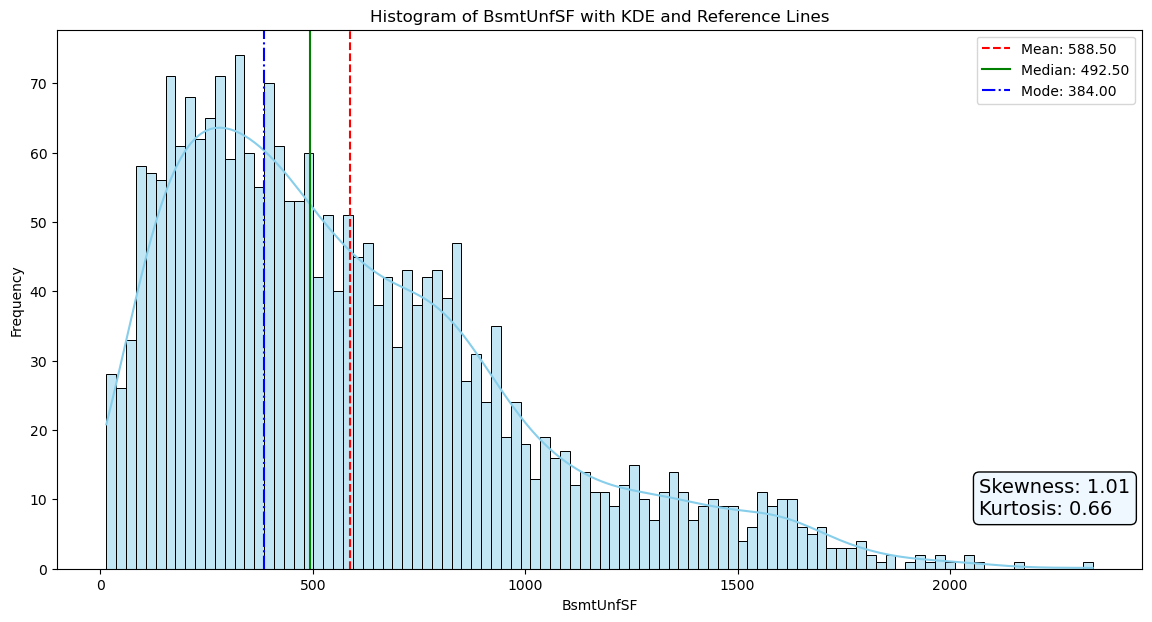

<Axes: title={'center': 'BsmtUnfSF'}, ylabel='Frequency'>

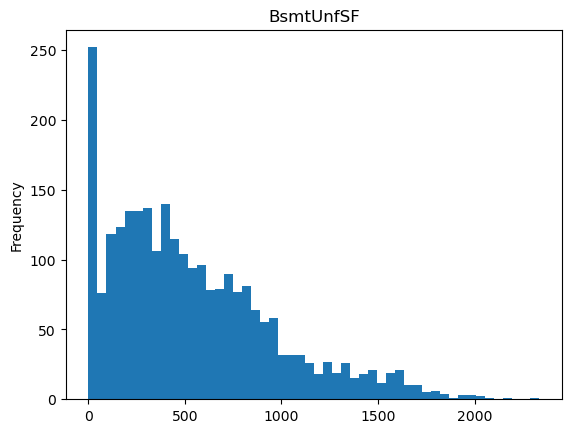

In [41]:
# 'BsmtUnfSF'- Continuous: Unifinished sq ft of basement area
vcbd('BsmtUnfSF')
mmm('BsmtUnfSF')

nozeromask = copy.loc[housing['BsmtUnfSF'] != 0]
nozeromask.head()
snshist(framename = nozeromask, colname = 'BsmtUnfSF', bins = 100)

housing['BsmtUnfSF'].plot.hist(bins=50, title = 'BsmtUnfSF')

TotalBsmtSF
864.0     68
0.0       68
912.0     25
672.0     25
1040.0    24
          ..
1976.0     1
1293.0     1
1221.0     1
407.0      1
484.0      1
Name: count, Length: 990, dtype: int64
TotalBsmtSF
864.0     0.026367
0.0       0.026367
912.0     0.009694
672.0     0.009694
1040.0    0.009306
            ...   
1976.0    0.000388
1293.0    0.000388
1221.0    0.000388
407.0     0.000388
484.0     0.000388
Name: count, Length: 990, dtype: float64
mean: 1036.7393328161365, median: 979.5, mode: 0      0.0
1    864.0
Name: TotalBsmtSF, dtype: float64, std: 418.6280829103381
range: 3206.0, var: 175249.4718011849, IQR: 474.75
skewness: 0.514713926235858, kurt: 1.707262418948524, 10th pctile: 600.0, 90th pct: 1594.0


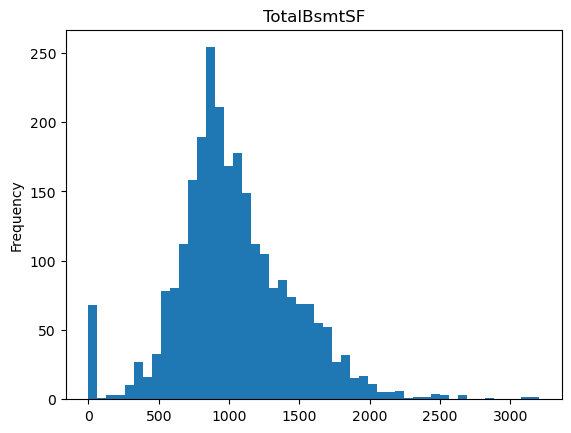

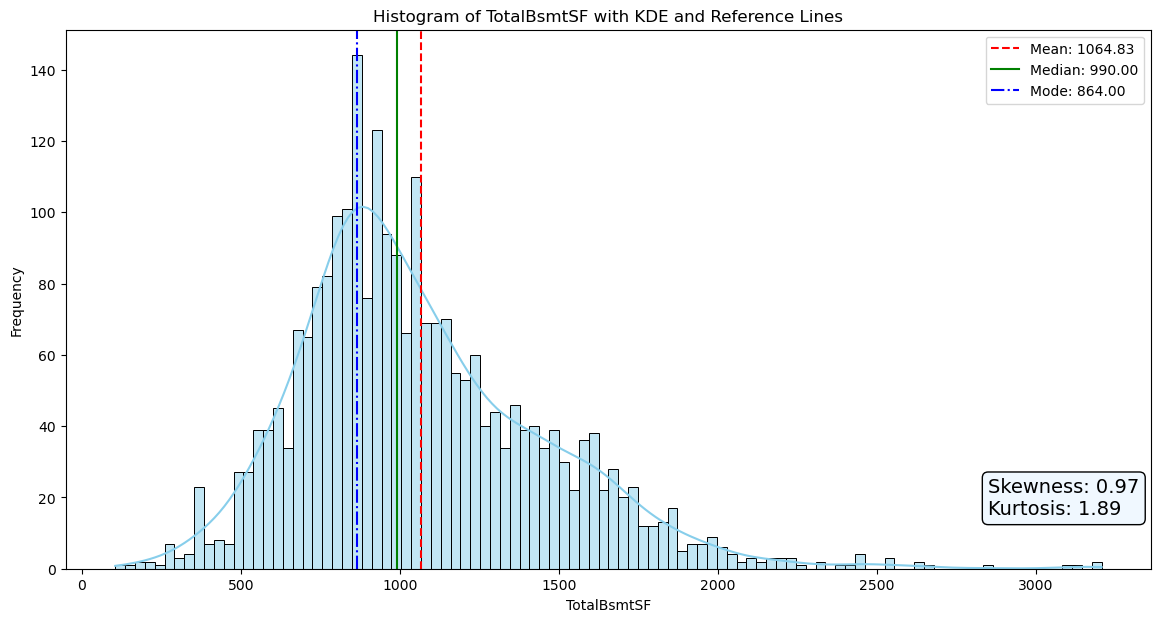

In [42]:
# 'TotalBsmtSF'- Continuous: Total sq ft of basement area
vcbd('TotalBsmtSF')
mmm('TotalBsmtSF')
housing['TotalBsmtSF'].plot.hist(bins=50, title = 'TotalBsmtSF')

nozeromask = copy.loc[copy['TotalBsmtSF'] != 0]
snshist(framename = nozeromask, colname = 'TotalBsmtSF', bins = 100)

Heating
GasA     2539
GasW       25
Grav        7
Wall        5
OthW        2
Floor       1
Name: count, dtype: int64
Heating
GasA     0.984490
GasW     0.009694
Grav     0.002714
Wall     0.001939
OthW     0.000775
Floor    0.000388
Name: count, dtype: float64


<Axes: title={'center': 'Heating'}, xlabel='Heating'>

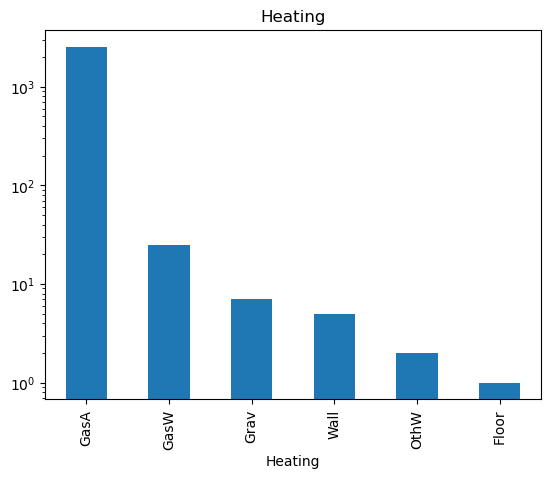

In [43]:
# Heating	(Nominal): Type of heating- gas air, gas water, gravity furnace, wall furnace, nongas water/steam, floor furnace
vcbd('Heating')

housing['Heating'].value_counts(dropna = False).plot.bar(title = 'Heating', logy = True)

HeatingQC
Ex    1293
TA     767
Gd     434
Fa      84
Po       1
Name: count, dtype: int64
HeatingQC
Ex    0.501357
TA    0.297402
Gd    0.168282
Fa    0.032571
Po    0.000388
Name: count, dtype: float64


<Axes: title={'center': 'HeatingQC'}, xlabel='HeatingQC'>

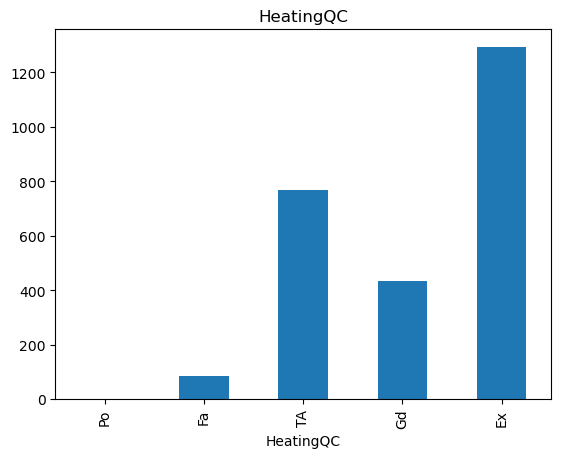

In [44]:
# 'HeatingQC' - ordinal - heating quality/condition
vcbd('HeatingQC')

copy['HeatingQC'] = copy['HeatingQC'].fillna(value = 'NA')

sortme9 = copy['HeatingQC'].value_counts(dropna = False)[['Po', 'Fa', 'TA', 'Gd', 'Ex']]

sortme9.plot.bar(title = 'HeatingQC')

CentralAir
Y    2416
N     163
Name: count, dtype: int64
CentralAir
Y    0.936797
N    0.063203
Name: count, dtype: float64


<Axes: title={'center': 'CentralAir'}, xlabel='CentralAir'>

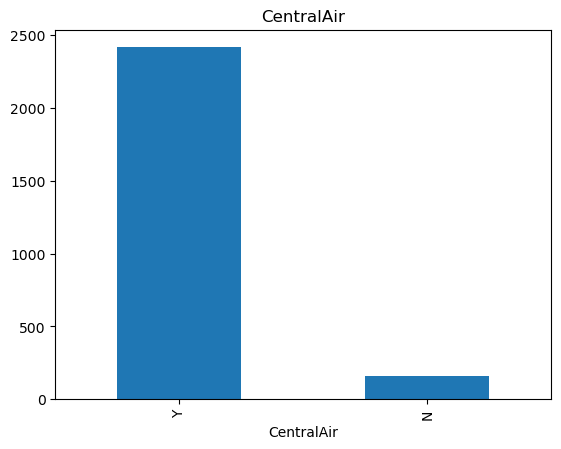

In [45]:
# 'CentralAir' (Nominal): Y/N
vcbd('CentralAir')

housing['CentralAir'].value_counts(dropna = False).plot.bar(title = 'CentralAir')

Electrical
SBrkr    2364
FuseA     168
FuseF      39
FuseP       7
NaN         1
Name: count, dtype: int64
Electrical
SBrkr    0.916634
FuseA    0.065142
FuseF    0.015122
FuseP    0.002714
NaN      0.000388
Name: count, dtype: float64


<Axes: title={'center': 'Electrical'}, xlabel='Electrical'>

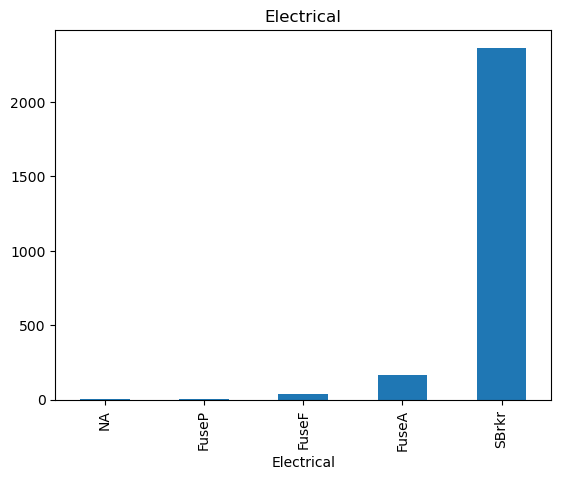

In [46]:
# 'Electrical' (Ordinal): Electrical System
# Mixed, FuseP, FuseF, FuseA (poor/fair/avg), SBrkr (standard and romex)
vcbd('Electrical')

copy['Electrical'] = copy['Electrical'].fillna(value = 'NA')

sortme10 = copy['Electrical'].value_counts(dropna = False)[['NA', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']]

sortme10.plot.bar(title = 'Electrical')

1stFlrSF
864     43
1040    28
912     19
848     18
816     17
        ..
2276     1
1670     1
671      1
1679     1
1733     1
Name: count, Length: 1026, dtype: int64
1stFlrSF
864     0.016673
1040    0.010857
912     0.007367
848     0.006979
816     0.006592
          ...   
2276    0.000388
1670    0.000388
671     0.000388
1679    0.000388
1733    0.000388
Name: count, Length: 1026, dtype: float64
mean: 1144.9829391236913, median: 1070.0, mode: 0    864
Name: 1stFlrSF, dtype: int64, std: 376.03165835791197
range: 3486, var: 141399.8080874014, IQR: 492.5
skewness: 1.0434485212963445, kurt: 2.133711715863329, 10th pctile: 744.8, 90th pct: 1660.2000000000003


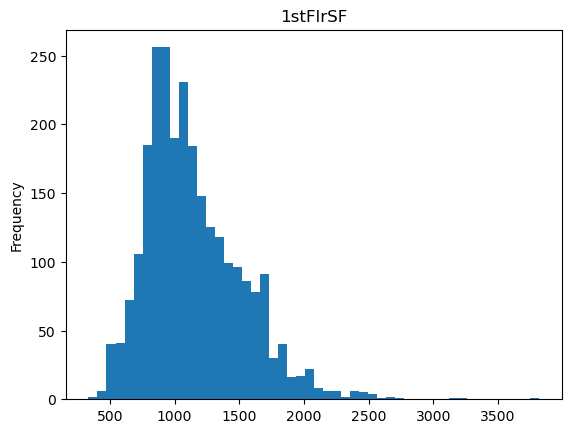

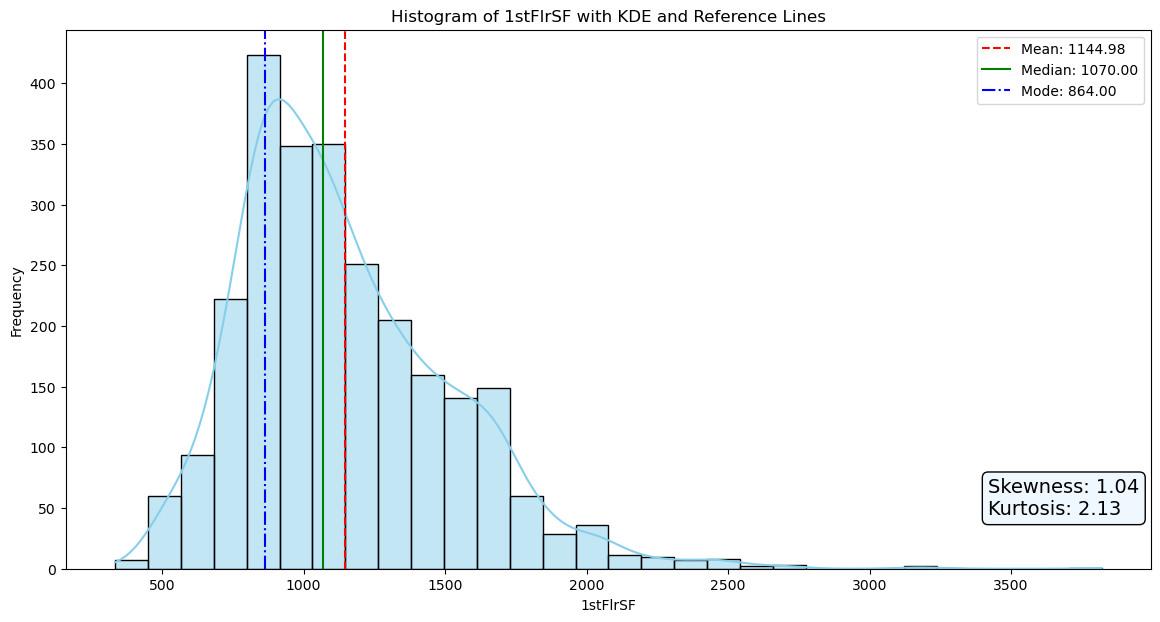

In [47]:
# '1stFlrSF'- Continuous: Total sq ft of 1st Floor
vcbd('1stFlrSF')
mmm('1stFlrSF')
housing['1stFlrSF'].plot.hist(bins=50, title = '1stFlrSF')
snshist('1stFlrSF')

2ndFlrSF
0       1464
546       20
504       17
672       13
600       12
        ... 
1872       1
798        1
1015       1
1309       1
1001       1
Name: count, Length: 592, dtype: int64
2ndFlrSF
0       0.567662
546     0.007755
504     0.006592
672     0.005041
600     0.004653
          ...   
1872    0.000388
798     0.000388
1015    0.000388
1309    0.000388
1001    0.000388
Name: count, Length: 592, dtype: float64
mean: 336.72120977122916, median: 0.0, mode: 0    0
Name: 2ndFlrSF, dtype: int64, std: 424.12490409157994
range: 1872, var: 179881.93427069188, IQR: 703.0
skewness: 0.82199401207161, kurt: -0.5412713976535488, 10th pctile: 0.0, 90th pct: 915.0


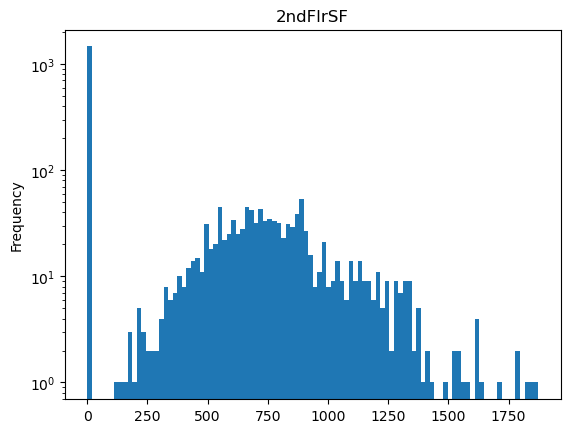

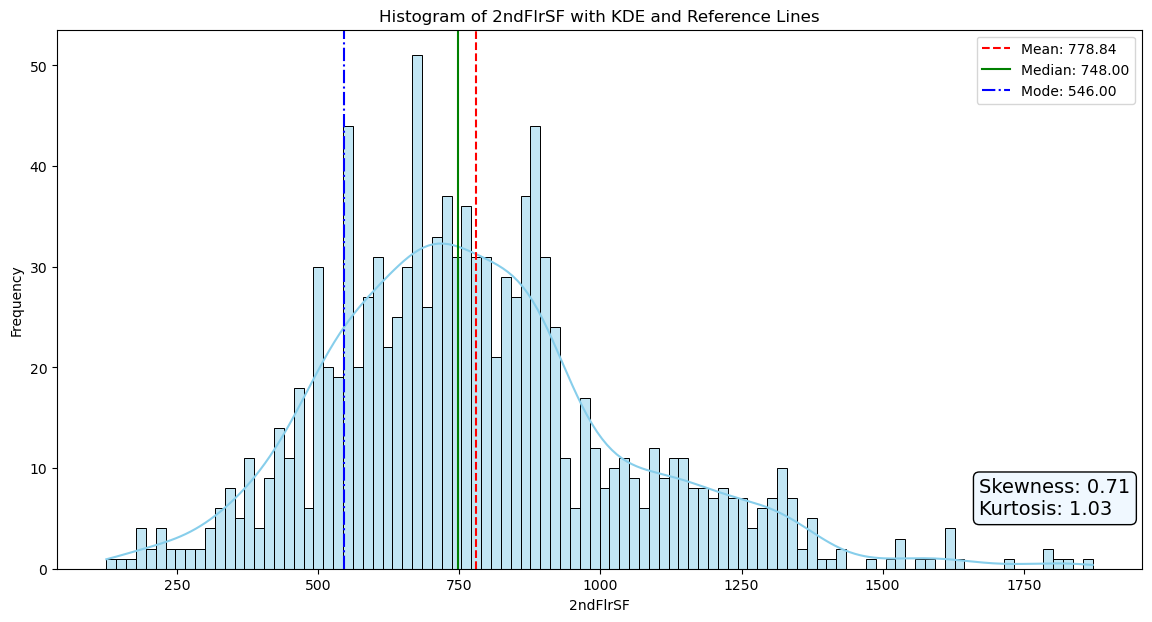

In [48]:
# '2ndFlrSF'- Continuous: Total sq ft of 2nd Floor
vcbd('2ndFlrSF')
mmm('2ndFlrSF')
housing['2ndFlrSF'].plot.hist(bins=100, title = '2ndFlrSF', logy = True)

nozeromask = copy.loc[copy['2ndFlrSF'] != 0]
snshist(framename = nozeromask, colname = '2ndFlrSF', bins = 100)

LowQualFinSF
0       2546
80         3
205        2
360        2
234        1
697        1
420        1
232        1
140        1
312        1
259        1
473        1
481        1
572        1
53         1
384        1
108        1
390        1
1064       1
120        1
397        1
512        1
436        1
362        1
144        1
528        1
514        1
114        1
156        1
479        1
Name: count, dtype: int64
LowQualFinSF
0       0.987204
80      0.001163
205     0.000775
360     0.000775
234     0.000388
697     0.000388
420     0.000388
232     0.000388
140     0.000388
312     0.000388
259     0.000388
473     0.000388
481     0.000388
572     0.000388
53      0.000388
384     0.000388
108     0.000388
390     0.000388
1064    0.000388
120     0.000388
397     0.000388
512     0.000388
436     0.000388
362     0.000388
144     0.000388
528     0.000388
514     0.000388
114     0.000388
156     0.000388
479     0.000388
Name: count, dtype: float64
mean: 4.246219464908

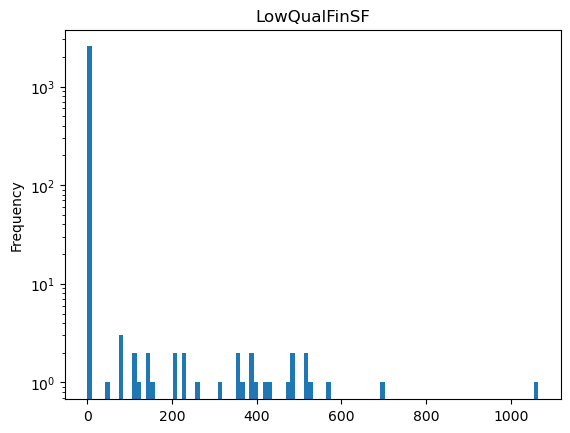

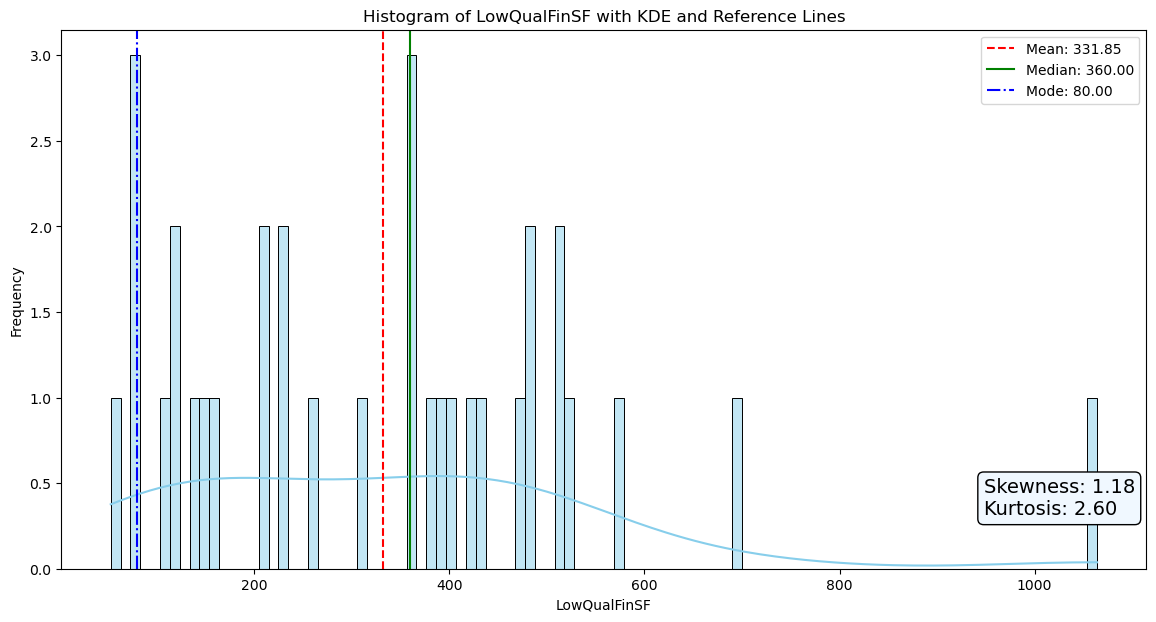

In [49]:
# 'LowQualFinSF'- Continuous: Low quality finished sq ft (all floors)
vcbd('LowQualFinSF')
mmm('LowQualFinSF')
housing['LowQualFinSF'].plot.hist(bins=100, title = 'LowQualFinSF', logy = True)

nozeromask = housing.loc[copy['LowQualFinSF'] != 0]
snshist(framename = nozeromask, colname = 'LowQualFinSF', bins = 100)

BsmtFullBath
0.0    1484
1.0    1065
2.0      27
NaN       2
3.0       1
Name: count, dtype: int64
BsmtFullBath
0.0    0.575417
1.0    0.412951
2.0    0.010469
NaN    0.000775
3.0    0.000388
Name: count, dtype: float64
mean: 0.43538998835855647, median: 0.0, mode: 0    0.0
Name: BsmtFullBath, dtype: float64, std: 0.5188573031511289
range: 3.0, var: 0.2692129010332624, IQR: 1.0
skewness: 0.5270273499691012, kurt: -1.0352043891638842, 10th pctile: 0.0, 90th pct: 1.0


<Axes: title={'center': 'BsmtFullBath'}, xlabel='BsmtFullBath'>

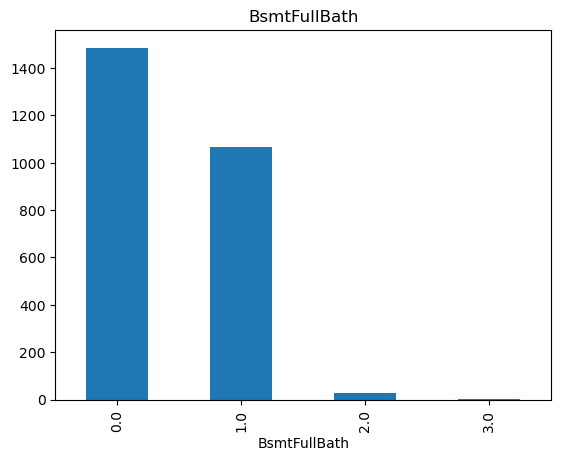

In [50]:
#'BsmtFullBath': Bsmnt Full Bathrooms
vcbd('BsmtFullBath')
mmm('BsmtFullBath')

copy['BsmtFullBath'] = copy['BsmtFullBath'].fillna(value = 0.0)
copy['BsmtFullBath'].value_counts().plot.bar(title = 'BsmtFullBath')

BsmtHalfBath
0.0    2419
1.0     156
2.0       2
NaN       2
Name: count, dtype: int64
BsmtHalfBath
0.0    0.937960
1.0    0.060489
2.0    0.000775
NaN    0.000775
Name: count, dtype: float64
mean: 0.06208769887466046, median: 0.0, mode: 0    0.0
Name: BsmtHalfBath, dtype: float64, std: 0.24455718648447256
range: 2.0, var: 0.05980821746120109, IQR: 0.0
skewness: 3.7899428684428305, kurt: 13.200398287632243, 10th pctile: 0.0, 90th pct: 0.0


<Axes: title={'center': 'BsmtHalfBath'}, xlabel='BsmtHalfBath'>

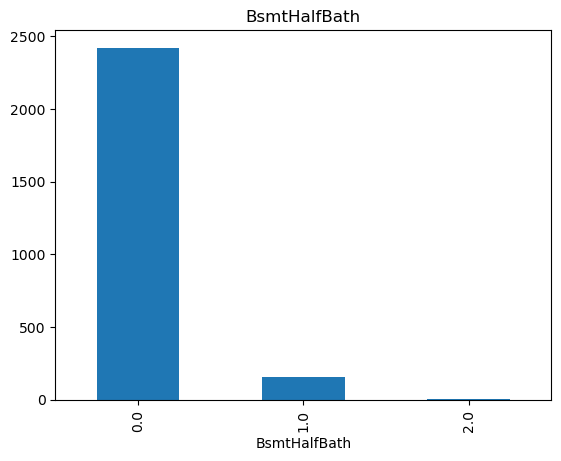

In [51]:
#'BsmtHalfBath': Discrete- Bsmnt Half Bathrooms
vcbd('BsmtHalfBath')
mmm('BsmtHalfBath')

copy['BsmtHalfBath'] = copy['BsmtHalfBath'].fillna(value = 0.0)
copy['BsmtHalfBath'].value_counts().plot.bar(title = 'BsmtHalfBath')

FullBath
2    1327
1    1195
3      45
0       8
4       4
Name: count, dtype: int64
FullBath
2    0.514541
1    0.463358
3    0.017449
0    0.003102
4    0.001551
Name: count, dtype: float64
mean: 1.5509887553315238, median: 2.0, mode: 0    2
Name: FullBath, dtype: int64, std: 0.5458230483464789
range: 4, var: 0.29792280010624267, IQR: 1.0
skewness: 0.20541867345596435, kurt: -0.582676270920981, 10th pctile: 1.0, 90th pct: 2.0


<Axes: title={'center': 'FullBath'}, xlabel='FullBath'>

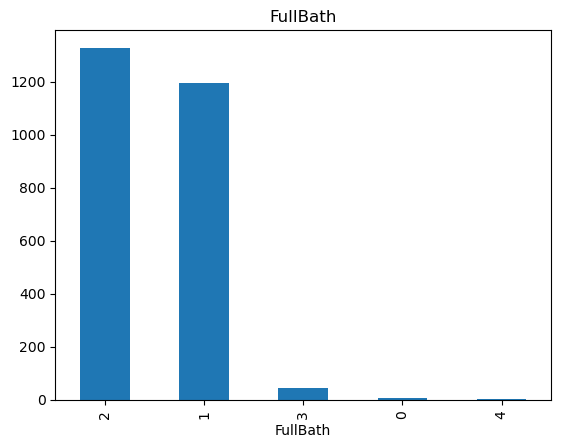

In [52]:
#'FullBath': Discrete- 'FullBaths above grade
vcbd('FullBath')
mmm('FullBath')

copy['FullBath'] = copy['FullBath'].fillna(value = 0.0)
copy['FullBath'].value_counts().plot.bar(title = 'FullBath')

HalfBath
0    1622
1     939
2      18
Name: count, dtype: int64
HalfBath
0    0.628926
1    0.364095
2    0.006979
Name: count, dtype: float64
mean: 0.3780535091120589, median: 0.0, mode: 0    0
Name: HalfBath, dtype: int64, std: 0.4991839067675393
range: 2, var: 0.2491845727757034, IQR: 1.0
skewness: 0.6711890153234402, kurt: -1.1362518471854022, 10th pctile: 0.0, 90th pct: 1.0


<Axes: title={'center': 'HalfBath'}, xlabel='HalfBath'>

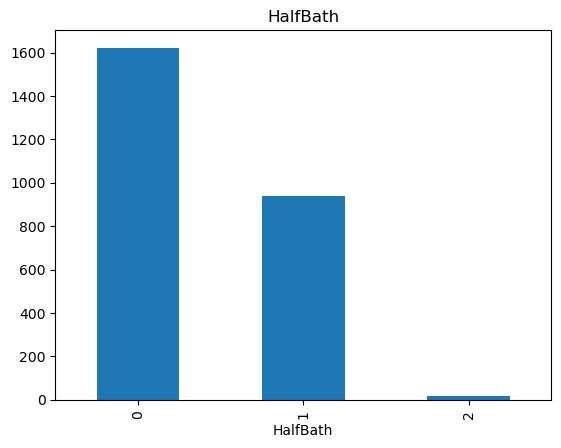

In [53]:
#'HalfBath': Discrete- Half Baths above grade
vcbd('HalfBath')
mmm('HalfBath')

copy['HalfBath'] = copy['HalfBath'].fillna(value = 0.0)
copy['HalfBath'].value_counts().plot.bar(title = 'HalfBath')

BedroomAbvGr
3    1409
2     655
4     349
1      99
5      40
6      20
0       7
Name: count, dtype: int64
BedroomAbvGr
3    0.546336
2    0.253974
4    0.135324
1    0.038387
5    0.015510
6    0.007755
0    0.002714
Name: count, dtype: float64
mean: 2.850717332299341, median: 3.0, mode: 0    3
Name: BedroomAbvGr, dtype: int64, std: 0.822851994317355
range: 6, var: 0.6770854045520485, IQR: 1.0
skewness: 0.25314333165873537, kurt: 1.573862043005255, 10th pctile: 2.0, 90th pct: 4.0


<Axes: title={'center': 'BedroomAbvGr'}, xlabel='BedroomAbvGr'>

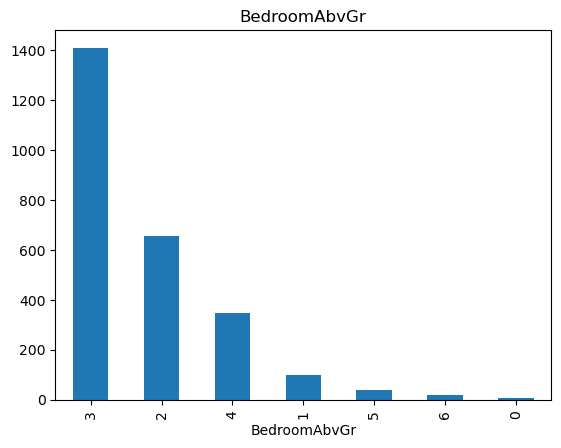

In [54]:
#'BedroomAbvGr': Discrete- Bedrooms above grade
vcbd('BedroomAbvGr')
mmm('BedroomAbvGr')

copy['BedroomAbvGr'] = copy['BedroomAbvGr'].fillna(value = 0.0)
copy['BedroomAbvGr'].value_counts().plot.bar(title = 'BedroomAbvGr')

KitchenAbvGr
1    2472
2     104
0       2
3       1
Name: count, dtype: int64
KitchenAbvGr
1    0.958511
2    0.040326
0    0.000775
3    0.000388
Name: count, dtype: float64
mean: 1.0403257076386196, median: 1.0, mode: 0    1
Name: KitchenAbvGr, dtype: int64, std: 0.20258810915916103
range: 3, var: 0.04104194197268415, IQR: 0.0
skewness: 4.530243887643755, kurt: 21.30396628629015, 10th pctile: 1.0, 90th pct: 1.0


<Axes: title={'center': 'KitchenAbvGr'}, xlabel='KitchenAbvGr'>

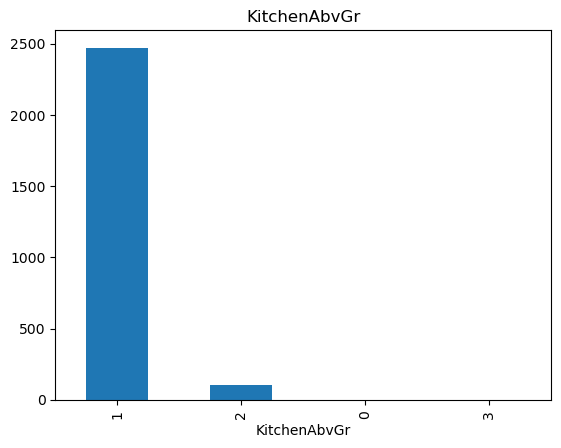

In [55]:
#'KitchenAbvGr': Discrete- Kitchens above grade
vcbd('KitchenAbvGr')
mmm('KitchenAbvGr')

copy['KitchenAbvGr'] = copy['KitchenAbvGr'].fillna(value = 0.0)
copy['KitchenAbvGr'].value_counts(dropna = False).plot.bar(title = 'KitchenAbvGr')

KitchenQual
TA    1357
Gd    1017
Ex     142
Fa      62
Po       1
Name: count, dtype: int64
KitchenQual
TA    0.526173
Gd    0.394339
Ex    0.055060
Fa    0.024040
Po    0.000388
Name: count, dtype: float64


<Axes: title={'center': 'OverallQual'}, xlabel='KitchenQual'>

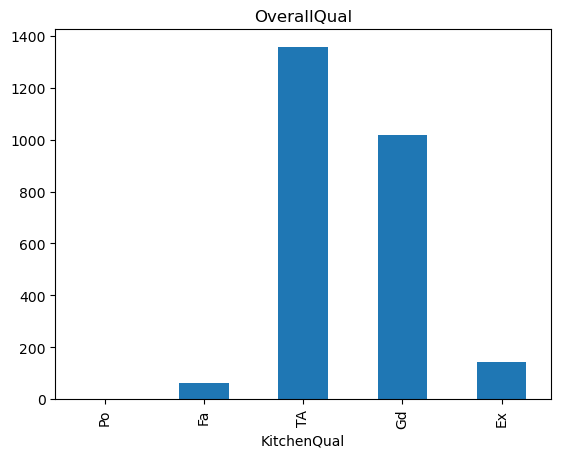

In [56]:
# 'KitchenQual': Ordinal Quality
vcbd('KitchenQual')

sortme11 = housing['KitchenQual'].value_counts(dropna = False)[['Po', 'Fa', 'TA', 'Gd', 'Ex']]
sortme11.plot.bar(title = 'OverallQual')

TotRmsAbvGrd
6     740
7     578
5     534
8     290
4     186
9     125
10     65
3      25
11     21
12     13
13      1
2       1
Name: count, dtype: int64
TotRmsAbvGrd
6     0.286933
7     0.224118
5     0.207057
8     0.112447
4     0.072121
9     0.048468
10    0.025204
3     0.009694
11    0.008143
12    0.005041
13    0.000388
2     0.000388
Name: count, dtype: float64
mean: 6.386971694455215, median: 6.0, mode: 0    6
Name: TotRmsAbvGrd, dtype: int64, std: 1.5354363794892785
range: 11, var: 2.357564875459144, IQR: 2.0
skewness: 0.6694741095162329, kurt: 0.8415130383672049, 10th pctile: 5.0, 90th pct: 8.0


<Axes: title={'center': 'TotRmsAbvGrd'}, xlabel='TotRmsAbvGrd'>

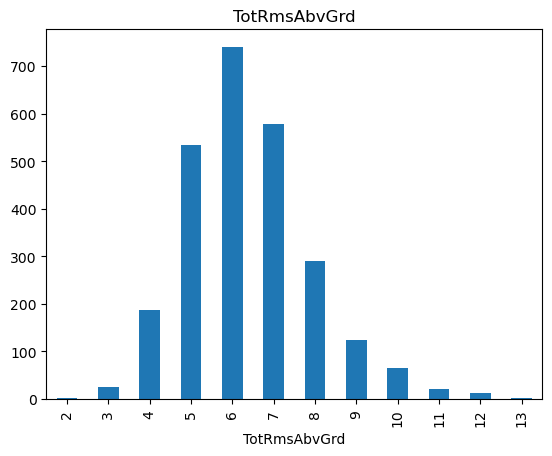

In [57]:
#'TotRmsAbvGrd': Discrete- Rooms above grade (not including bathrooms)
vcbd('TotRmsAbvGrd')
mmm('TotRmsAbvGrd')

copy['TotRmsAbvGrd'] = copy['TotRmsAbvGrd'].fillna(value = 0.0)
copy['TotRmsAbvGrd'].value_counts().sort_index().plot.bar(title = 'TotRmsAbvGrd')

Functional
Typ     2398
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: count, dtype: int64
Functional
Typ     0.929818
Min2    0.025591
Min1    0.022102
Mod     0.012408
Maj1    0.006979
Maj2    0.002714
Sal     0.000388
Name: count, dtype: float64


<Axes: title={'center': 'Functional'}, xlabel='Functional'>

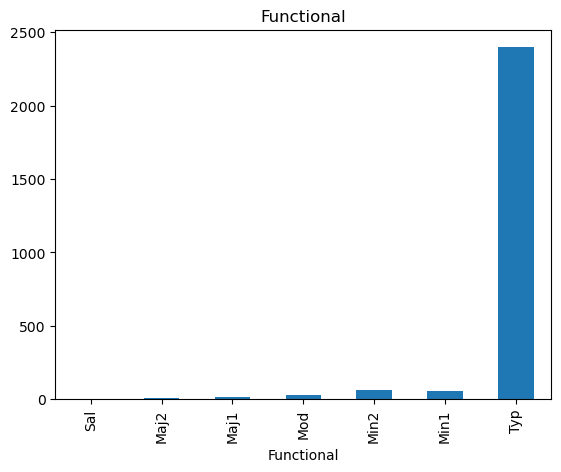

In [58]:
# 'Functional': Home functionality #'Salvage, severely damaged (not listed), deductions, typical
vcbd('Functional')

sortme12 = housing['Functional'].value_counts(dropna = False)[['Sal', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']]
sortme12.plot.bar(title = 'Functional')

Fireplaces
0    1241
1    1131
2     195
3      11
4       1
Name: count, dtype: int64
Fireplaces
0    0.481194
1    0.438542
2    0.075611
3    0.004265
4    0.000388
Name: count, dtype: float64
mean: 0.6041101202016286, median: 1.0, mode: 0    0
Name: Fireplaces, dtype: int64, std: 0.6486832257402768
range: 4, var: 0.420789927356811, IQR: 1.0
skewness: 0.7358382160762698, kurt: 0.13405065266304605, 10th pctile: 0.0, 90th pct: 1.0


<Axes: title={'center': 'Fireplaces'}, xlabel='Fireplaces'>

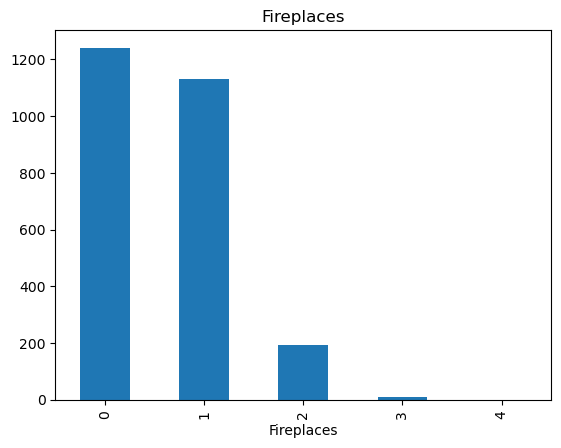

In [59]:
#'Fireplaces': Discrete- #
vcbd('Fireplaces')
mmm('Fireplaces')

copy['Fireplaces'] = copy['Fireplaces'].fillna(value = 0.0)
copy['Fireplaces'].value_counts().sort_index().plot.bar(title = 'Fireplaces')

FireplaceQu
NaN    1241
Gd      618
TA      572
Fa       70
Po       43
Ex       35
Name: count, dtype: int64
FireplaceQu
NaN    0.481194
Gd     0.239628
TA     0.221791
Fa     0.027142
Po     0.016673
Ex     0.013571
Name: count, dtype: float64


<Axes: title={'center': 'FireplaceQu'}, xlabel='FireplaceQu'>

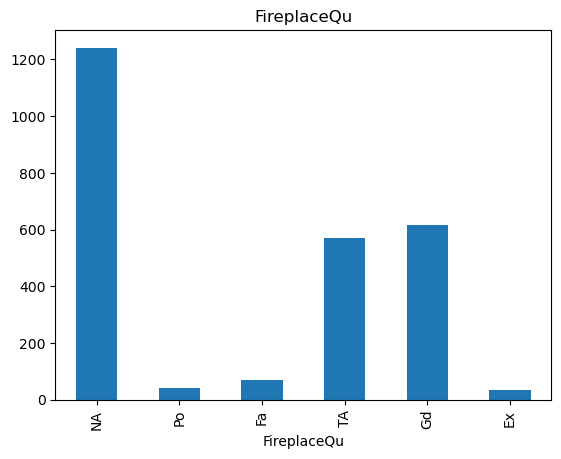

In [60]:
# 'FireplaceQu': Ordinal Quality
vcbd('FireplaceQu')
copy['FireplaceQu'] = copy['FireplaceQu'].fillna(value = 'NA')
sortme13 = copy['FireplaceQu'].value_counts()[['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']]
sortme13.plot.bar(title = 'FireplaceQu')

GarageType
Attchd     1526
Detchd      716
BuiltIn     153
NaN         127
Basment      27
2Types       21
CarPort       9
Name: count, dtype: int64
GarageType
Attchd     0.591702
Detchd     0.277627
BuiltIn    0.059325
NaN        0.049244
Basment    0.010469
2Types     0.008143
CarPort    0.003490
Name: count, dtype: float64


<Axes: title={'center': 'GarageType'}, xlabel='GarageType'>

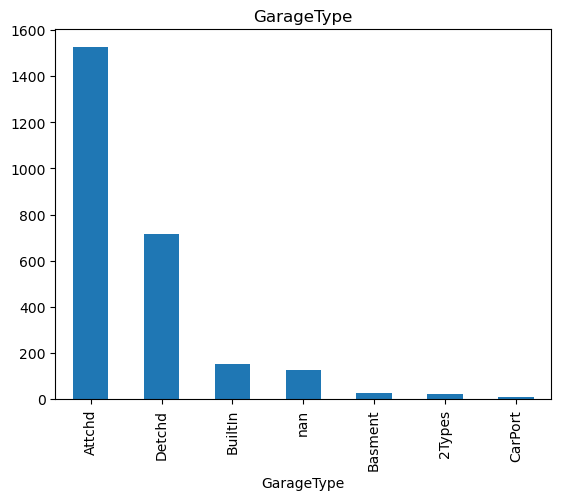

In [61]:
#'GarageType': Nominal- Type of Garage: NA, Detached, CarPort, Builtin, Basment, Attached, 2types
vcbd('GarageType')

housing['GarageType'].value_counts(dropna = False).plot.bar(title = 'GarageType')

GarageYrBlt
NaN       129
2005.0    111
2004.0     95
2003.0     90
2006.0     67
         ... 
1943.0      1
1933.0      1
2010.0      1
1908.0      1
1895.0      1
Name: count, Length: 101, dtype: int64
GarageYrBlt
NaN       0.050019
2005.0    0.043040
2004.0    0.036836
2003.0    0.034897
2006.0    0.025979
            ...   
1943.0    0.000388
1933.0    0.000388
2010.0    0.000388
1908.0    0.000388
1895.0    0.000388
Name: count, Length: 101, dtype: float64
mean: 1976.9971428571428, median: 1978.0, mode: 0    2005.0
Name: GarageYrBlt, dtype: float64, std: 24.653507225913703
range: 115.0, var: 607.7954185381791, IQR: 40.0
skewness: -0.628685708169524, kurt: -0.3741941469033385, 10th pctile: 1941.0, 90th pct: 2005.0


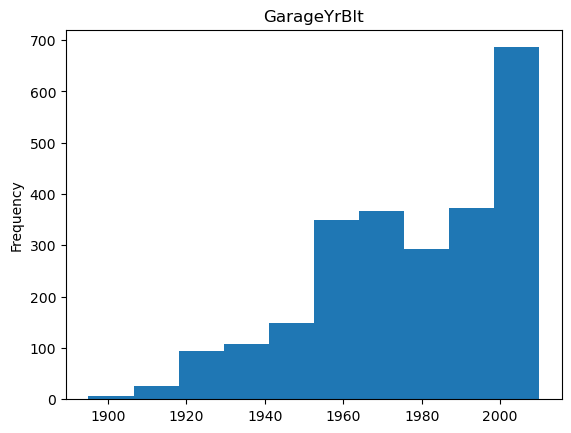

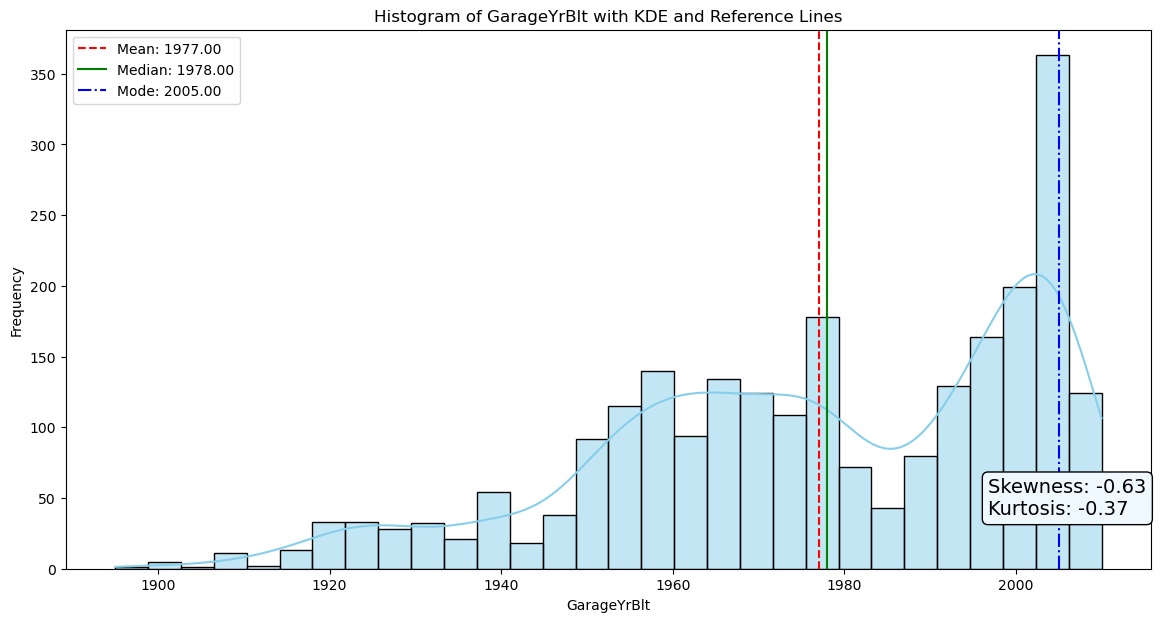

In [62]:
#'GarageYrBlt': Discrete- orig garage constr date
vcbd('GarageYrBlt')
mmm('GarageYrBlt')
housing['GarageYrBlt'].plot.hist(bins=10, title = 'GarageYrBlt')
#compare to year built- different by much?

snshist('GarageYrBlt')

GarageFinish
Unf    1111
RFn     718
Fin     621
NaN     129
Name: count, dtype: int64
GarageFinish
Unf    0.430787
RFn    0.278402
Fin    0.240791
NaN    0.050019
Name: count, dtype: float64


<Axes: title={'center': 'GarageFinish'}, xlabel='GarageFinish'>

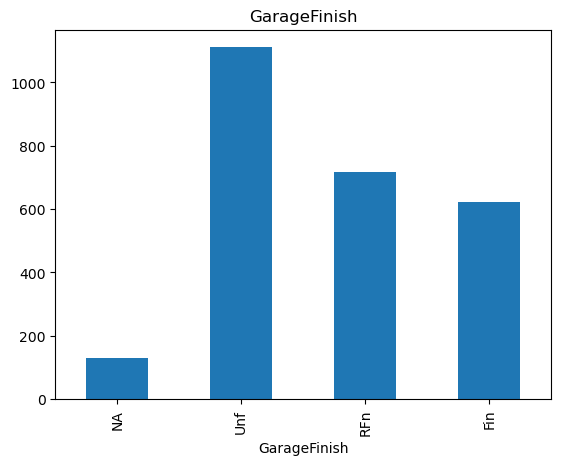

In [63]:
# 'GarageFinish': Ordinal Finish Quality= Unfinished, Rough Finished, Finished
vcbd('GarageFinish')
copy['GarageFinish'] = copy['GarageFinish'].fillna(value = 'NA')
sortme14 = copy['GarageFinish'].value_counts()[['NA', 'Unf', 'RFn', 'Fin']]
sortme14.plot.bar(title = 'GarageFinish')

GarageCars
2.0    1439
1.0     712
3.0     285
0.0     127
4.0      14
NaN       1
5.0       1
Name: count, dtype: int64
GarageCars
2.0    0.557968
1.0    0.276076
3.0    0.110508
0.0    0.049244
4.0    0.005428
NaN    0.000388
5.0    0.000388
Name: count, dtype: float64
mean: 1.747866563227308, median: 2.0, mode: 0    2.0
Name: GarageCars, dtype: float64, std: 0.7386742222097262
range: 5.0, var: 0.5456396065571439, IQR: 1.0
skewness: -0.19183256525015913, kurt: 0.37552145051000174, 10th pctile: 1.0, 90th pct: 3.0


<Axes: title={'center': 'GarageCars'}, xlabel='GarageCars'>

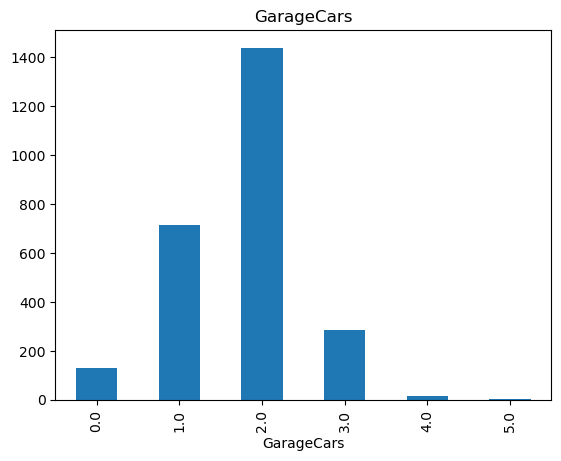

In [64]:
#'GarageCars': Discrete- #
copy['GarageCars'] = copy['GarageCars'].fillna(value = 0.0)
vcbd('GarageCars')
mmm('GarageCars')

copy['GarageCars'].value_counts().sort_index().plot.bar(title = 'GarageCars')

GarageArea
0.0      127
576.0     92
440.0     85
484.0     69
240.0     62
        ... 
862.0      1
894.0      1
307.0      1
694.0      1
192.0      1
Name: count, Length: 574, dtype: int64
GarageArea
0.0      0.049244
576.0    0.035673
440.0    0.032959
484.0    0.026755
240.0    0.024040
           ...   
862.0    0.000388
894.0    0.000388
307.0    0.000388
694.0    0.000388
192.0    0.000388
Name: count, Length: 574, dtype: float64
mean: 466.86462373933284, median: 474.0, mode: 0    0.0
Name: GarageArea, dtype: float64, std: 207.51407164715712
range: 1488.0, var: 43062.08993158146, IQR: 258.0
skewness: 0.2466591424075386, kurt: 1.0676927829413136, 10th pctile: 240.0, 90th pct: 730.0


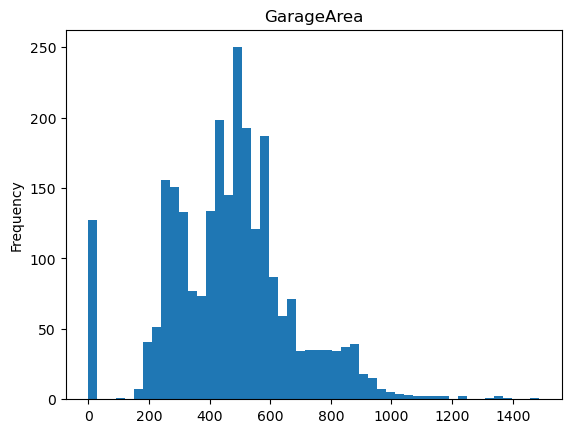

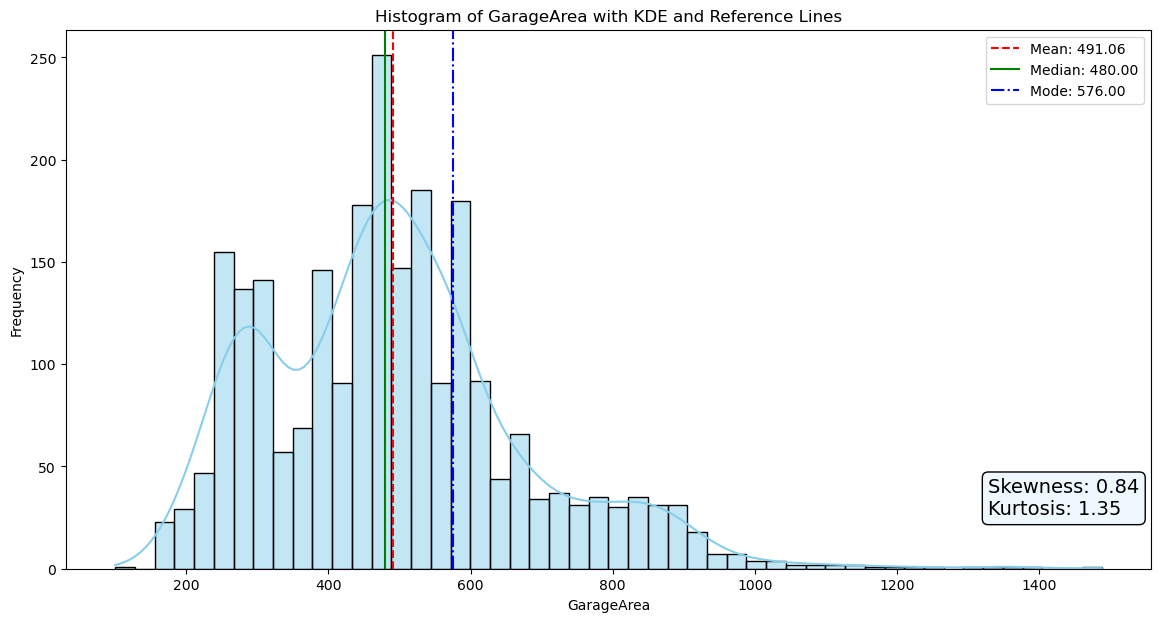

In [65]:
#'GarageArea': Continuous- Size of Garage size in ft^2
vcbd('GarageArea')
mmm('GarageArea')
housing['GarageArea'].plot.hist(bins=50, title = 'GarageArea')

nozeromask = housing.loc[copy['GarageArea'] != 0]
snshist(framename = nozeromask, colname = 'GarageArea', bins = 50)

GarageQual
TA     2311
NaN     129
Fa      110
Gd       22
Po        4
Ex        3
Name: count, dtype: int64
GarageQual
TA     0.896084
NaN    0.050019
Fa     0.042652
Gd     0.008530
Po     0.001551
Ex     0.001163
Name: count, dtype: float64


<Axes: title={'center': 'GarageQual'}, xlabel='GarageQual'>

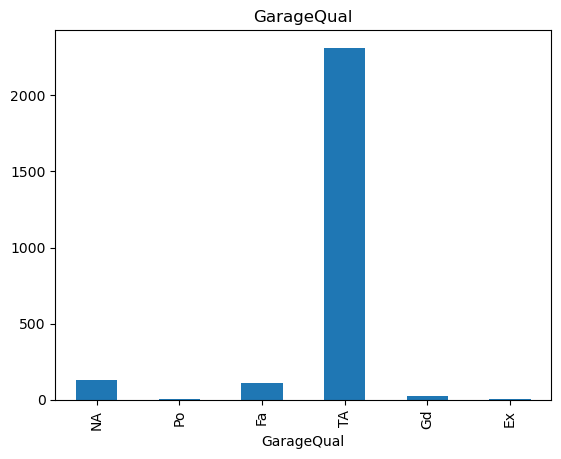

In [66]:
# 'GarageQual': Ordinal Garage Quality
vcbd('GarageQual')
copy['GarageQual'] = copy['GarageQual'].fillna(value = 'NA')
sortme15 = copy['GarageQual'].value_counts()[['NA','Po', 'Fa', 'TA', 'Gd', 'Ex']]
sortme15.plot.bar(title = 'GarageQual')

GarageCond
TA     2355
NaN     129
Fa       67
Gd       14
Po       11
Ex        3
Name: count, dtype: int64
GarageCond
TA     0.913145
NaN    0.050019
Fa     0.025979
Gd     0.005428
Po     0.004265
Ex     0.001163
Name: count, dtype: float64


<Axes: title={'center': 'GarageCond'}, xlabel='GarageCond'>

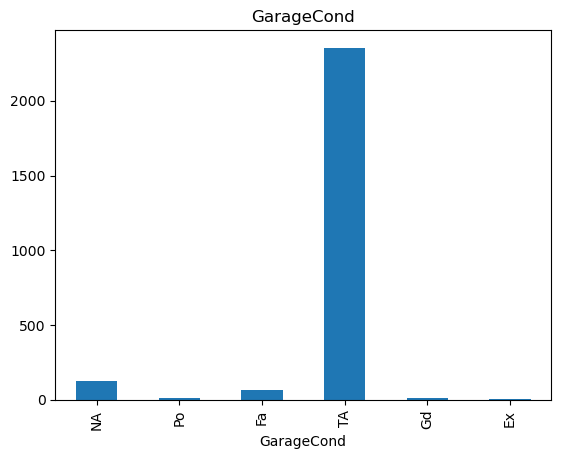

In [67]:
# 'GarageCond': Ordinal Garage Condition
vcbd('GarageCond')
copy['GarageCond'] = copy['GarageCond'].fillna(value = 'NA')
sortme16 = copy['GarageCond'].value_counts()[['NA','Po', 'Fa', 'TA', 'Gd', 'Ex']]
sortme16.plot.bar(title = 'GarageCond')

PavedDrive
Y    2335
N     184
P      60
Name: count, dtype: int64
PavedDrive
Y    0.905390
N    0.071345
P    0.023265
Name: count, dtype: float64


<Axes: title={'center': 'PavedDrive'}, xlabel='PavedDrive'>

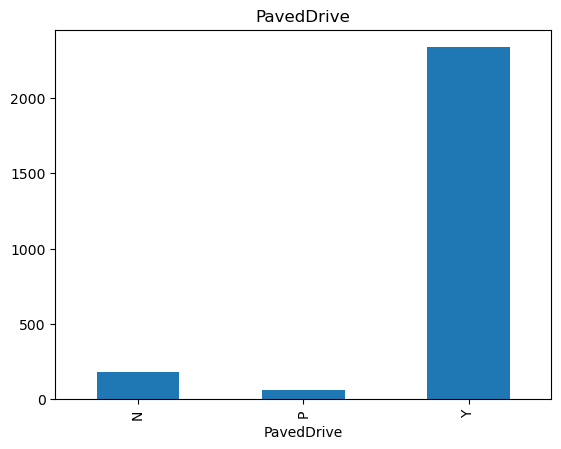

In [68]:
# 'PavedDrive': Ordinal- pavement on driveway- n=dirt/gravel, p=partial, y= paved
vcbd('PavedDrive')
copy['PavedDrive'] = copy['PavedDrive'].fillna(value = 'NA')
sortme17 = copy['PavedDrive'].value_counts()[['N','P', 'Y']]
sortme17.plot.bar(title = 'PavedDrive')

WoodDeckSF
0      1334
192      63
100      57
144      50
168      47
       ... 
279       1
728       1
255       1
157       1
20        1
Name: count, Length: 372, dtype: int64
WoodDeckSF
0      0.517255
192    0.024428
100    0.022102
144    0.019387
168    0.018224
         ...   
279    0.000388
728    0.000388
255    0.000388
157    0.000388
20     0.000388
Name: count, Length: 372, dtype: float64
mean: 95.95696006203956, median: 0.0, mode: 0    0
Name: WoodDeckSF, dtype: int64, std: 129.06321215510906
range: 1424, var: 16657.312731794693, IQR: 168.0
skewness: 1.8465526066089581, kurt: 6.787807616629513, 10th pctile: 0.0, 90th pct: 264.0


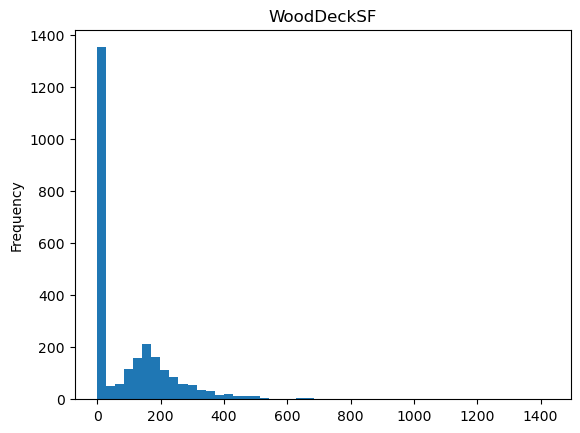

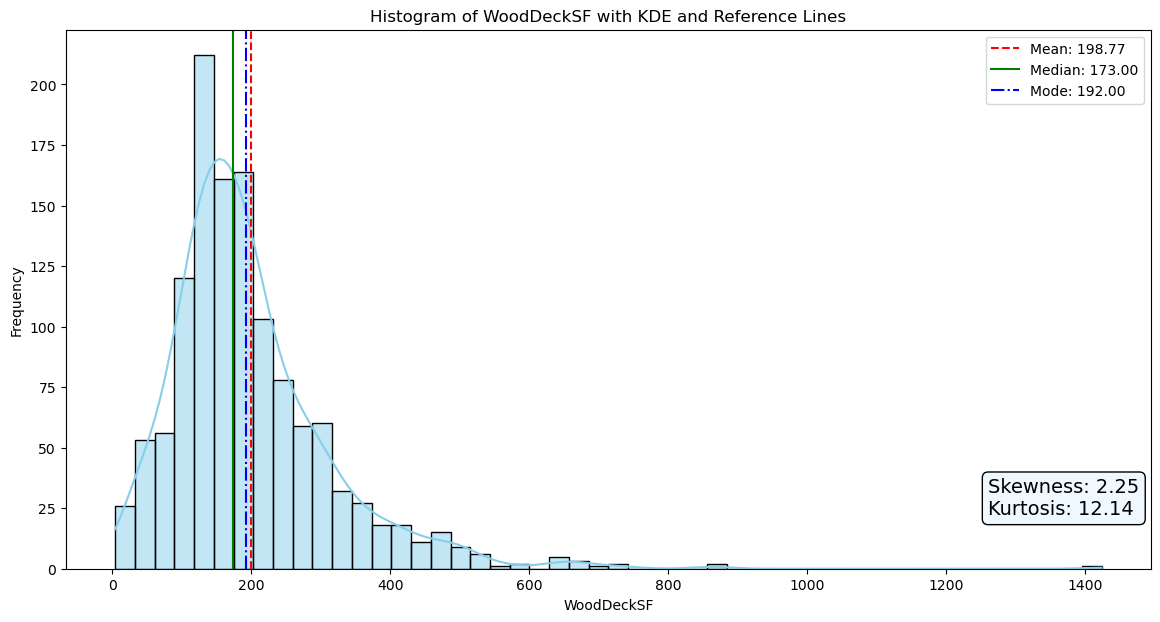

In [69]:
#'WoodDeckSF': Continuous- Size of Deck in ft^2
vcbd('WoodDeckSF')
mmm('WoodDeckSF')
housing['WoodDeckSF'].plot.hist(bins=50, title = 'WoodDeckSF')


nozeromask = housing.loc[copy['WoodDeckSF'] != 0]
snshist(framename = nozeromask, colname = 'WoodDeckSF', bins = 50)

OpenPorchSF
0      1169
48       50
36       43
40       41
28       34
       ... 
183       1
267       1
178       1
282       1
194       1
Name: count, Length: 239, dtype: int64
OpenPorchSF
0      0.453276
48     0.019387
36     0.016673
40     0.015898
28     0.013183
         ...   
183    0.000388
267    0.000388
178    0.000388
282    0.000388
194    0.000388
Name: count, Length: 239, dtype: float64
mean: 46.10314075222955, median: 26.0, mode: 0    0
Name: OpenPorchSF, dtype: int64, std: 66.06723825571146
range: 742, var: 4364.8799707369435, IQR: 68.0
skewness: 2.6048513677156033, kurt: 11.998753295915485, 10th pctile: 0.0, 90th pct: 128.0


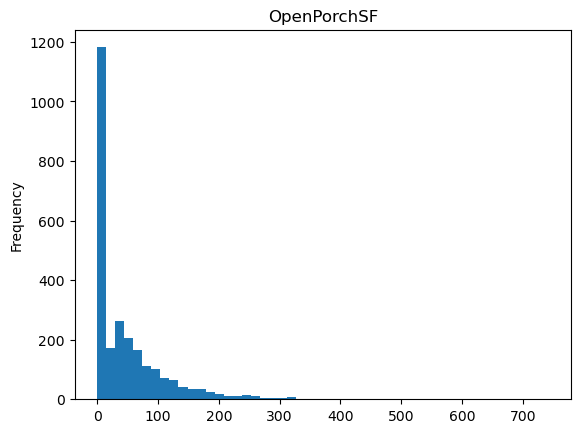

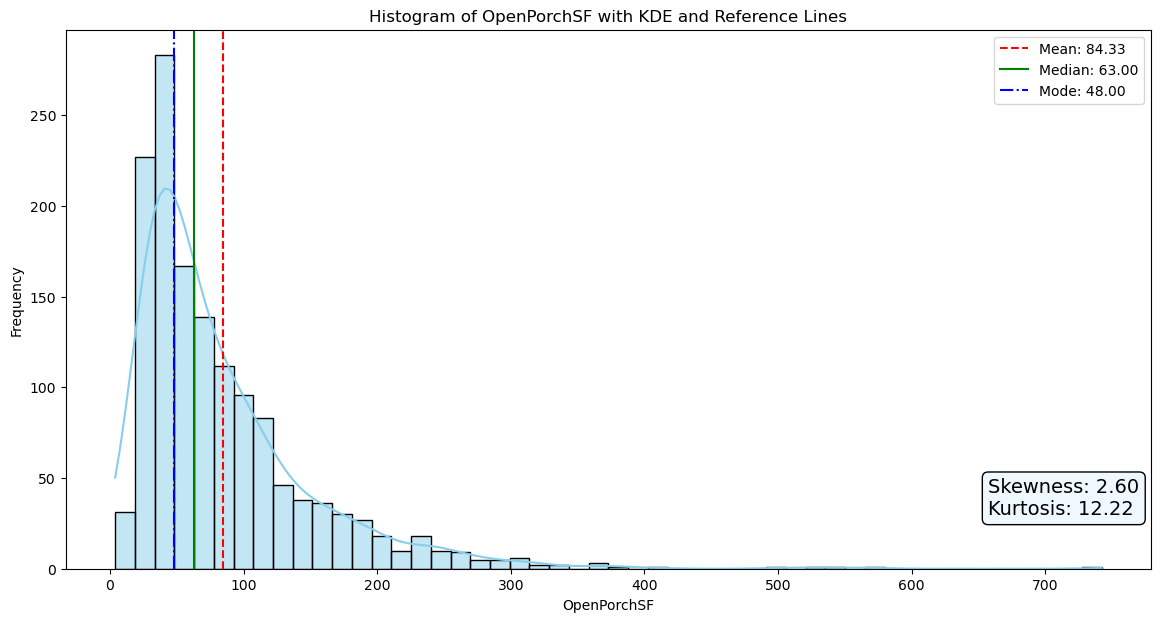

In [70]:
#'OpenPorchSF': Continuous- Size of Open Porch in ft^2
vcbd('OpenPorchSF')
mmm('OpenPorchSF')
housing['OpenPorchSF'].plot.hist(bins=50, title = 'OpenPorchSF')

nozeromask = housing.loc[copy['OpenPorchSF'] != 0]
snshist(framename = nozeromask, colname = 'OpenPorchSF', bins = 50)

EnclosedPorch
0      2169
112      18
144      11
96       10
192       9
       ... 
162       1
91        1
318       1
161       1
259       1
Name: count, Length: 170, dtype: int64
EnclosedPorch
0      0.841024
112    0.006979
144    0.004265
96     0.003877
192    0.003490
         ...   
162    0.000388
91     0.000388
318    0.000388
161    0.000388
259    0.000388
Name: count, Length: 170, dtype: float64
mean: 23.22334238076774, median: 0.0, mode: 0    0
Name: EnclosedPorch, dtype: int64, std: 64.11862719438759
range: 1012, var: 4111.19835329286, IQR: 0.0
skewness: 4.040922815158402, kurt: 29.913551627573145, 10th pctile: 0.0, 90th pct: 112.0


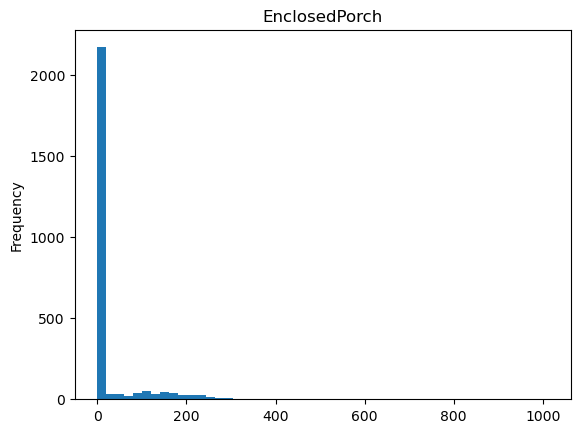

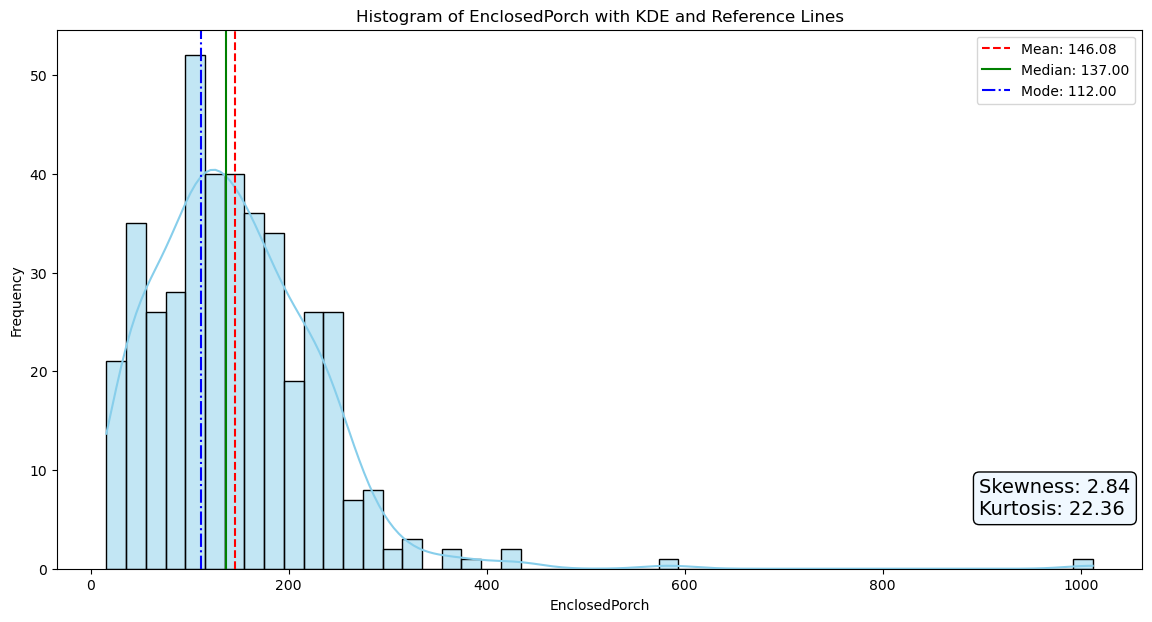

In [71]:
#'EnclosedPorch': Continuous- Size of Enclosed Porch in ft^2
vcbd('EnclosedPorch')
mmm('EnclosedPorch')
housing['EnclosedPorch'].plot.hist(bins=50, title = 'EnclosedPorch')

nozeromask = housing.loc[copy['EnclosedPorch'] != 0]
snshist(framename = nozeromask, colname = 'EnclosedPorch', bins = 50)

3SsnPorch
0      2549
168       2
144       2
180       1
225       1
255       1
290       1
120       1
182       1
320       1
150       1
96        1
216       1
245       1
407       1
174       1
86        1
304       1
130       1
196       1
360       1
238       1
176       1
140       1
508       1
323       1
162       1
153       1
219       1
Name: count, dtype: int64
3SsnPorch
0      0.988368
168    0.000775
144    0.000775
180    0.000388
225    0.000388
255    0.000388
290    0.000388
120    0.000388
182    0.000388
320    0.000388
150    0.000388
96     0.000388
216    0.000388
245    0.000388
407    0.000388
174    0.000388
86     0.000388
304    0.000388
130    0.000388
196    0.000388
360    0.000388
238    0.000388
176    0.000388
140    0.000388
508    0.000388
323    0.000388
162    0.000388
153    0.000388
219    0.000388
Name: count, dtype: float64
mean: 2.5122140364482357, median: 0.0, mode: 0    0
Name: 3SsnPorch, dtype: int64, std: 25.29879139612469
range: 5

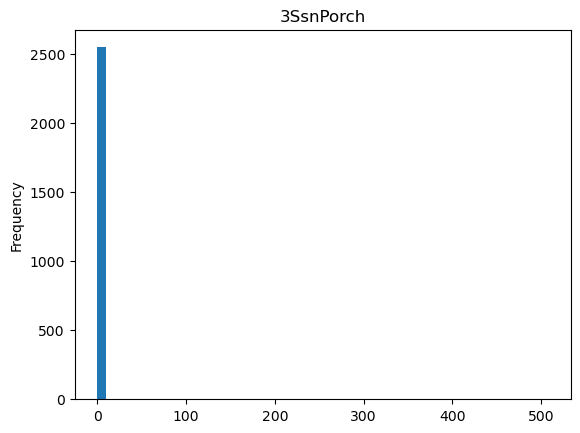

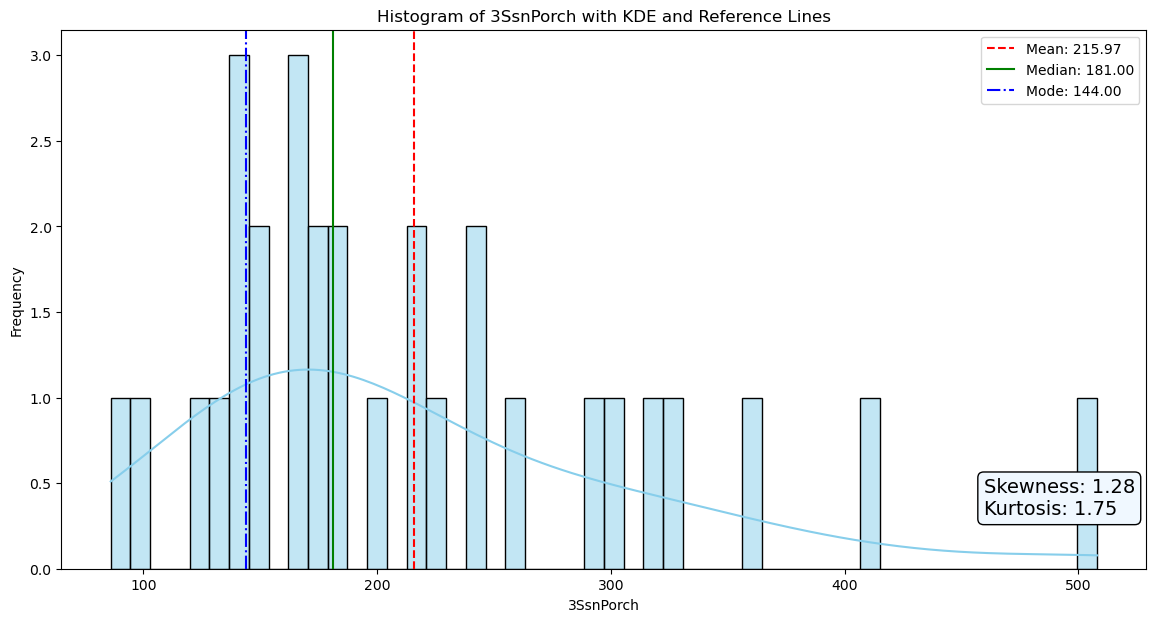

In [72]:
#'3SsnPorch': Continuous- Size of 3-Season Porch in ft^2
vcbd('3SsnPorch')
mmm('3SsnPorch')
housing['3SsnPorch'].plot.hist(bins=50, title = '3SsnPorch')

nozeromask = housing.loc[copy['3SsnPorch'] != 0]
snshist(framename = nozeromask, colname = '3SsnPorch', bins = 50)

ScreenPorch
0      2354
144      13
192      10
216       8
168       8
       ... 
490       1
143       1
280       1
221       1
40        1
Name: count, Length: 113, dtype: int64
ScreenPorch
0      0.912757
144    0.005041
192    0.003877
216    0.003102
168    0.003102
         ...   
490    0.000388
143    0.000388
280    0.000388
221    0.000388
40     0.000388
Name: count, Length: 113, dtype: float64
mean: 16.16285381930981, median: 0.0, mode: 0    0
Name: ScreenPorch, dtype: int64, std: 56.803806736979624
range: 576, var: 3226.6724598121314, IQR: 0.0
skewness: 3.9966641374014964, kurt: 18.312156509417566, 10th pctile: 0.0, 90th pct: 0.0


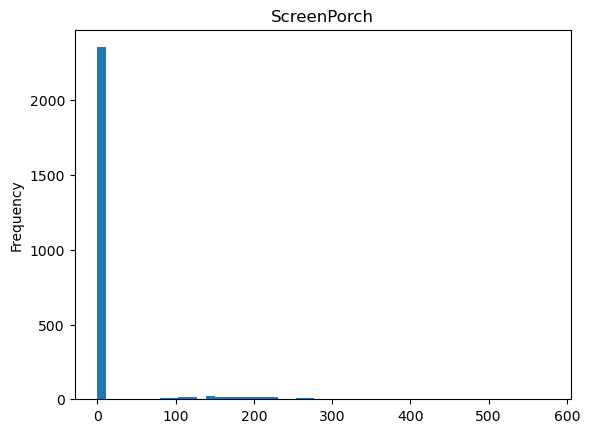

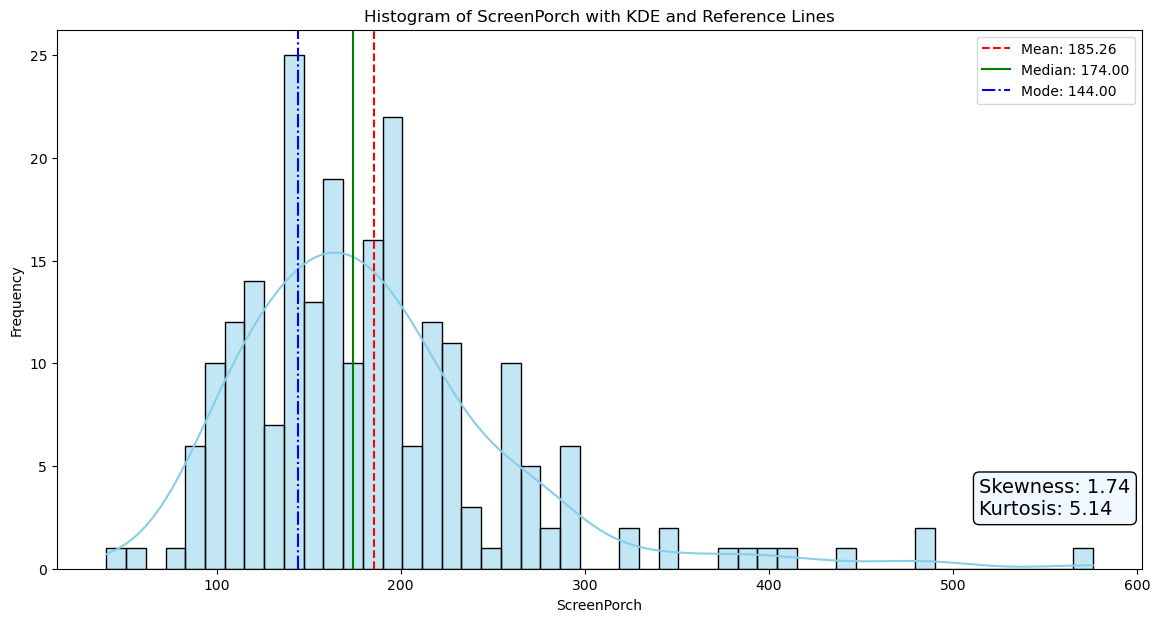

In [73]:
#'ScreenPorch': Continuous- Size of Screen Porch in ft^2
vcbd('ScreenPorch')
mmm('ScreenPorch')
housing['ScreenPorch'].plot.hist(bins=50, title = 'ScreenPorch')

nozeromask = housing.loc[copy['ScreenPorch'] != 0]
snshist(framename = nozeromask, colname = 'ScreenPorch', bins = 50)

PoolArea
0      2570
144       1
800       1
519       1
444       1
648       1
228       1
561       1
576       1
368       1
Name: count, dtype: int64
PoolArea
0      0.996510
144    0.000388
800    0.000388
519    0.000388
444    0.000388
648    0.000388
228    0.000388
561    0.000388
576    0.000388
368    0.000388
Name: count, dtype: float64
mean: 1.6626599457153937, median: 0.0, mode: 0    0
Name: PoolArea, dtype: int64, std: 30.34526248136765
range: 800, var: 920.8349550630992, IQR: 0.0
skewness: 19.892816318913212, kurt: 418.0939697771146, 10th pctile: 0.0, 90th pct: 0.0


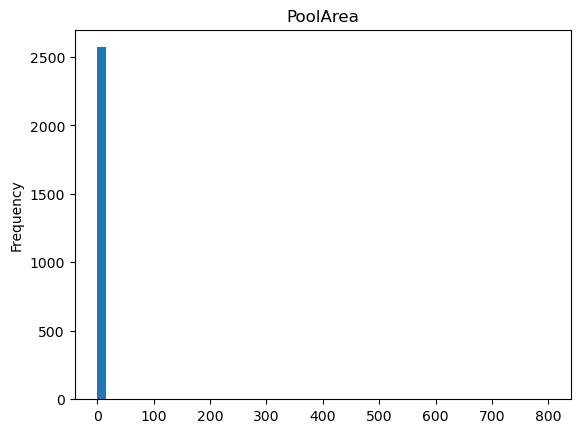

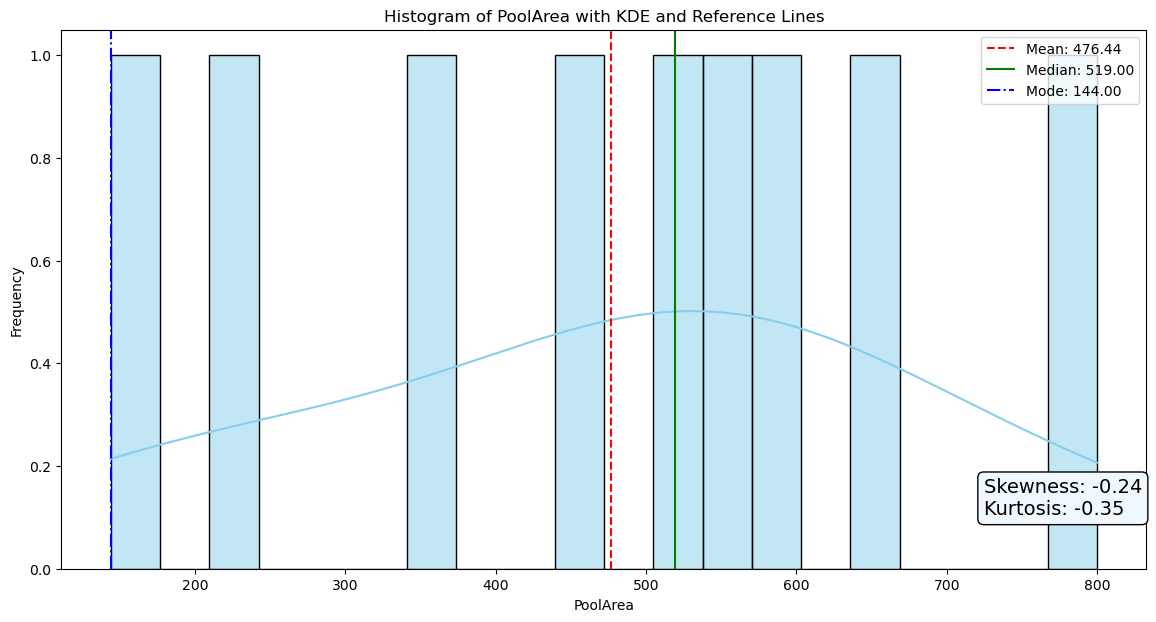

In [74]:
#'PoolArea': Continuous- Size of Pool in ft^2
vcbd('PoolArea')
mmm('PoolArea')
housing['PoolArea'].plot.hist(bins=50, title = 'PoolArea')

nozeromask = housing.loc[copy['PoolArea'] != 0]
snshist(framename = nozeromask, colname = 'PoolArea', bins = 20)

PoolQC
NaN    2570
TA        3
Ex        2
Gd        2
Fa        2
Name: count, dtype: int64
PoolQC
NaN    0.996510
TA     0.001163
Ex     0.000775
Gd     0.000775
Fa     0.000775
Name: count, dtype: float64


<Axes: title={'center': 'PoolQC'}, xlabel='PoolQC'>

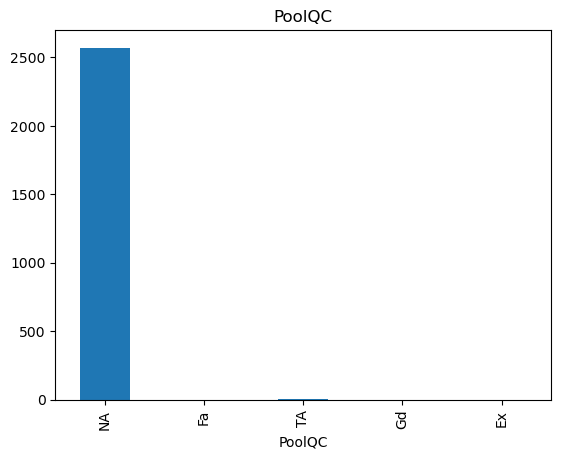

In [75]:
# 'PoolQC': Ordinal- pool quality
vcbd('PoolQC')
copy['PoolQC'] = copy['PoolQC'].fillna(value = 'NA')
sortme18 = copy['PoolQC'].value_counts()[['NA','Fa', 'TA', 'Gd', 'Ex']]
sortme18.plot.bar(title = 'PoolQC')

Fence
NaN      2054
MnPrv     301
GdPrv     111
GdWo      103
MnWw       10
Name: count, dtype: int64
Fence
NaN      0.796433
MnPrv    0.116712
GdPrv    0.043040
GdWo     0.039938
MnWw     0.003877
Name: count, dtype: float64


<Axes: title={'center': 'Fence'}, xlabel='Fence'>

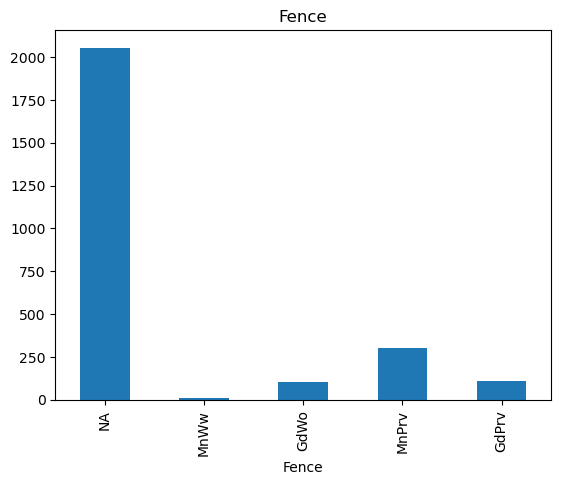

In [76]:
# 'Fence': Ordinal- Fence quality NA, minimum wood/wire, good wood, min priv, good priv
vcbd('Fence')
copy['Fence'] = copy['Fence'].fillna(value = 'NA')
sortme19 = copy['Fence'].value_counts()[['NA','MnWw', 'GdWo', 'MnPrv', 'GdPrv']]
sortme19.plot.bar(title = 'Fence')

MiscFeature
NaN     2482
Shed      88
Gar2       5
Othr       3
TenC       1
Name: count, dtype: int64
MiscFeature
NaN     0.962389
Shed    0.034122
Gar2    0.001939
Othr    0.001163
TenC    0.000388
Name: count, dtype: float64


<Axes: xlabel='MiscFeature'>

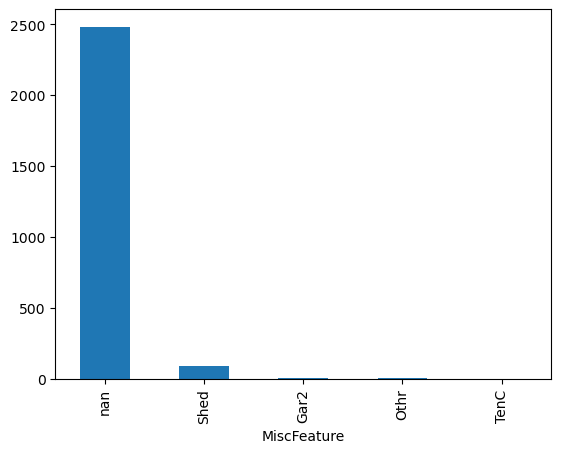

In [77]:
# 'MiscFeature' : Nominal- Misc other features
vcbd('MiscFeature')
housing['MiscFeature'].value_counts(dropna = False).plot.bar()

MiscVal
0        2484
400        17
500        13
600         8
450         8
2000        7
700         7
1200        3
1500        3
480         2
650         2
2500        2
4500        2
420         1
15500       1
750         1
900         1
8300        1
455         1
3500        1
1150        1
300         1
80          1
12500       1
1400        1
560         1
490         1
1300        1
1000        1
350         1
3000        1
6500        1
1512        1
800         1
Name: count, dtype: int64
MiscVal
0        0.963164
400      0.006592
500      0.005041
600      0.003102
450      0.003102
2000     0.002714
700      0.002714
1200     0.001163
1500     0.001163
480      0.000775
650      0.000775
2500     0.000775
4500     0.000775
420      0.000388
15500    0.000388
750      0.000388
900      0.000388
8300     0.000388
455      0.000388
3500     0.000388
1150     0.000388
300      0.000388
80       0.000388
12500    0.000388
1400     0.000388
560      0.000388
490      0.000

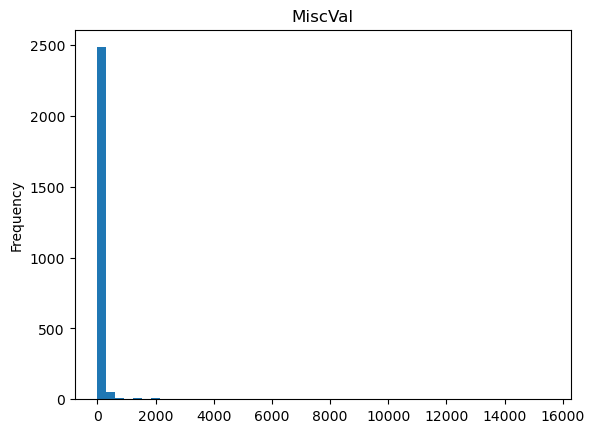

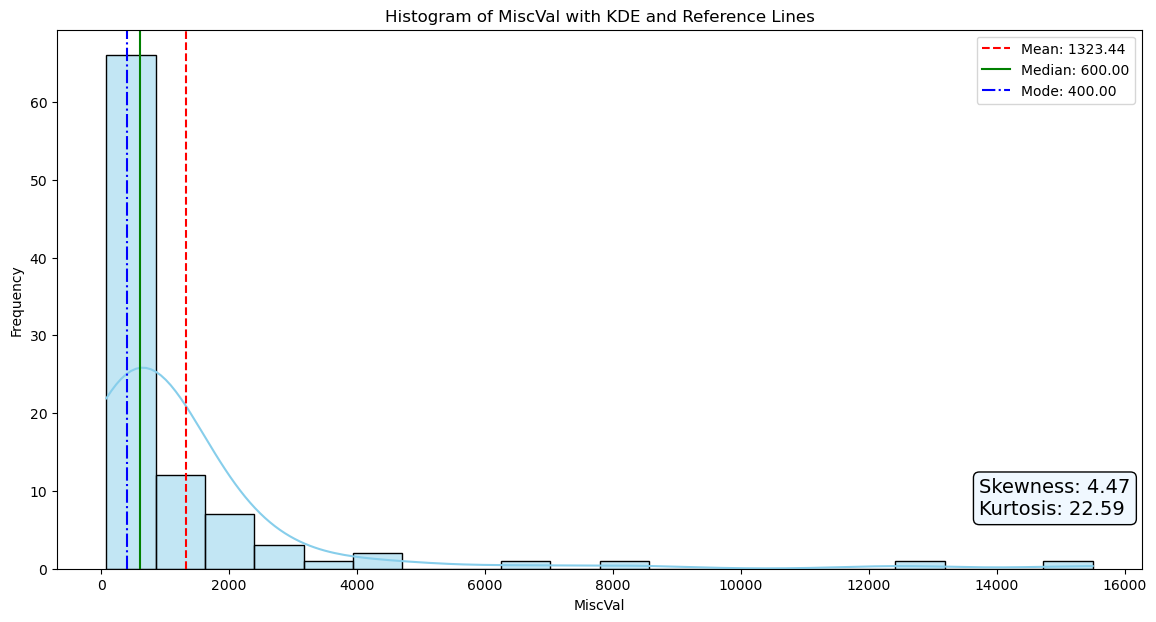

In [78]:
# 'MiscVal': Continuous- Value of Misc
vcbd('MiscVal')
mmm('MiscVal')
housing['MiscVal'].plot.hist(bins=50, title = 'MiscVal')

nozeromask = housing.loc[copy['MiscVal'] != 0]
snshist(framename = nozeromask, colname = 'MiscVal', bins = 20)

#need to ditch the 0's on a lot of these to get a better idea of what each of the indiv features looks like

MoSold
6     459
7     400
5     363
4     252
3     209
8     193
10    148
9     131
2     120
11    117
1     101
12     86
Name: count, dtype: int64
MoSold
6     0.177976
7     0.155099
5     0.140752
4     0.097712
3     0.081039
8     0.074835
10    0.057387
9     0.050795
2     0.046530
11    0.045366
1     0.039162
12    0.033346
Name: count, dtype: float64
mean: 6.152384645211322, median: 6.0, mode: 0    6
Name: MoSold, dtype: int64, std: 2.669913457803709
range: 11, var: 7.128437872161356, IQR: 4.0
skewness: 0.23286446666122568, kurt: -0.385071451593209, 10th pctile: 3.0, 90th pct: 10.0


<Axes: title={'center': 'Month Sold'}, xlabel='MoSold'>

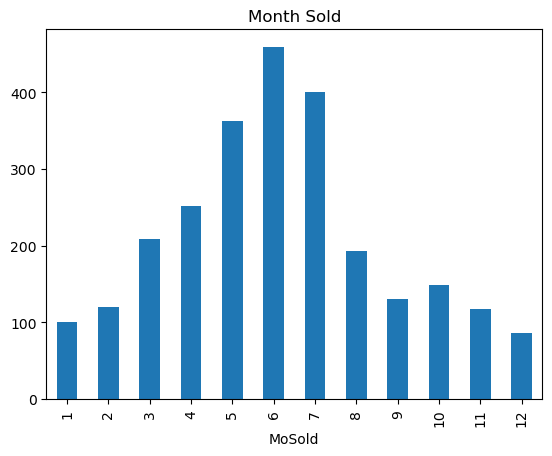

In [79]:
#'MoSold': Discrete- Month Sold
vcbd('MoSold')
mmm('MoSold')
housing['MoSold'].value_counts().sort_index().plot.bar(title = 'Month Sold')

In [80]:
#^College Town- people want to get moved in and settled before the semester starts.

YrSold
2007    600
2009    585
2008    564
2006    515
2010    315
Name: count, dtype: int64
YrSold
2007    0.232648
2009    0.226832
2008    0.218689
2006    0.199690
2010    0.122140
Name: count, dtype: float64
mean: 2007.8390849166344, median: 2008.0, mode: 0    2007
Name: YrSold, dtype: int64, std: 1.3120880143830427
range: 4, var: 1.7215749574876353, IQR: 2.0
skewness: 0.09250597987225881, kurt: -1.1511698675101745, 10th pctile: 2006.0, 90th pct: 2010.0


<Axes: title={'center': 'Yr Sold'}, xlabel='YrSold'>

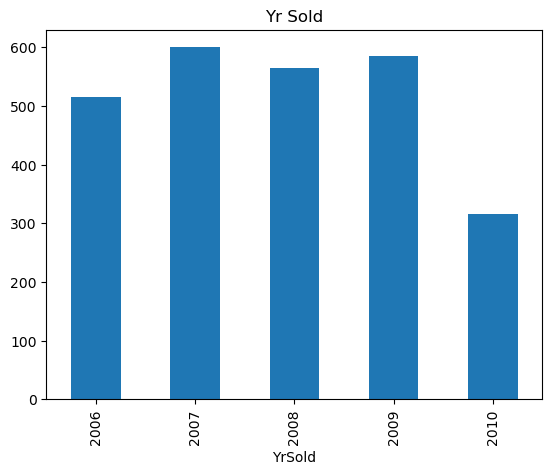

In [81]:
#'YearSold': Discrete- Year Sold
vcbd('YrSold')
mmm('YrSold')
housing['YrSold'].value_counts().sort_index().plot.bar(title = 'Yr Sold')

SaleType
WD       2391
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: count, dtype: int64
SaleType
WD       0.927104
New      0.030632
COD      0.019387
ConLD    0.008918
CWD      0.004265
ConLw    0.003102
ConLI    0.002714
Con      0.001939
Oth      0.001551
VWD      0.000388
Name: count, dtype: float64


<Axes: xlabel='SaleType'>

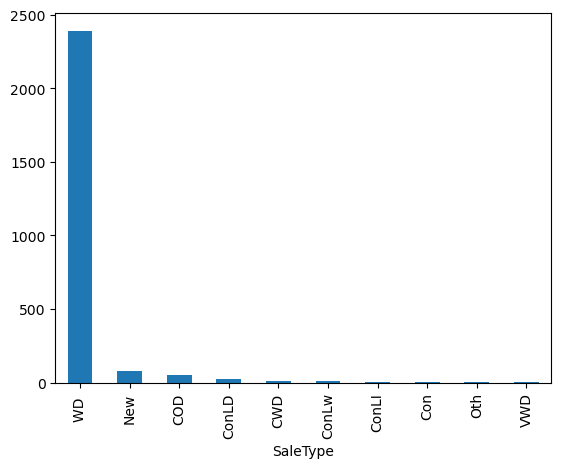

In [82]:
# 'SaleType' : Nominal- Sale Type
vcbd('SaleType')
housing['SaleType'].value_counts(dropna = False).plot.bar()

SaleCondition
Normal     2413
Partial      82
Abnorml      61
Family       17
Alloca        4
AdjLand       2
Name: count, dtype: int64
SaleCondition
Normal     0.935634
Partial    0.031795
Abnorml    0.023653
Family     0.006592
Alloca     0.001551
AdjLand    0.000775
Name: count, dtype: float64


<Axes: xlabel='SaleCondition'>

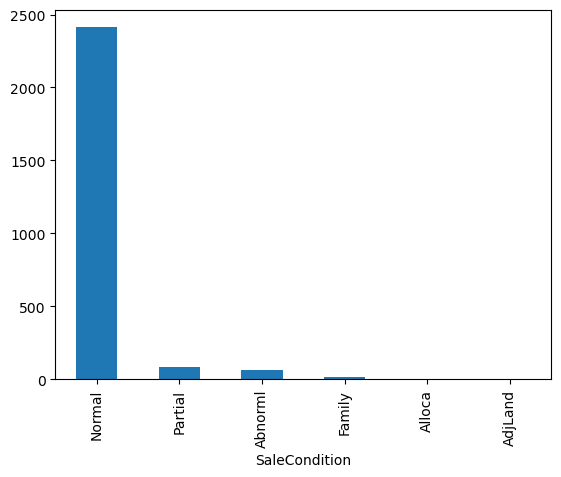

In [83]:
# 'SaleCondition' : Nominal- Sale Condition
vcbd('SaleCondition')
housing['SaleCondition'].value_counts(dropna = False).plot.bar()

## Missing Values

In [84]:
housing.isnull().sum(axis=0)[housing.isnull().sum(axis=0) > 0]

LotFrontage      462
Alley           2411
MasVnrType      1572
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2570
Fence           2054
MiscFeature     2482
dtype: int64

In [85]:
#for each column with missing values' name, indicate object in the column
for col in housing.isnull().sum(axis=0)[housing.isnull().sum(axis=0) > 0].index: #column name w/missing values
    print(f"{col}: {housing[col].dtype}")

LotFrontage: float64
Alley: object
MasVnrType: object
MasVnrArea: float64
BsmtQual: object
BsmtCond: object
BsmtExposure: object
BsmtFinType1: object
BsmtFinSF1: float64
BsmtFinType2: object
BsmtFinSF2: float64
BsmtUnfSF: float64
TotalBsmtSF: float64
Electrical: object
BsmtFullBath: float64
BsmtHalfBath: float64
FireplaceQu: object
GarageType: object
GarageYrBlt: float64
GarageFinish: object
GarageCars: float64
GarageArea: float64
GarageQual: object
GarageCond: object
PoolQC: object
Fence: object
MiscFeature: object


In [86]:
missing_categorical_cols = []
missing_numerical_cols = []

for col in housing.isnull().sum(axis=0)[housing.isnull().sum(axis=0) > 0].index:
    if str(housing[col].dtype) == 'object':
        missing_categorical_cols.append(col)
    if str(housing[col].dtype) == 'float64':
        missing_numerical_cols.append(col)
print(f"Categorical Cols with Missing Vals {len(missing_categorical_cols)}: {missing_categorical_cols}")
print(f"Numerical Cols with Missing Vals {len(missing_numerical_cols)}: {missing_numerical_cols}")

Categorical Cols with Missing Vals 16: ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Numerical Cols with Missing Vals 11: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


Text(0.5, 1.0, 'Categorical Variables with Missing Values')

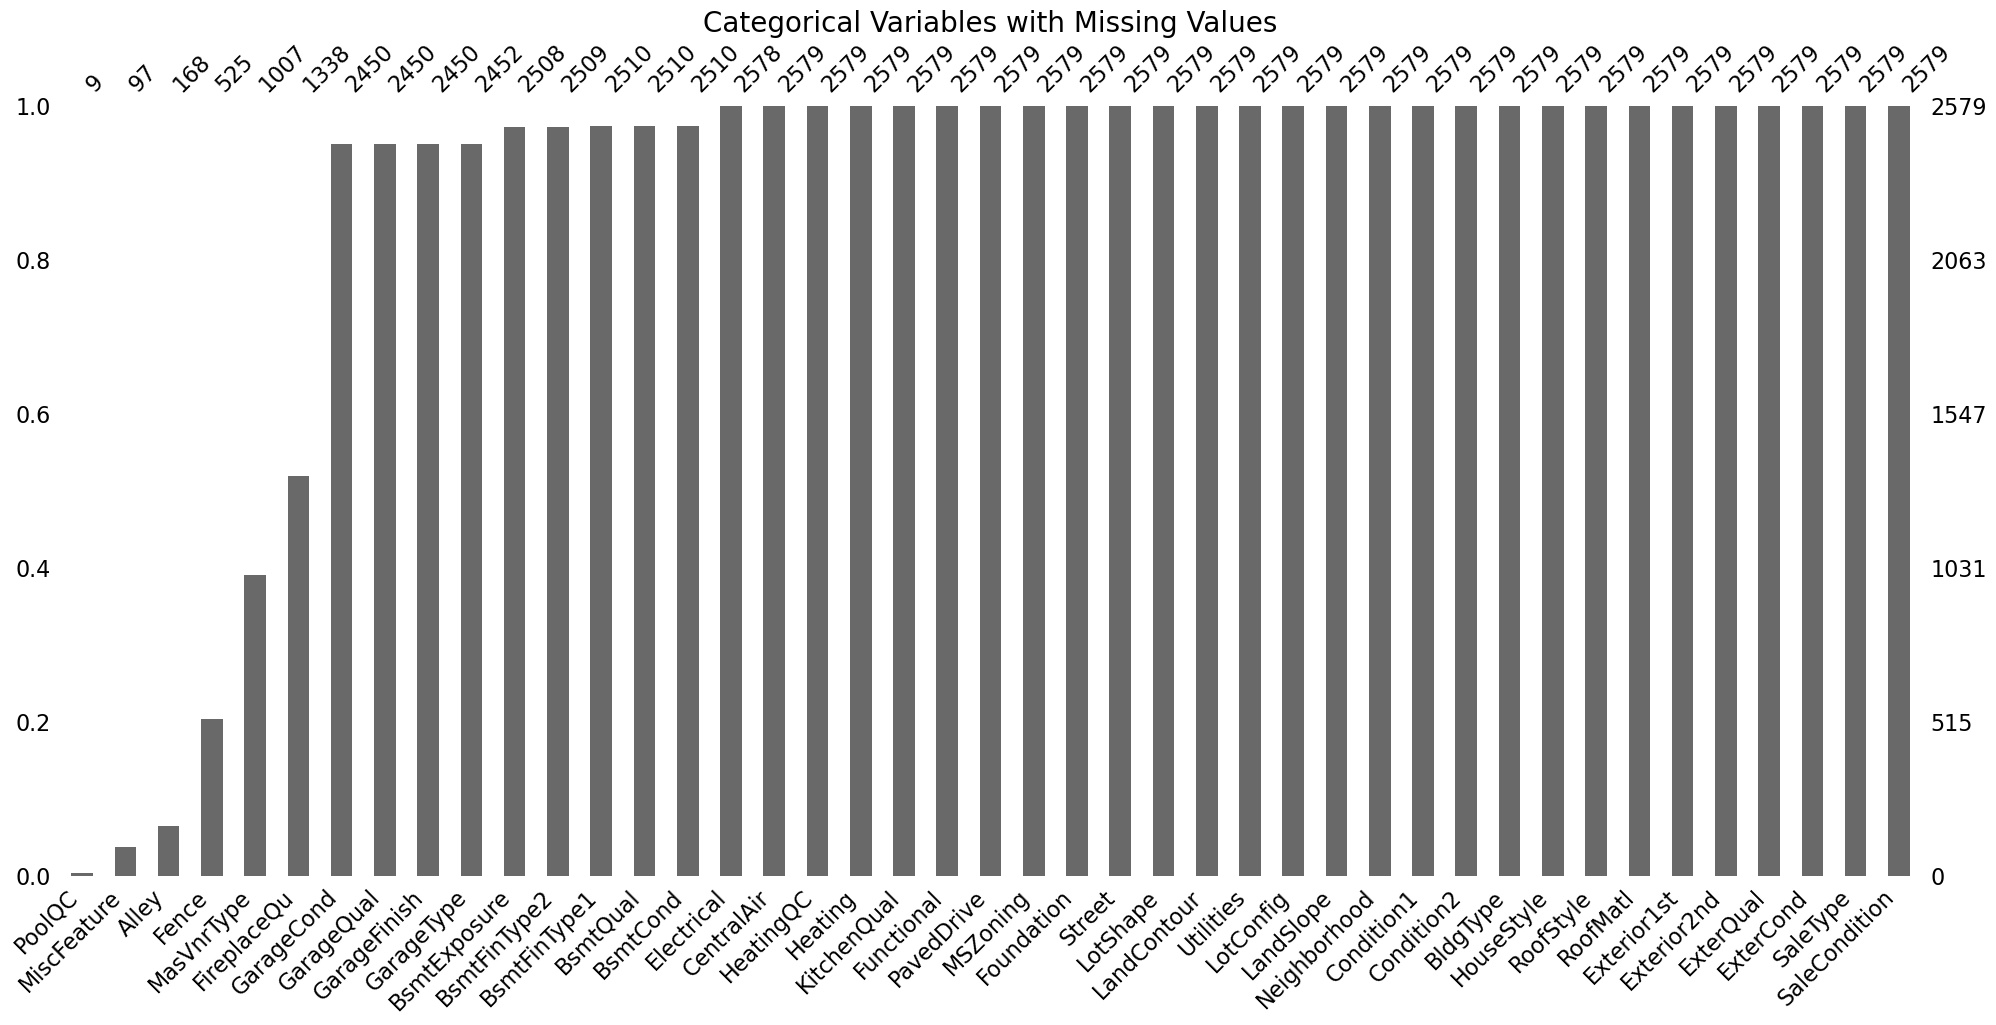

In [87]:
msno.bar(housing.select_dtypes(include=['object']), sort = 'ascending')
plt.title('Categorical Variables with Missing Values', fontsize = 20)

Text(0.5, 1.0, 'Numerical Variables with Missing Values')

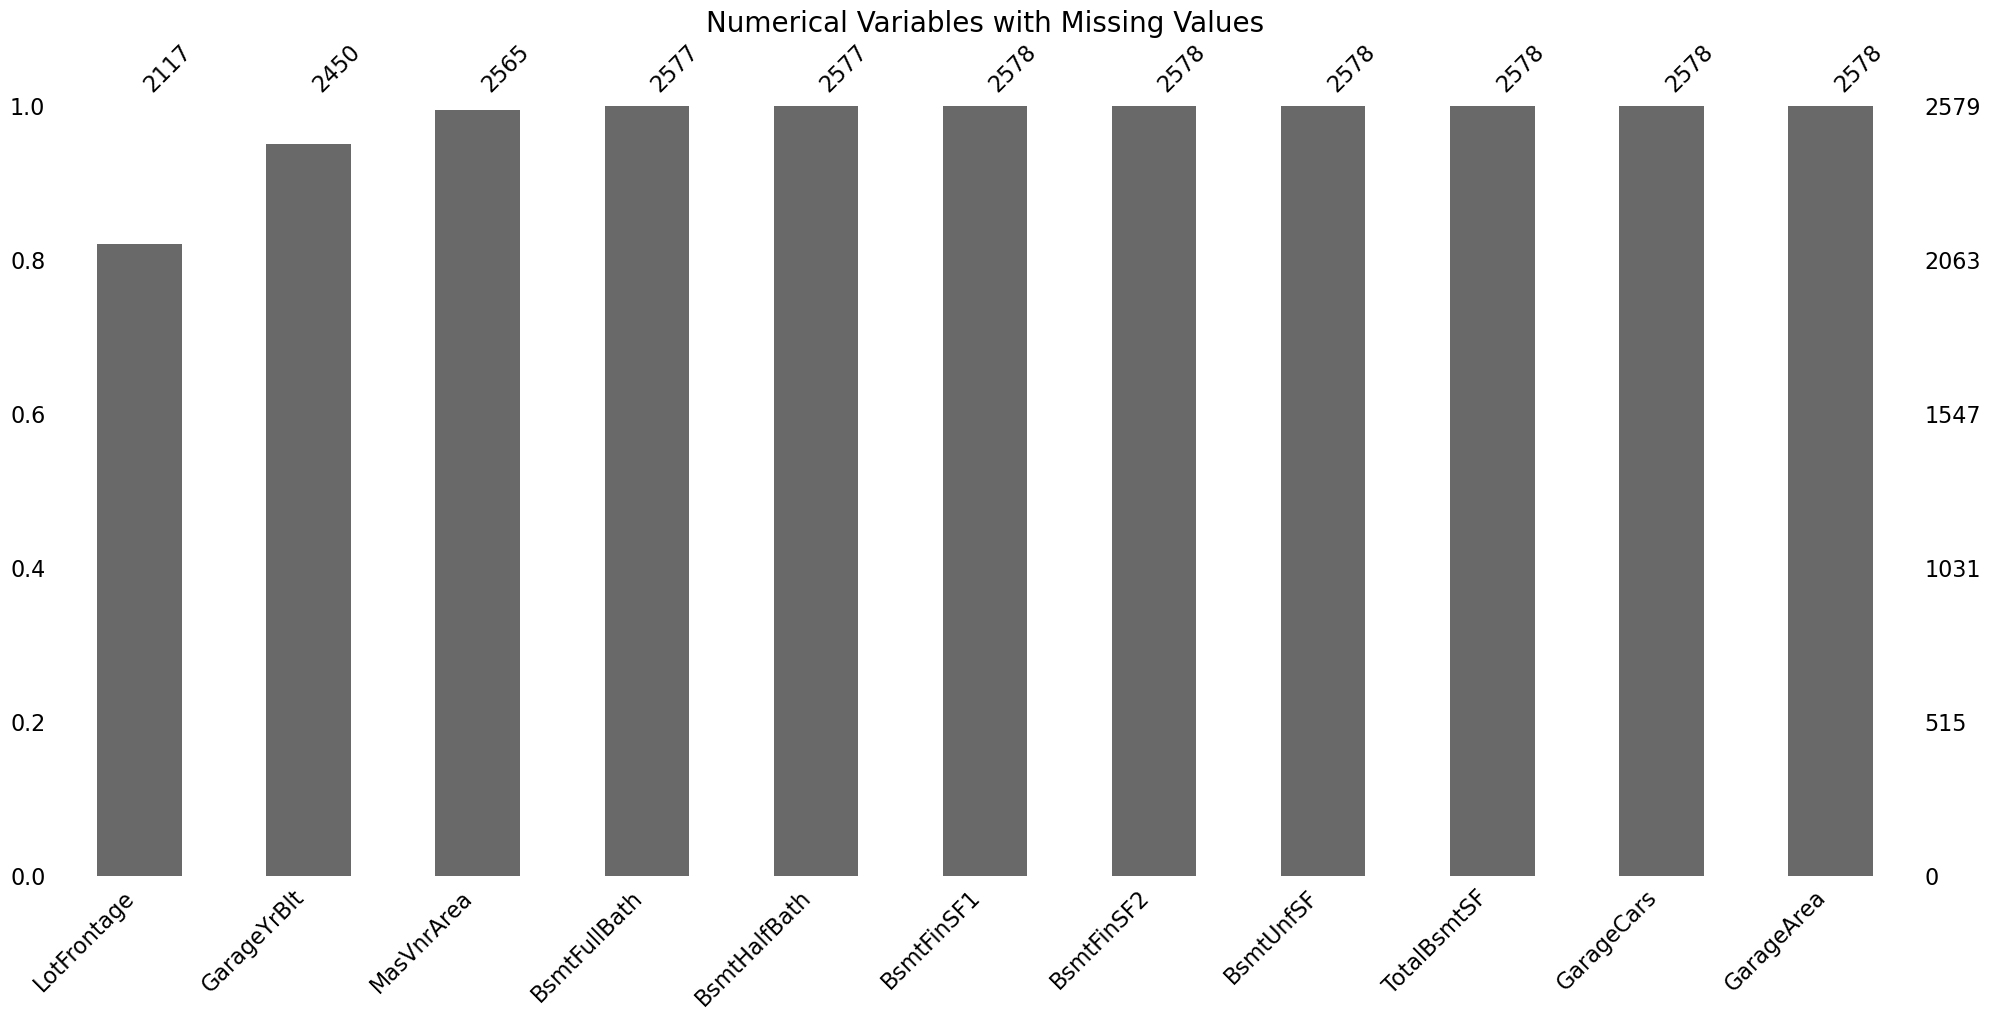

In [88]:
msno.bar(housing.select_dtypes(include=['float64']), sort = 'ascending')
plt.title('Numerical Variables with Missing Values', fontsize = 20)

### Impute Missing Values: 1. Categorical Data

In [89]:
#Iterate through this list, assess state of missing categorical data and make decisions about imputation.
missing_categorical_cols

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

#### Electrical and Alley

In [90]:
#Electrical is missing one value:
housing['Electrical'].value_counts(dropna = False)/len(housing)

Electrical
SBrkr    0.916634
FuseA    0.065142
FuseF    0.015122
FuseP    0.002714
NaN      0.000388
Name: count, dtype: float64

In [91]:
#impute with mode (92% are SBrkr)
housing['Electrical'] = housing['Electrical'].fillna(value = 'SBrkr')

In [92]:
missing_categorical_cols.remove('Electrical')

In [93]:
missingmask = housing[housing['Alley'].isna()]

missingmask['Alley'].value_counts(dropna = False)

#No other details in data to learn from: Impute 'None'

Alley
NaN    2411
Name: count, dtype: int64

In [94]:
housing['Alley'] = housing['Alley'].fillna('None')

### Masonry

In [95]:
housing['MasVnrType'].value_counts(dropna = False)

MasVnrType
NaN        1572
BrkFace     804
Stone       183
BrkCmn       20
Name: count, dtype: int64

In [96]:
#Filter to where 'MasVnrType' is null and 'MasVnrArea' is NOT null:
missingmask = housing[housing['MasVnrType'].isna()]
missingmask[pd.notna(missingmask['MasVnrArea']) & missingmask['MasVnrArea'] != 0]

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
115  534129230       1790     165150          60       RL         80.0   
604  528138010       1808     324000          20       RL        102.0   
138  535106140        912     114500          20       RL         70.0   
231  527451110       1365     125000         160       RM         24.0   
177  527166010       1983     225000          60       RL          NaN   
284  902427140        968     104500          20       RM         52.0   
290  533352075       2620     190000          90       RL          NaN   

     LotArea Street Alley LotShape  ... ScreenPorch PoolArea PoolQC Fence  \
115    10400   Pave  None      Reg  ...         147        0    NaN   NaN   
604    13514   Pave  None      IR1  ...           0        0    NaN   NaN   
138    10150   Pave  None      Reg  ...           0        0    NaN   NaN   
231     2368   Pave  None      Reg  ...           0        0    NaN   NaN   
177    10762   Pave  None      IR1  ...           0        0    NaN   NaN   
284     8626   Pave  None      Reg  ...           0        0    NaN   NaN   
290    18890   Pave  None      IR1  ...           0        0    NaN   NaN   

    MiscFeature MiscVal MoSold YrSold SaleType  SaleCondition  
115         NaN       0     11   2006      WD          Normal  
604         NaN       0      3   2009      WD          Normal  
138         NaN       0      7   2007      COD         Normal  
231         NaN       0      5   2009      WD          Normal  
177         NaN       0      5   2009      WD          Normal  
284         NaN       0      5   2007      WD          Normal  
290        Gar2    8300      8   2007      WD          Normal  

[7 rows x 81 columns]

In [97]:
#Where masonry is 1 sq ft? Remove, replace with 0
mask1 = (housing['MasVnrType'].isna()) & (housing['MasVnrArea'].notna()) & (housing['MasVnrArea'] == 1)
housing.loc[mask1, ['MasVnrType', 'MasVnrArea']] = ('None', 0)

In [98]:
#Where masonry is more than 1 sq ft? Retain, Impute MasVnrType with mode: 'BrkFace'
mask2 = (housing['MasVnrType'].isna()) & (housing['MasVnrArea'].notna()) & (housing['MasVnrArea'] != 0)
housing.loc[mask2, 'MasVnrType'] = 'BrkFace'

In [99]:
housing['MasVnrType'] = housing['MasVnrType'].fillna(value = 'None')

#### Basement Values

In [100]:
mask = (housing['BsmtQual'].isna() & housing['BsmtFinSF1'].notna())
housing.loc[mask, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = ('None', 'None',\
                                                                                              'None', 'None', 'None')

In [101]:
missingmask = housing['BsmtQual'].isna()

housing.loc[missingmask, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = ('None', 'None',\
                                                                                              'None', 'None', 'None')

In [102]:
housing[housing['BsmtCond'].isna()]

Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 81 columns]

In [103]:
mask = housing['BsmtExposure'].isna()
housing.loc[mask, 'BsmtExposure'] = 'No'

In [104]:
housing[housing['BsmtFinType1'].isna()]

Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 81 columns]

In [105]:
mask = housing['BsmtFinType2'].isna()
housing.loc[mask, ['BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF']] = ('Unf', 479.0, 1603.0)

#### Fireplaces

In [106]:
mask = housing['FireplaceQu'].isna()
housing.loc[mask, 'FireplaceQu'] = 'None'
#Safely impute missing vals for 'FireplaceQu' with 'None'

#### Garages

In [107]:
pd.set_option('display.max_rows', 127)
missingmask = housing['GarageType'].isna()
housing.loc[missingmask, ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] =\
    ('None', 'None', 'None', 'None')
#Where GarageType is NaN, all other Garage Attributes are 0 or NaN

In [108]:
pd.set_option('display.max_rows', 129)
missingmask = housing[housing['GarageFinish'].isna()]
missingmask
#missingmask[pd.notna(missingmask['GarageType'])]
#Two weird rows, 'Garage Type' specified but some other missing data.
#PID 910201180, 903426160

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
434  910201180       1828     150909          70       RM         50.0   
532  903426160       1984     160000          60       RM         57.0   

     LotArea Street Alley LotShape  ... ScreenPorch PoolArea PoolQC  Fence  \
434     9060   Pave  None      Reg  ...           0        0    NaN  MnPrv   
532     8094   Pave  Grvl      Reg  ...           0        0    NaN  MnPrv   

    MiscFeature MiscVal MoSold YrSold SaleType  SaleCondition  
434         NaN       0      3   2007      WD          Alloca  
532        Shed    1000      9   2008      WD          Normal  

[2 rows x 81 columns]

In [109]:
mask = (housing['PID'] == 910201180)

housing.loc[mask, ['GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond']] =\
    ('Unf', 1, 'TA', 'TA')

In [110]:
mask = (housing['PID'] == 903426160)

housing.loc[mask, ['GarageFinish', 'GarageQual', 'GarageCond']] =\
    ('Unf', 'TA', 'TA')

In [111]:
missingmask = housing[housing['GarageQual'].isna()]
missingmask
#GarageQual fully imputed

Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 81 columns]

In [112]:
missingmask = housing[housing['GarageCond'].isna()]
missingmask
#GarageCond fully imputed

Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 81 columns]

### PoolQC, MiscFeature, Fence

In [113]:
mask = housing['PoolQC'].isna() & housing['PoolArea'].notna() & (housing['PoolArea'] != 0)
housing[mask]
#If PoolQC is missing, the square footage is listed as 0, safe to impute with 'None'

housing['PoolQC'] = housing['PoolQC'].fillna('None')

In [114]:
mask = housing['MiscFeature'].isna() & housing['MiscVal'].notna() & (housing['MiscVal'] != 0)
housing[mask]

#If MiscFeature is missing, there are no dangling 'MiscVal' values to complicate imputing with 'None'

housing['MiscFeature'] = housing['MiscFeature'].fillna('None')

In [115]:
#No other data about Fence to cross-reference, so:
housing['Fence'] = housing['Fence'].fillna('None')

Text(0.5, 1.0, 'Categorical Variables: Missing Val Check')

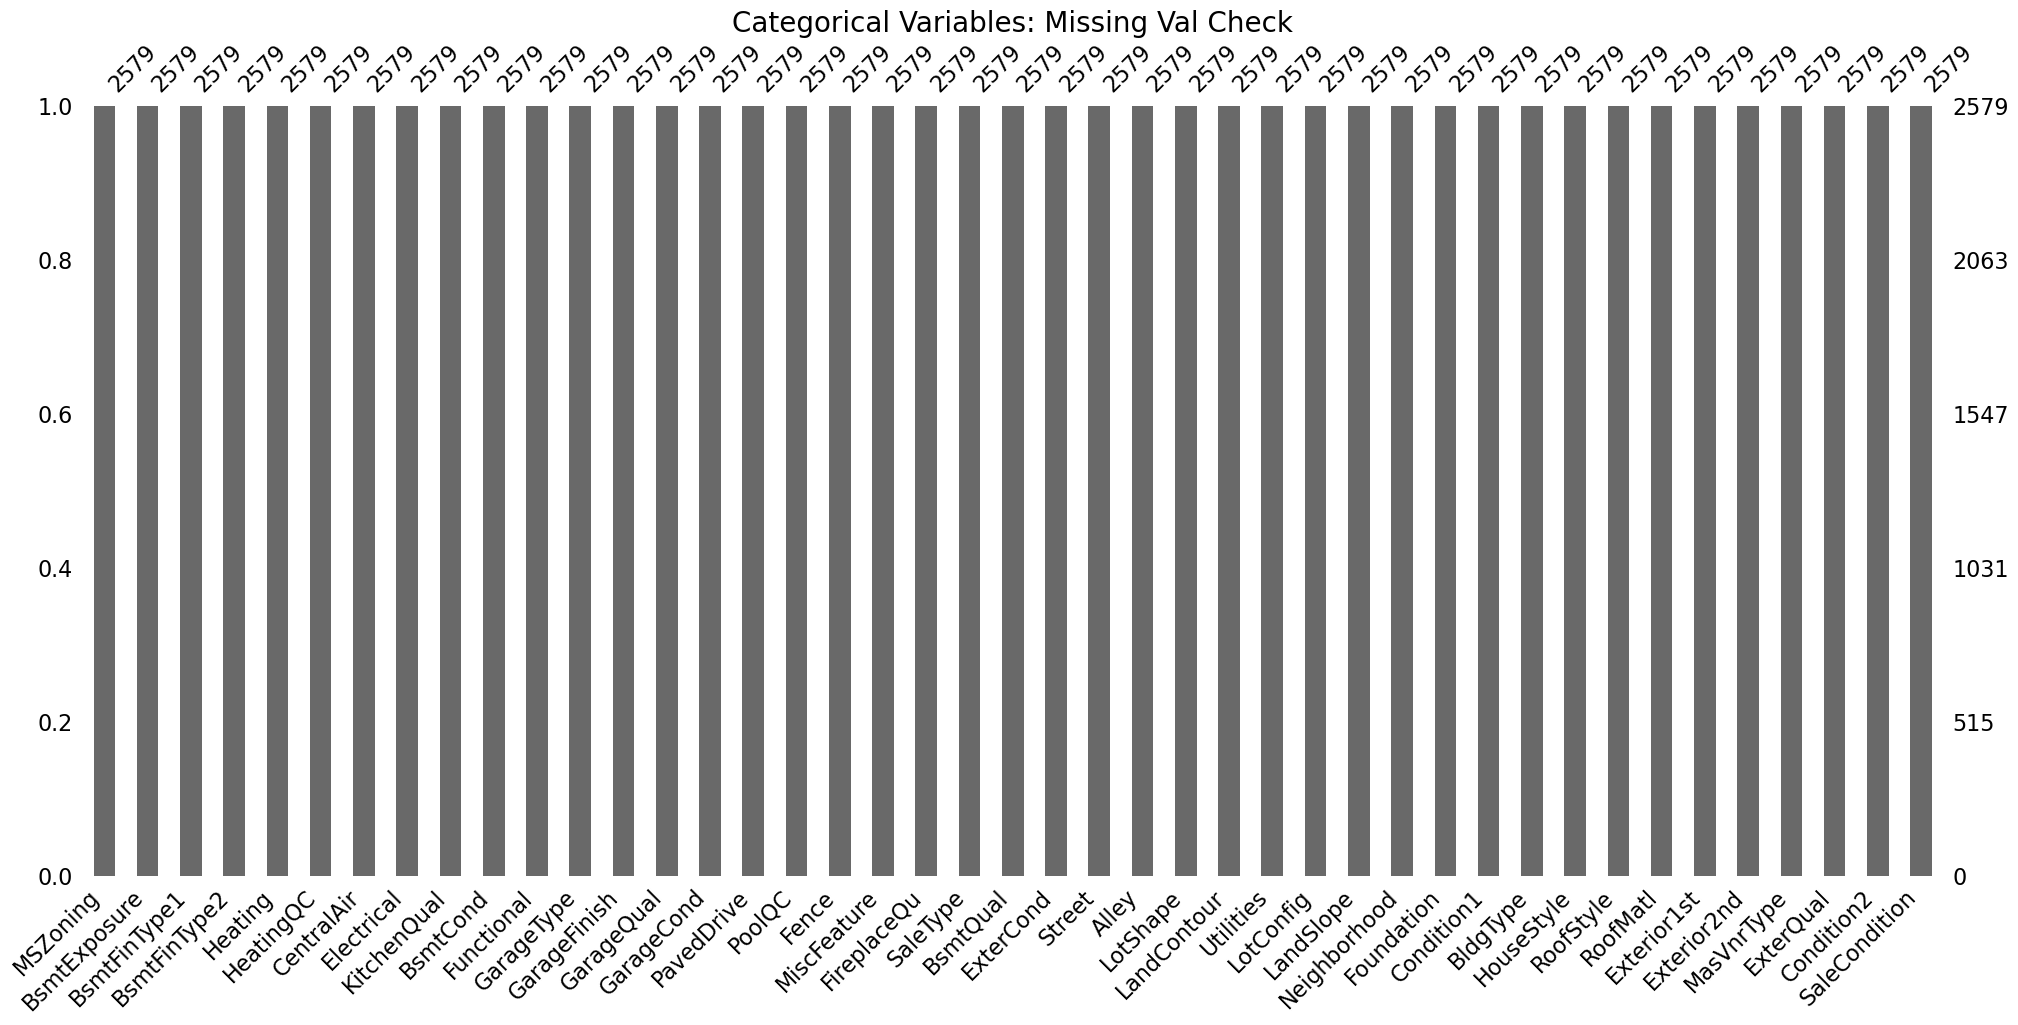

In [116]:
#If categorical values imputed successfully, every column should read 2579
msno.bar(housing.select_dtypes(include=['object']), sort = 'ascending')
plt.title('Categorical Variables: Missing Val Check', fontsize = 20)

### Impute Missing Values: 2. Numerical Data

In [117]:
missing_numerical_cols
#All have to do with Lot Frontage, Masonry, Basement, and Garage

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

#### Lot Frontage

MSSubClass
20     0.370130
60     0.277056
120    0.071429
80     0.064935
50     0.051948
90     0.036797
85     0.032468
160    0.028139
30     0.025974
70     0.021645
190    0.008658
75     0.004329
40     0.002165
180    0.002165
150    0.002165
Name: proportion, dtype: float64
MSZoning
RL         0.870130
RM         0.075758
FV         0.041126
RH         0.008658
I (all)    0.002165
C (all)    0.002165
Name: proportion, dtype: float64
LotArea
7500     0.010823
4426     0.008658
11000    0.008658
11250    0.008658
7750     0.008658
           ...   
11677    0.002165
6120     0.002165
12099    0.002165
11885    0.002165
8826     0.002165
Name: proportion, Length: 414, dtype: float64
LotShape
IR1    0.653680
Reg    0.277056
IR2    0.058442
IR3    0.010823
Name: proportion, dtype: float64
LandContour
Lvl    0.891775
Low    0.051948
Bnk    0.032468
HLS    0.023810
Name: proportion, dtype: float64
LotConfig
Inside     0.564935
Corner     0.205628
CulDSac    0.179654
FR2        0.0432

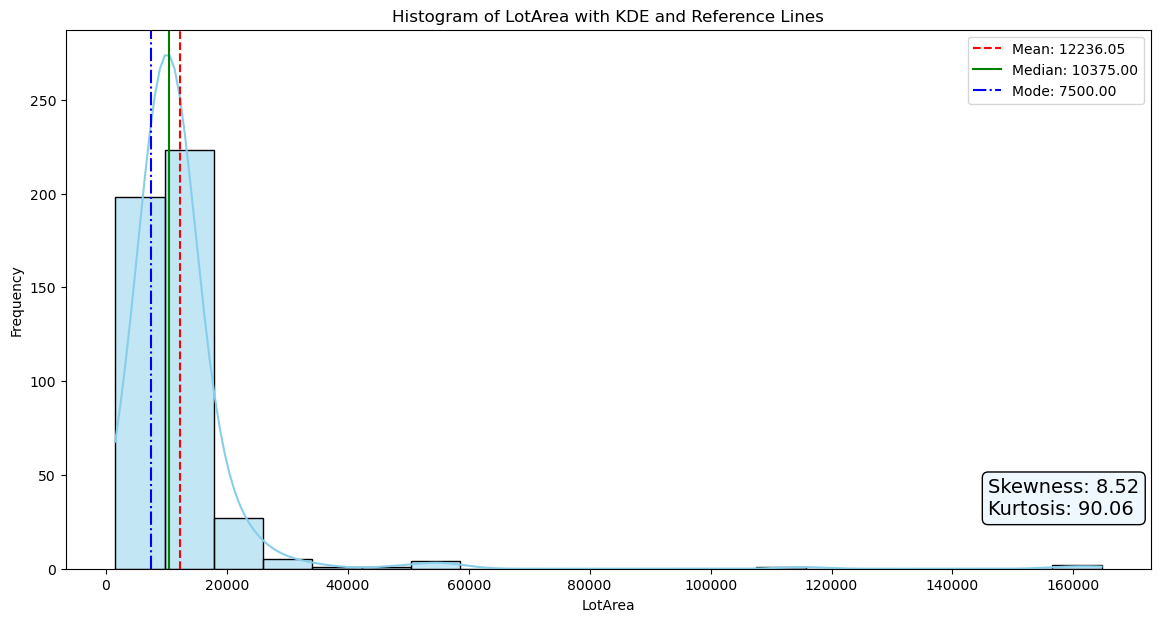

In [118]:
#462 Rows with 'LotFrontage' NaNs

missingmask = housing[housing['LotFrontage'].isna()]
len(missingmask)

lot_traits = ['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour', 'LotConfig']

for col in lot_traits:
    print(missingmask[col].value_counts(normalize=True))
snshist('LotArea', framename = missingmask, plotx = 14, ploty = 7, bins = 20)

#I don't see a compelling overall trend for buildings sold with missing 'LotFrontage' values.
#Missing Completely at Random?

In [119]:
#Lot Frontage: Impute Mean
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].mean())

### Masonry Veneer Area

In [120]:
missingmask = housing[housing['MasVnrArea'].isna()]
missingmask
#Masonry Veneer Area is Nan in these columns because 'MasVnrType' is exclusively 'None': Impute 0's

housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)

### Basement

In [121]:
mask = housing['BsmtFinSF1'].isna()

housing.loc[mask, ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']] = (0, 0, 0, 0)

#Observations with Nans in 'BsmtFinSF1' don't have basements: Impute with 0's

In [122]:
housing[housing['BsmtFinSF2'].isna()]

#'BsmtFinSF2' fixed

Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 81 columns]

In [123]:
housing[housing['BsmtUnfSF'].isna()]

#'BsmtUnfSF' fixed

Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 81 columns]

In [124]:
housing[housing['TotalBsmtSF'].isna()]

#'TotalBsmtSF' fixed

Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 81 columns]

In [125]:
mask  = housing['BsmtFullBath'].isna()

housing.loc[mask, ['BsmtFullBath', 'BsmtHalfBath']] = (0, 0)

#No Full Bathrooms in Basement? It's because they don't have a basement. Impute 0's

In [126]:
housing[housing['BsmtHalfBath'].isna()]


#'BsmtHalfBath' fixed

Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 81 columns]

### Garage

In [127]:
missingmask = housing[housing['GarageYrBlt'].isna()]
missingmask[missingmask['GarageType'] != 'None']

#Two Detached Garages with Nans for Year Built- homes built 1923 and 1910, remodeled 1999 and 1983
#Could impute with YearBuilt or YearRemodAdd-- only two rows, likely safe to impute mean.

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
434  910201180       1828     150909          70       RM         50.0   
532  903426160       1984     160000          60       RM         57.0   

     LotArea Street Alley LotShape  ... ScreenPorch PoolArea PoolQC  Fence  \
434     9060   Pave  None      Reg  ...           0        0   None  MnPrv   
532     8094   Pave  Grvl      Reg  ...           0        0   None  MnPrv   

    MiscFeature MiscVal MoSold YrSold SaleType  SaleCondition  
434        None       0      3   2007      WD          Alloca  
532        Shed    1000      9   2008      WD          Normal  

[2 rows x 81 columns]

In [128]:
mask = (housing['PID'] == 910201180)

housing.loc[mask, ['GarageYrBlt', 'GarageArea']] = (housing['GarageYrBlt'].mean(), housing['GarageArea'].mean())

In [129]:
mask = (housing['PID'] == 903426160)

housing.loc[mask, 'GarageYrBlt'] = (housing['GarageYrBlt'].mean())

In [130]:
#All remaining 'GarageYrBlt' NaNs are for houses without garages. Impute with 0 to retain data type of column
#housing['GarageYrBlt'].isna()
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)

In [131]:
housing[housing['GarageArea'].isna()]

#'GarageArea' fixed

Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 81 columns]

Text(0.5, 1.0, 'Numerical Variables: Missing Val Check')

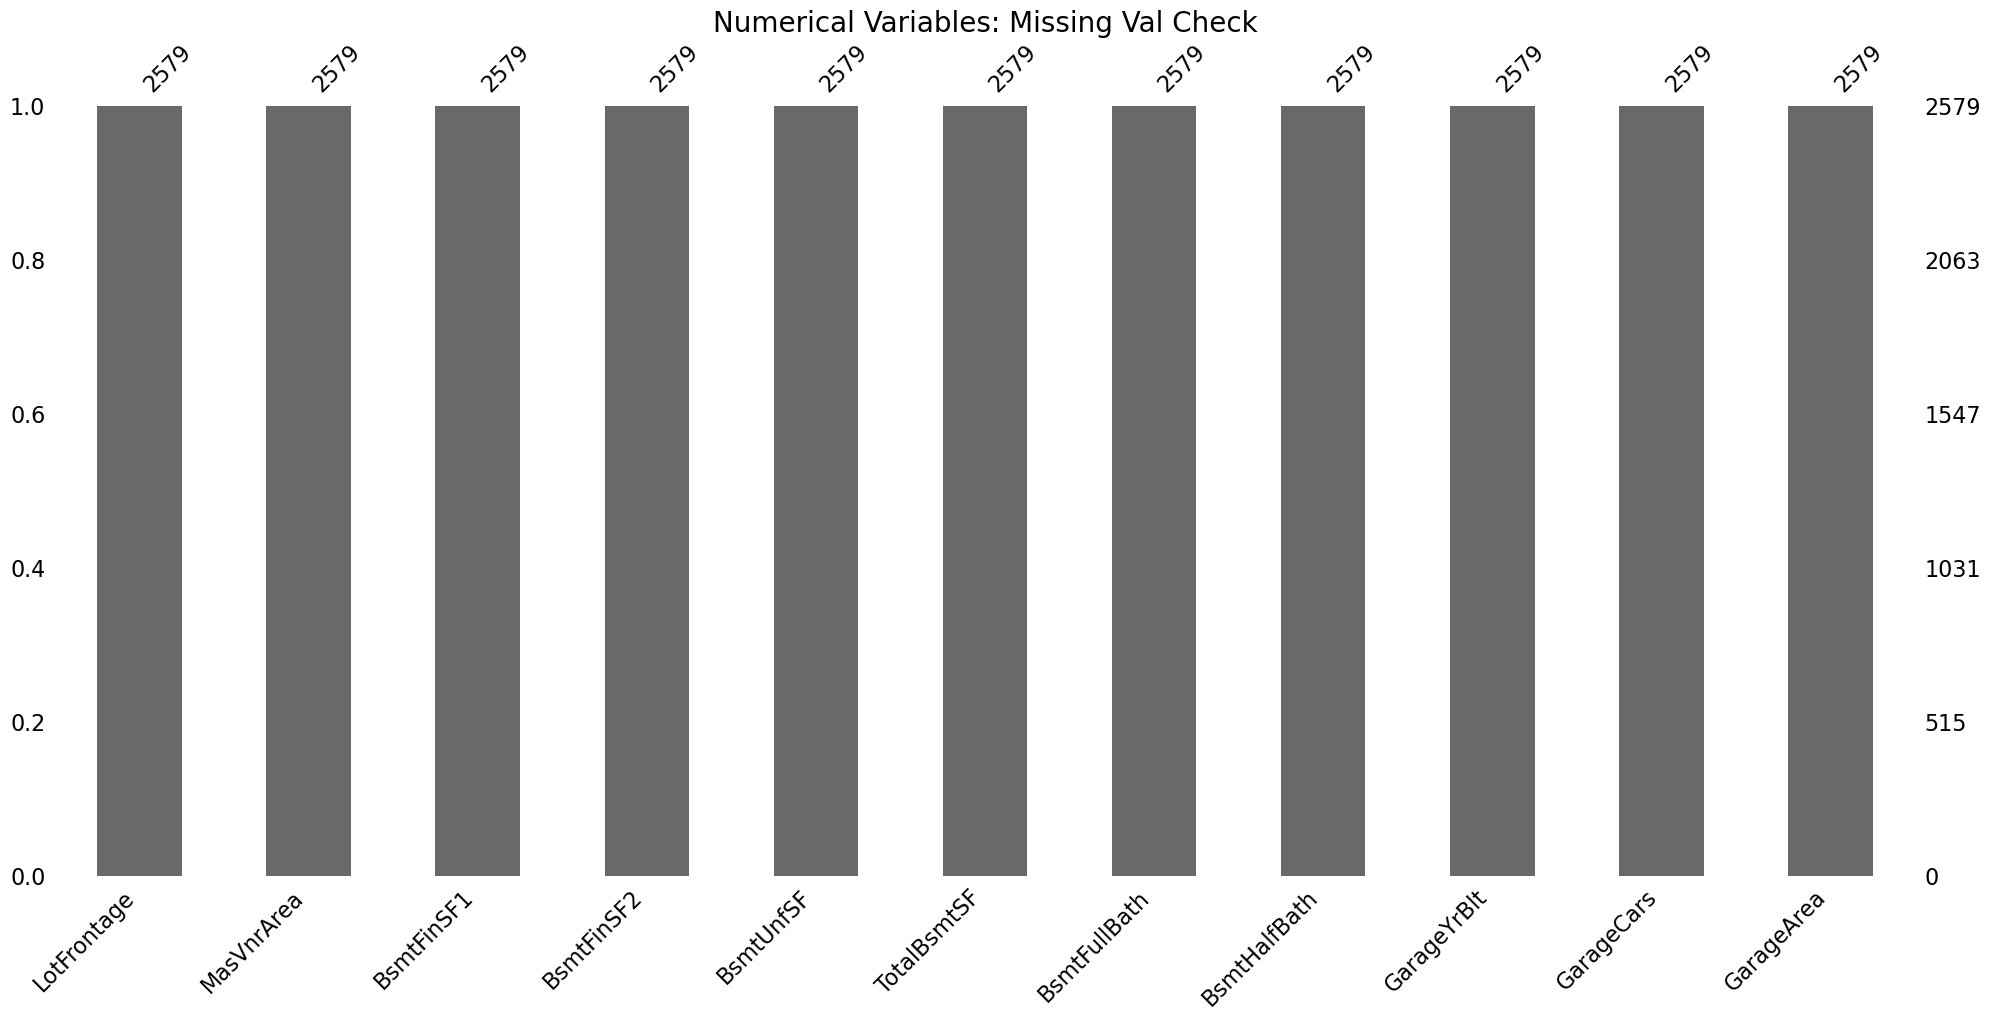

In [132]:
#If numerical values imputed successfully, every column should read 2579
msno.bar(housing.select_dtypes(include=['float64']), sort = 'ascending')
plt.title('Numerical Variables: Missing Val Check', fontsize = 20)

# NEXT STEPS: FEATURE ENGINEERING, MULTICOLLINEARITY, EDA

## Feature Engineering:
Hopefully trying to reduce dimensions and earmark a few new columns that may be significant in a multiple linear regression. Some of this engineering was suggested in Iain Pardoe's 2008 paper, "Modeling Home Prices Using Realtor Data" from 'The Journal of Statistics Education' (which is cited in De Cock, 2011).

#### Bathrooms

In [134]:
#Total Bathrooms Column (Full and Half):
housing['TotalBath'] = housing['BsmtFullBath'] + housing['FullBath'] +\
                       (housing.BsmtHalfBath * .5) + (housing.HalfBath * .5)

In [135]:
#Bed * Bath= Buildings where bedrooms and bathrooms are out of step with each other may sell for less.

housing['Bed*Bath'] = housing['TotalBath'] * housing['BedroomAbvGr']
housing['Bed*Bath'].value_counts()

Bed*Bath
6.0     544
7.5     320
4.0     244
3.0     235
2.0     226
4.5     182
9.0     172
10.5    150
10.0    114
8.0     106
14.0     68
12.0     49
5.0      42
2.5      25
7.0      23
1.0      18
18.0     10
12.5      9
0.0       7
17.5      6
15.0      5
1.5       4
16.0      4
20.0      3
22.5      3
42.0      3
24.0      2
13.5      2
3.5       2
27.0      1
Name: count, dtype: int64

### YearBuilt Refactoring:
Pardoe suggests that in a given market, the oldest and newest buildings may have a price premium:
"This particular housing market (JS: not Ames) has a mix of homes that were built from 1905 to 2005, with a mean around 1970. Since from the realtor’s experience both very old homes and very new homes tend to command a price premium relative to "middle age" homes in this market, a quadratic effect might be expected for an age variable in a multiple linear regression model to predict price. To facilitate this we use a rescaled Age variable by subtracting 1970 from "year built" and dividing by 10. The resulting variable has a mean close to zero and a standard deviation just over 2, and represents the number of decades away from 1970." 
- I plan a similar standardization on 'YearBuilt' here.

In [136]:
print(housing['YearBuilt'].mean())
housing['Age_Standardized'] = (housing['YearBuilt'] - housing['YearBuilt'].mean())/10
print(housing['Age_Standardized'].mean())
print(housing['Age_Standardized'].std())

#Our resulting variable has a mean of virtually 0 and a standard deviation of about 3,
#representing decades away from 1970. This widening of the standard deviation is indicative of the housing market
#bubble of the years 2006-2010, which are not represented in Pardoe's dataset (See earlier 
#histogram of housing['YearBuilt']).

1970.3257076386196
-1.3555138658160887e-15
2.9719469379437595


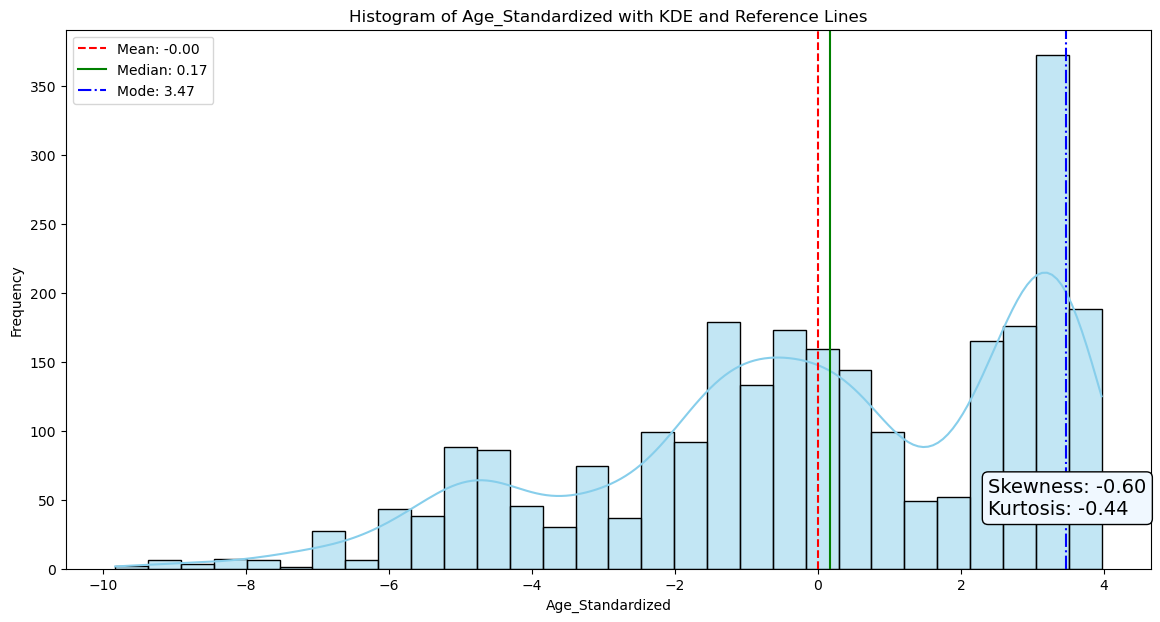

In [137]:
snshist('Age_Standardized')
#Skewness= distribution is skewed to the left
#Kurtosis= slightly flatter (less peaked) than a normal distribution, with lighter tails.

Pardoe also suggests a calculation of 'Age Squared' to capture this quadratic relationship:

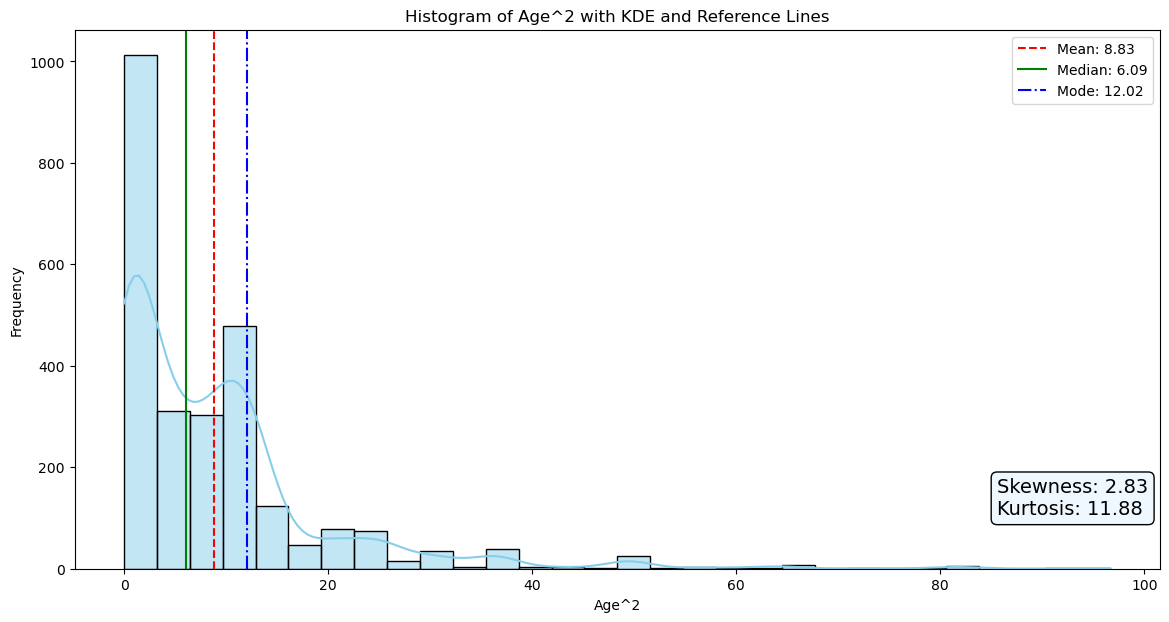

In [138]:
housing['Age^2'] = housing.Age_Standardized**2
snshist('Age^2')

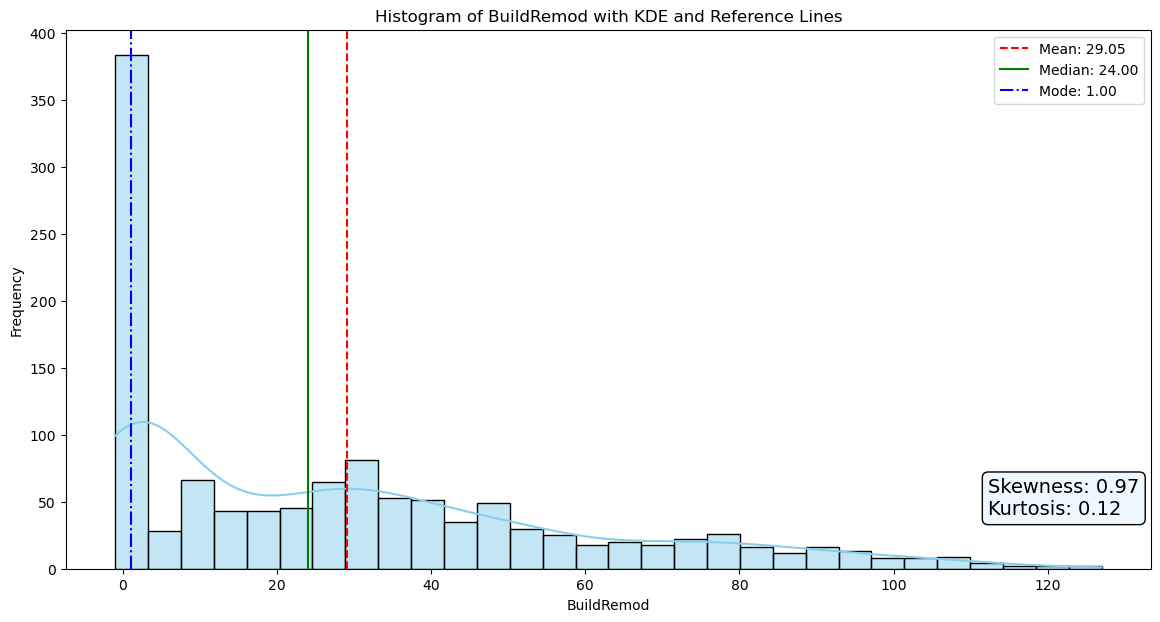

In [144]:
#BuildRemod: Interval - Years between build and remodel (0 if no remodel)

housing['BuildRemod'] = housing['YearRemodAdd'] - housing['YearBuilt']

#Visualize Interval of remodels
nozeromask = housing.loc[housing['BuildRemod'] != 0]
snshist('BuildRemod', framename = nozeromask)

#Remodels tend to be 1 year after build (revisions) and 24-30 (spruce up for the new millenium?)

### Combine Porches/Decks

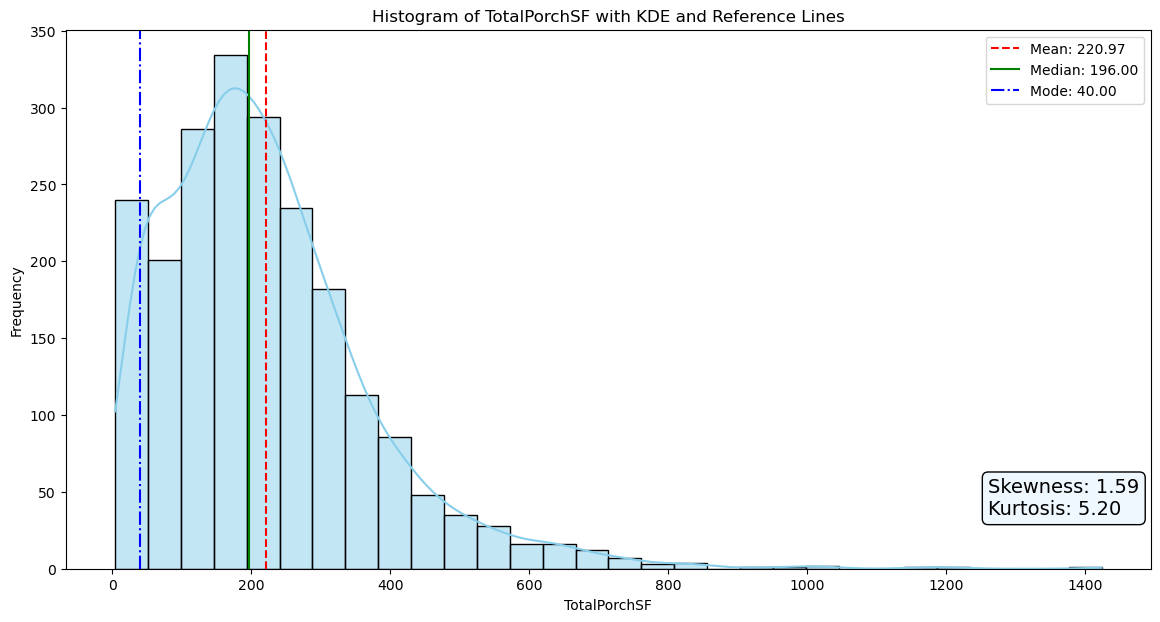

In [143]:
housing['TotalPorchSF'] = housing[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',\
                                    '3SsnPorch', 'ScreenPorch']].sum(axis=1)

#Visualize Square Footage of all homes with any porch/deck
nozeromask = housing.loc[housing['TotalPorchSF'] != 0]
snshist('TotalPorchSF', framename = nozeromask)

### Square Footage

In [145]:
#Total Square Footage: Above Grade + Basement
housing['TotalSF'] = housing['GrLivArea'] + housing['TotalBsmtSF']

#High Quality SF
housing['HQSF'] = housing['TotalSF'] - housing['LowQualFinSF']

### Lot Area
Pardoe suggests a binning process for lot area (a 2000 sq ft increase in lot size means different things has different implications for saleprice depending on the initial size of the lot).

<Axes: xlabel='LotArea', ylabel='SalePrice'>

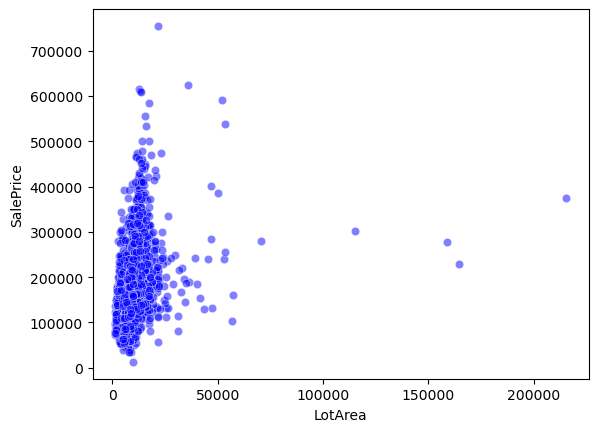

In [171]:
sns.scatterplot(x = housing['LotArea'], y = housing['SalePrice'], color = 'blue', alpha = .5)
#Not sure what to do here.

<Axes: xlabel='LotArea', ylabel='SalePrice'>

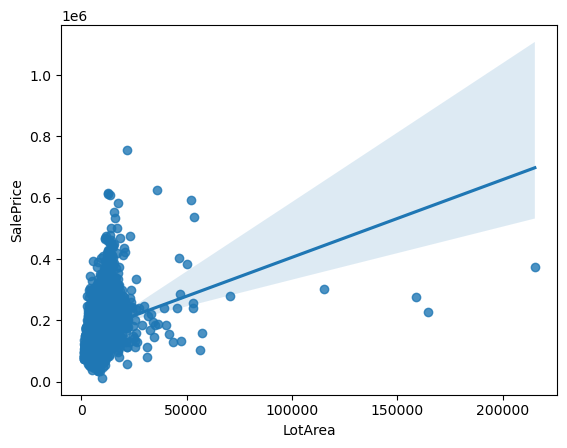

In [169]:
sns.regplot(x = housing['LotArea'], y = housing['SalePrice'])

## Multicollinearity
Many of these variables are engineered from one another or are related in other ways (GarageCars vs. GarageSF, Intangibles like Condition vs. Quality), so multicollinearity will be an issue here. Examine correllations among numerical columns to get a sense.

In [157]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

43


<Axes: >

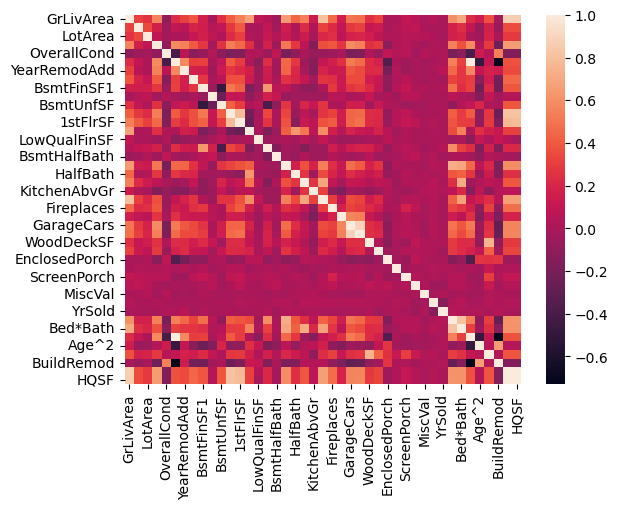

In [163]:
num_cols = []

for col in housing.drop(columns = ['SalePrice', 'PID', 'MSSubClass']).columns:
    if str(housing[col].dtype) == 'float64' or str(housing[col].dtype) == 'int64':
        num_cols.append(col)
print(len(num_cols))

<Axes: >

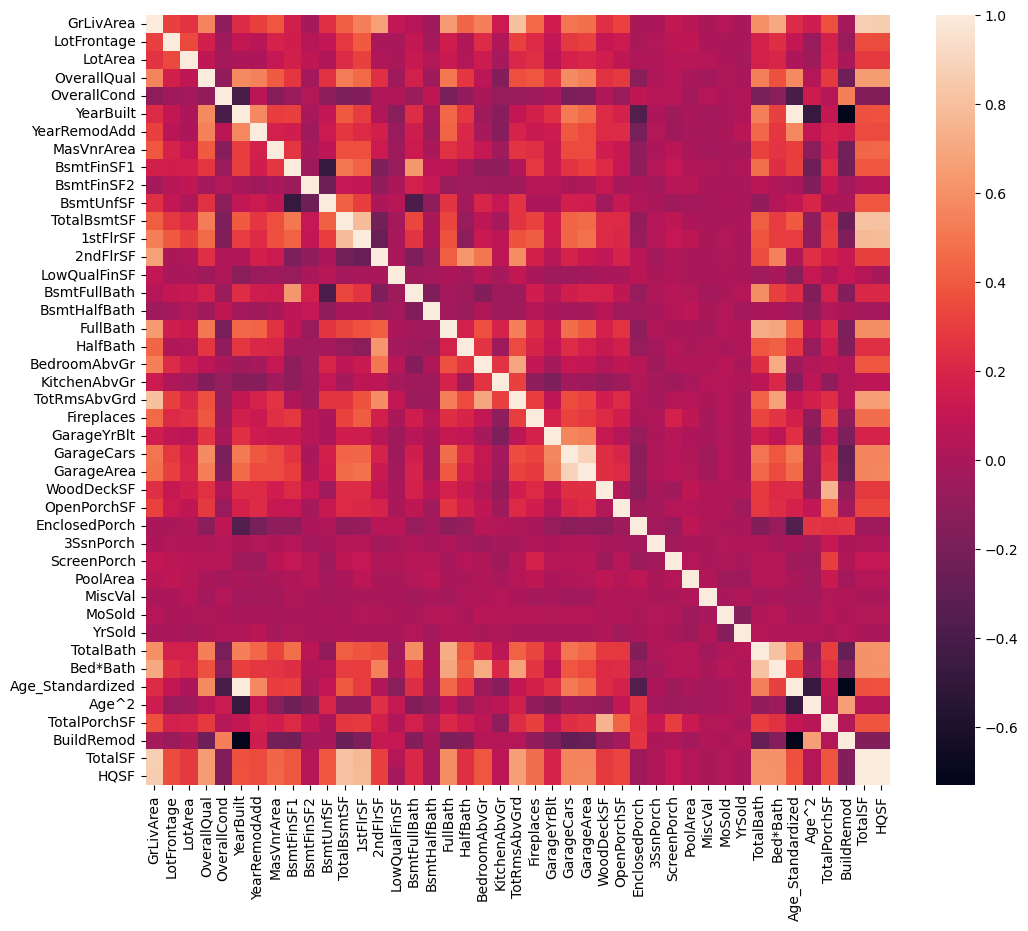

In [164]:
plt.figure(figsize=(12, 10))
sns.heatmap(housing[num_cols].corr())

In [177]:
housing[num_cols].columns

Index(['GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'TotalBath', 'Bed*Bath', 'Age_Standardized',
       'Age^2', 'TotalPorchSF', 'BuildRemod', 'TotalSF', 'HQSF'],
      dtype='object')

In [182]:
correlations = []
threshold = .7

for i, col1 in enumerate(housing[num_cols].columns):
    for col2 in housing[num_cols].columns[i+1:]:
        mycor = housing[num_cols][col1].corr(housing[num_cols][col2])
        if abs(mycor) >= threshold:
            correlations.append((col1, col2, round(mycor, 3)))
correlations

[('GrLivArea', 'TotRmsAbvGrd', 0.807),
 ('GrLivArea', 'Bed*Bath', 0.705),
 ('GrLivArea', 'TotalSF', 0.867),
 ('GrLivArea', 'HQSF', 0.862),
 ('YearBuilt', 'Age_Standardized', 1.0),
 ('YearBuilt', 'BuildRemod', -0.731),
 ('TotalBsmtSF', '1stFlrSF', 0.786),
 ('TotalBsmtSF', 'TotalSF', 0.811),
 ('TotalBsmtSF', 'HQSF', 0.814),
 ('1stFlrSF', 'TotalSF', 0.776),
 ('1stFlrSF', 'HQSF', 0.777),
 ('FullBath', 'TotalBath', 0.718),
 ('BedroomAbvGr', 'Bed*Bath', 0.713),
 ('GarageCars', 'GarageArea', 0.89),
 ('WoodDeckSF', 'TotalPorchSF', 0.748),
 ('TotalBath', 'Bed*Bath', 0.814),
 ('Age_Standardized', 'BuildRemod', -0.731),
 ('TotalSF', 'HQSF', 0.998)]

### Area and Rooms
Above grade living area correlates strongly with more rooms/square footage in total. Feature engineering here also contributes to multicollinearity here.
##### GrLivArea
TotRmsAbvGrd, 0.807  
Bed\*Bath, 0.705   
TotalSF, 0.867   
HQSF, 0.862  

##### TotalBsmtSF 
1stFlrSF, 0.786  
TotalSF, 0.811  
HQSF, 0.814

##### 1stFlrSF 
TotalSF, 0.776
HQSF, 0.777

#### Other Pairings
TotalSF, HQSF, 0.998
FullBath, TotalBath, 0.718  
BedroomAbvGr, Bed\*Bath, 0.713  
GarageCars, GarageArea, 0.89  
TotalBath, Bed\*Bath, 0.814: 
WoodDeckSF, TotalPorchSF, 0.748:

### Age and Remodeling
##### YearBuilt
Age_Standardized, 1.0  
BuildRemod, -0.731: scatterplot below  
 
Age_Standardized, BuildRemod -0.731: 


<Axes: xlabel='YearBuilt', ylabel='BuildRemod'>

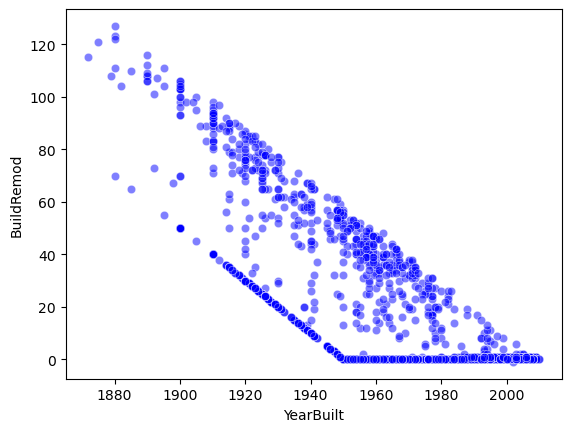

In [185]:
#YearBuilt vs BuildRemod:
#Strong negative correlation- indicates both a lack of infrastructure for reporting remodels in older homes (until midcentury).
#Newer homes are cut off from larger year intervals between build and remodel.
sns.scatterplot(x = housing['YearBuilt'], y = housing['BuildRemod'], color = 'blue', alpha = .5)

### Correllation with Sale Price:
Listing out the columns with the strongest correlations with Sale Price. The variables that have the clearest linear relationship with our target Sale Price largely concern the building's area and 'OverallQual'. A takeaway here is that Sale Price tends to rise and fall with the square footage of the building. Want a higher price? Need to find a way to make it "Bigger and Better".

HQSF                0.821910
TotalSF             0.819439
OverallQual         0.790661
GrLivArea           0.719980
TotalBsmtSF         0.653620
1stFlrSF            0.642623
TotalBath           0.640164
GarageCars          0.639016
GarageArea          0.635013
YearBuilt           0.544569
Age_Standardized    0.544569
FullBath            0.535175
YearRemodAdd        0.514720
MasVnrArea          0.498515
Bed*Bath            0.498081
TotRmsAbvGrd        0.490206
Fireplaces          0.488173
BsmtFinSF1          0.461056
TotalPorchSF        0.391365
LotFrontage         0.338369
WoodDeckSF          0.333332
OpenPorchSF         0.306629
BsmtFullBath        0.290867
HalfBath            0.285861
LotArea             0.274427
2ndFlrSF            0.263115
GarageYrBlt         0.246433
BsmtUnfSF           0.166873
BedroomAbvGr        0.151924
ScreenPorch         0.121392
3SsnPorch           0.031269
PoolArea            0.030849
BsmtFinSF2          0.022694
MoSold              0.012725
YrSold        

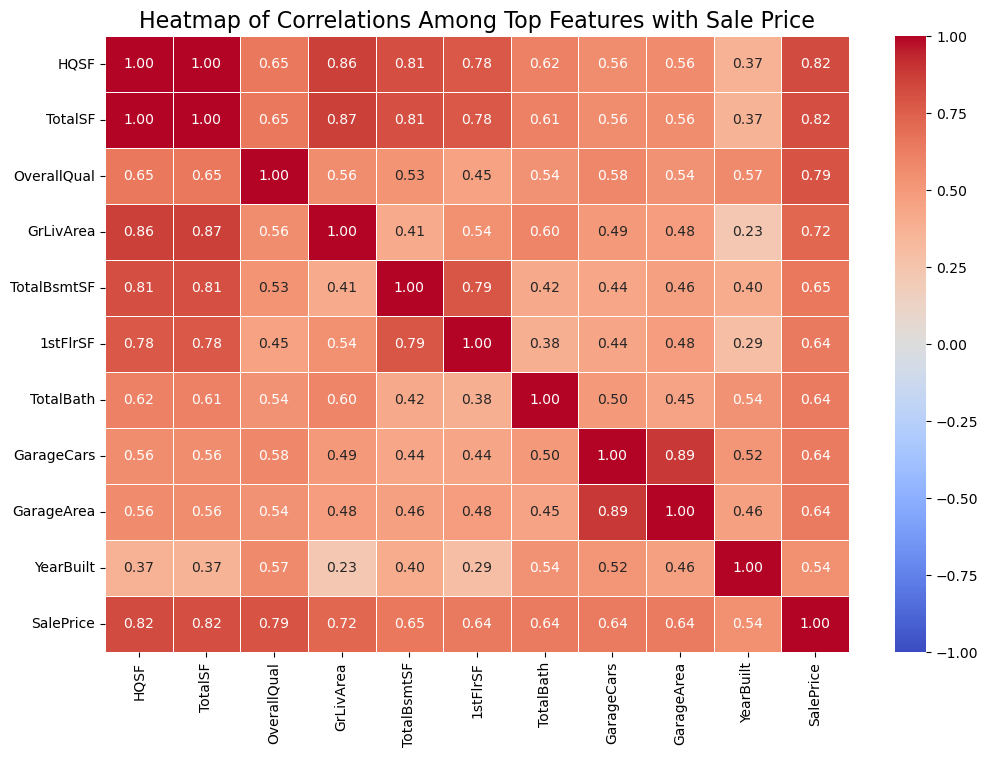

In [239]:
cors = housing.corr(numeric_only = True)['SalePrice'].sort_values(ascending=False)

print(cors[1:81])

#Some of these correlation coefficients are very very close to each other: watch for multicollinearity

tops = cors[1:11] #0 is 'SalePrice', cor = 1
selected_features = list(tops.index) + ['SalePrice']
print(selected_features)

correlation_matrix = housing[selected_features].corr()
plt.figure(figsize=(12,8))

sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', linewidths=.5, fmt= ".2f", vmin=-1, vmax=1)
plt.title('Heatmap of Correlations Among Top Features with Sale Price', fontsize = 16)
plt.show()

## EDA

In [186]:
housing.shape

(2579, 89)

array([[<Axes: title={'center': 'PID'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>],
       [<Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>

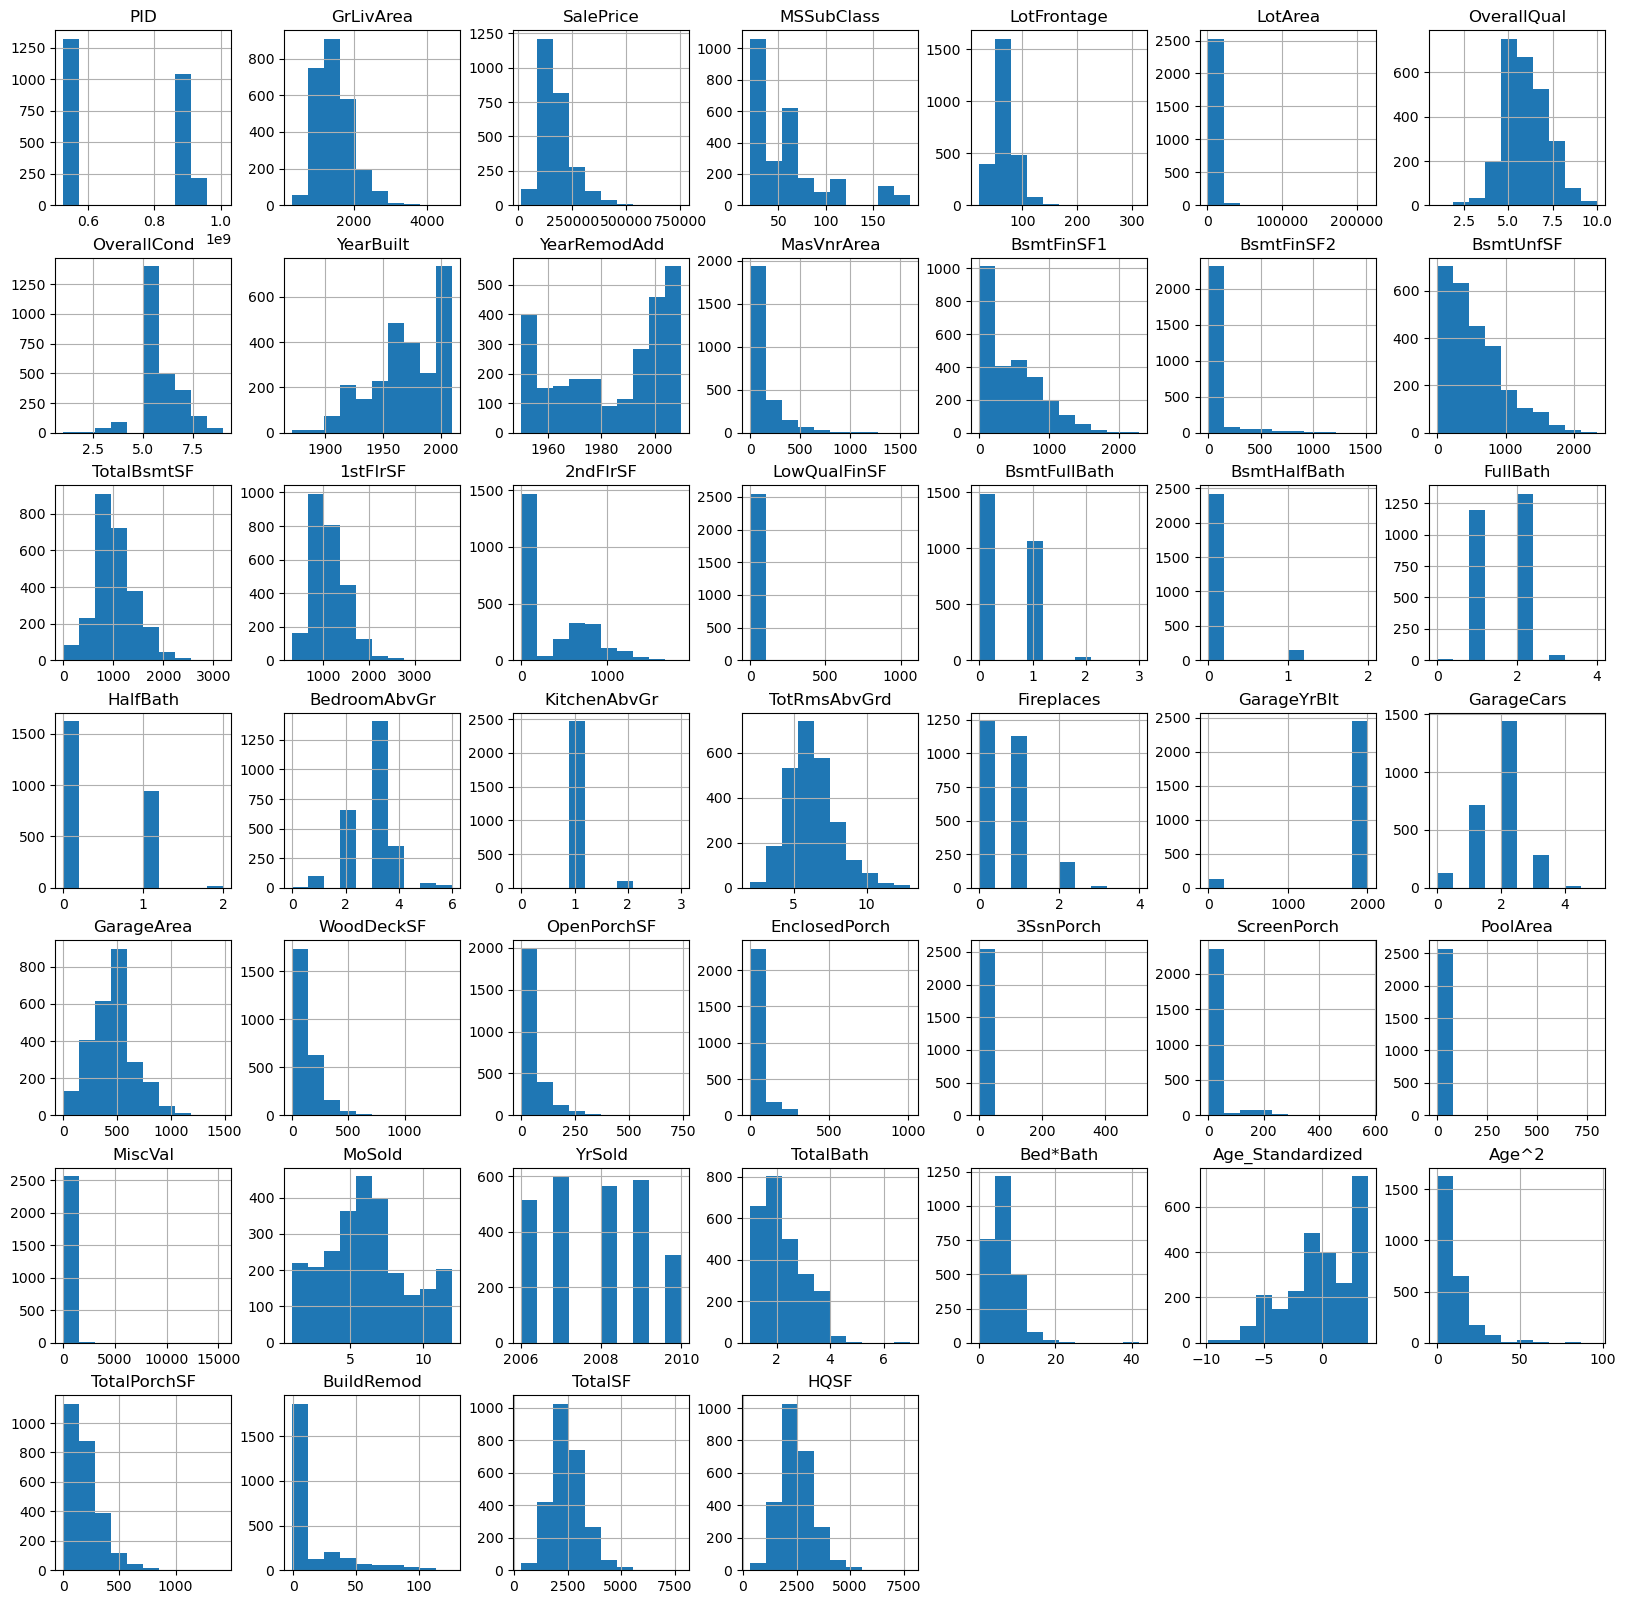

In [188]:
housing.hist(figsize = [20, 20])

In [209]:
import statsmodels.api as sm

ols_list = []
just_col_names = []

for col in housing.drop(columns = ['SalePrice', 'PID']).columns:
    mydf = housing[[col]]
    if str(housing[col].dtype) == 'object':
        mydf = pd.get_dummies(mydf, columns = [col], drop_first=True)
        mydf = mydf.replace({False: 0, True: 1})
    
    mydf = sm.add_constant(mydf)
    mymodel = sm.OLS(housing['SalePrice'], mydf).fit()
    ols_list.append([col, round(mymodel.rsquared, 3), mymodel.f_pvalue])
    just_col_names.append(col)
ols_list = sorted(ols_list, key=lambda x: x[1], reverse = True)

ols_df = pd.DataFrame(ols_list, columns = ['Col', 'R2', 'p-val'])
ols_df

Col     R2          p-val
0               HQSF  0.676   0.000000e+00
1            TotalSF  0.671   0.000000e+00
2        OverallQual  0.625   0.000000e+00
3       Neighborhood  0.560   0.000000e+00
4          GrLivArea  0.518   0.000000e+00
5          ExterQual  0.485   0.000000e+00
6           BsmtQual  0.481   0.000000e+00
7        KitchenQual  0.458   0.000000e+00
8        TotalBsmtSF  0.427  3.539129e-314
9           1stFlrSF  0.413  2.049975e-300
10         TotalBath  0.410  2.057251e-297
11        GarageCars  0.408  5.063521e-296
12        GarageArea  0.403  3.234434e-291
13       FireplaceQu  0.301  4.152159e-197
14         YearBuilt  0.297  4.129384e-199
15  Age_Standardized  0.297  4.129384e-199
16      GarageFinish  0.291  9.612867e-192
17          FullBath  0.286  4.306275e-191
18        Foundation  0.267  8.760468e-171
19      YearRemodAdd  0.265  1.752996e-174
20        MasVnrArea  0.249  4.166840e-162
21          Bed*Bath  0.248  8.756873e-162
22      TotRmsAbvGrd  0.240  5.145338e-156
23        Fireplaces  0.238  1.501363e-154
24        GarageType  0.234  3.058401e-145
25      BsmtFinType1  0.229  1.796610e-141
26        BsmtFinSF1  0.213  6.297975e-136
27         HeatingQC  0.203  8.284708e-125
28      BsmtExposure  0.182  8.943290e-111
29        MasVnrType  0.172  4.388628e-105
30       Exterior1st  0.155   1.020399e-83
31       Exterior2nd  0.154   4.341950e-82
32      TotalPorchSF  0.153   3.718641e-95
33          MSZoning  0.116   1.562380e-65
34       LotFrontage  0.114   4.190132e-70
35        WoodDeckSF  0.111   5.792391e-68
36          LotShape  0.094   5.834132e-55
37       OpenPorchSF  0.094   2.847805e-57
38        GarageQual  0.087   1.041888e-48
39      BsmtFullBath  0.085   1.838510e-51
40          HalfBath  0.082   1.081267e-49
41          SaleType  0.081   5.060043e-42
42        GarageCond  0.078   1.797182e-43
43           LotArea  0.075   8.746597e-46
44        PavedDrive  0.072   8.350874e-43
45     SaleCondition  0.072   8.624015e-40
46        HouseStyle  0.071   1.418436e-37
47          2ndFlrSF  0.069   4.242748e-42
48        CentralAir  0.066   2.103530e-40
49       GarageYrBlt  0.061   5.535087e-37
50         RoofStyle  0.059   7.644095e-32
51        Electrical  0.057   2.578895e-32
52        BuildRemod  0.052   4.646956e-32
53          BsmtCond  0.050   1.058169e-26
54        Condition1  0.045   4.605227e-22
55             Fence  0.036   1.246482e-19
56          BldgType  0.033   7.327041e-18
57       LandContour  0.032   2.556956e-18
58      BsmtFinType2  0.031   2.097135e-15
59         BsmtUnfSF  0.028   1.460814e-17
60        Condition2  0.025   1.968028e-11
61      BedroomAbvGr  0.023   8.722291e-15
62         ExterCond  0.022   1.131623e-11
63         LotConfig  0.021   3.319485e-11
64          RoofMatl  0.021   7.330425e-10
65             Alley  0.020   4.003592e-12
66     EnclosedPorch  0.015   3.430896e-10
67       ScreenPorch  0.015   6.223234e-10
68        Functional  0.014   3.617464e-06
69      KitchenAbvGr  0.013   6.492467e-09
70            PoolQC  0.012   3.972435e-06
71       OverallCond  0.010   2.659521e-07
72           Heating  0.008   1.003564e-03
73        MSSubClass  0.007   1.703322e-05
74         LandSlope  0.006   2.870013e-04
75       MiscFeature  0.004   2.721979e-02
76            Street  0.003   1.039459e-02
77         Utilities  0.001   8.371673e-02
78        BsmtFinSF2  0.001   2.492951e-01
79      LowQualFinSF  0.001   1.175484e-01
80      BsmtHalfBath  0.001   8.645198e-02
81         3SsnPorch  0.001   1.123857e-01
82          PoolArea  0.001   1.172888e-01
83           MiscVal  0.000   3.381307e-01
84            MoSold  0.000   5.183310e-01
85            YrSold  0.000   9.489747e-01
86             Age^2  0.000   4.272054e-01

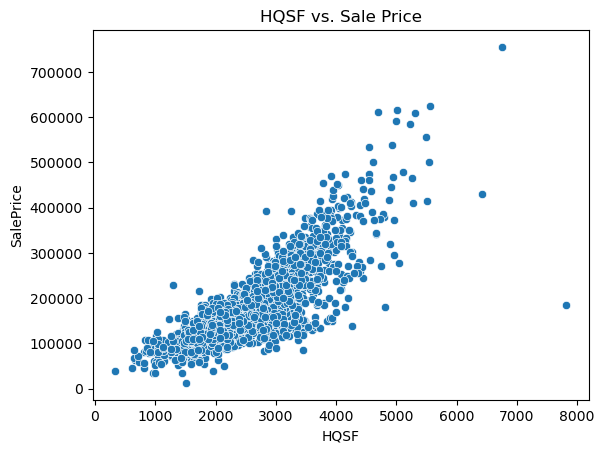

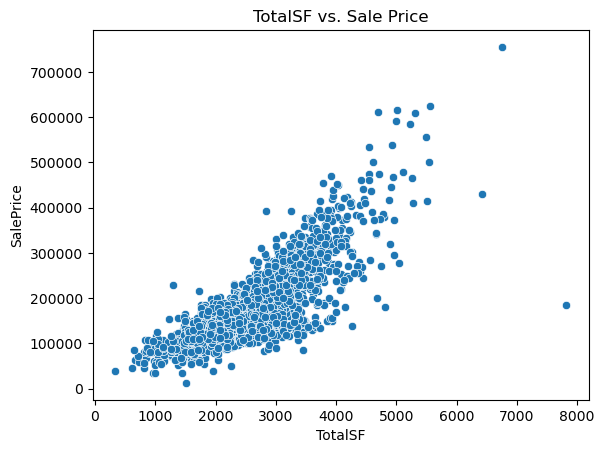

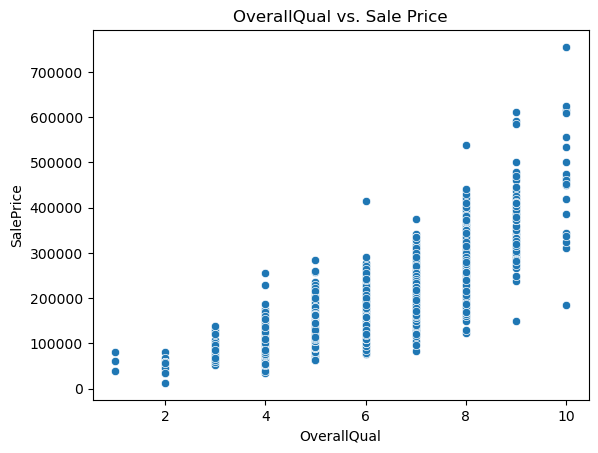

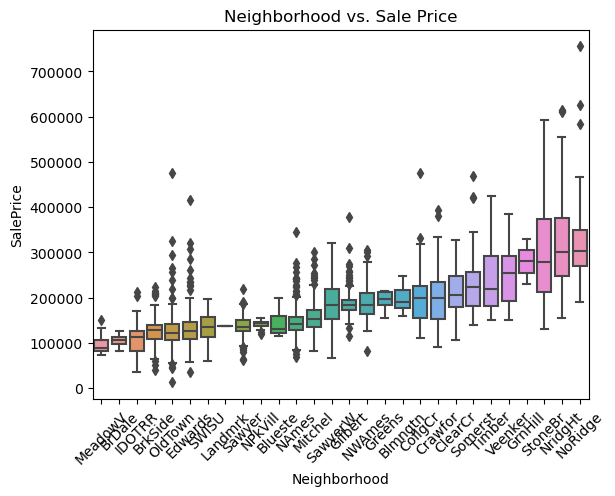

<Figure size 2500x1500 with 0 Axes>

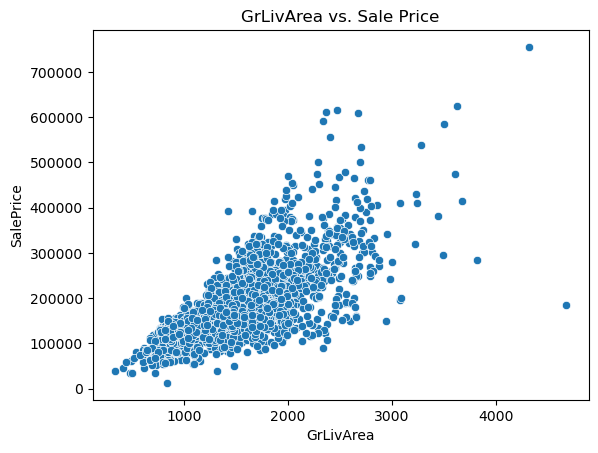

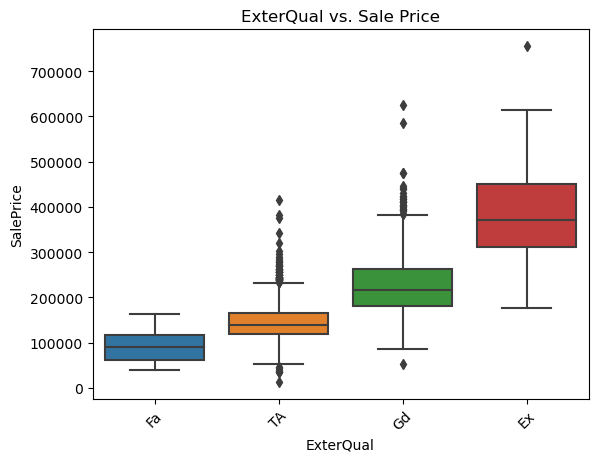

<Figure size 2500x1500 with 0 Axes>

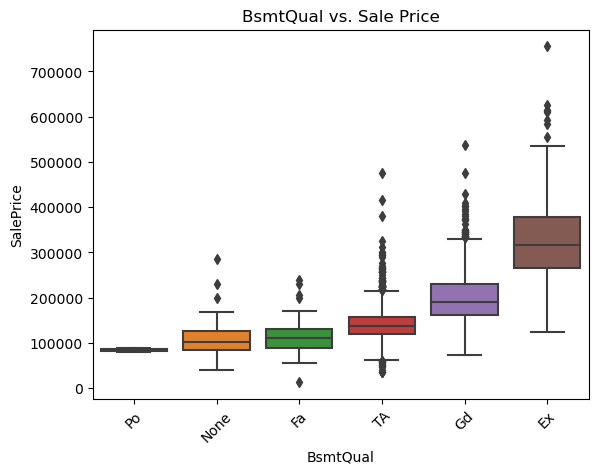

<Figure size 2500x1500 with 0 Axes>

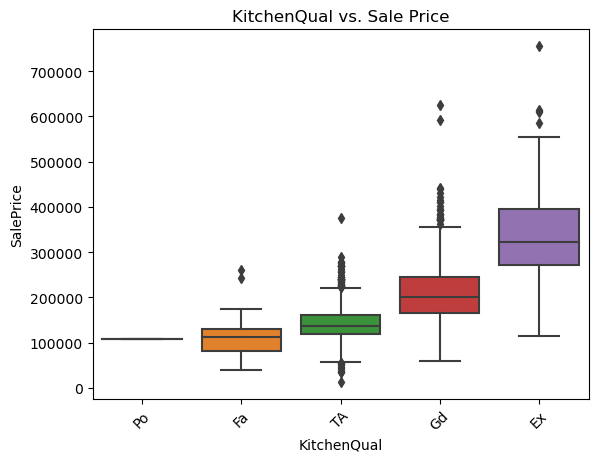

<Figure size 2500x1500 with 0 Axes>

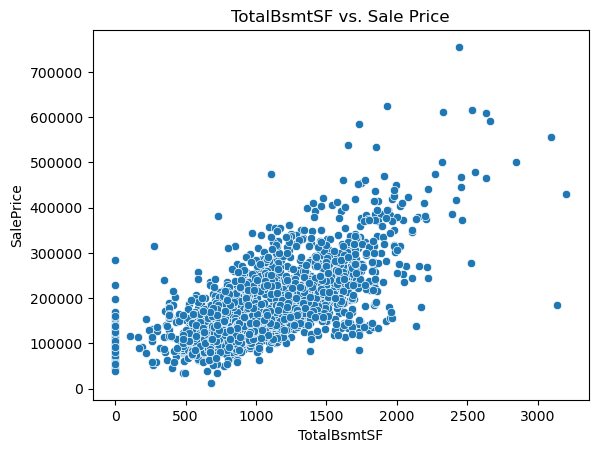

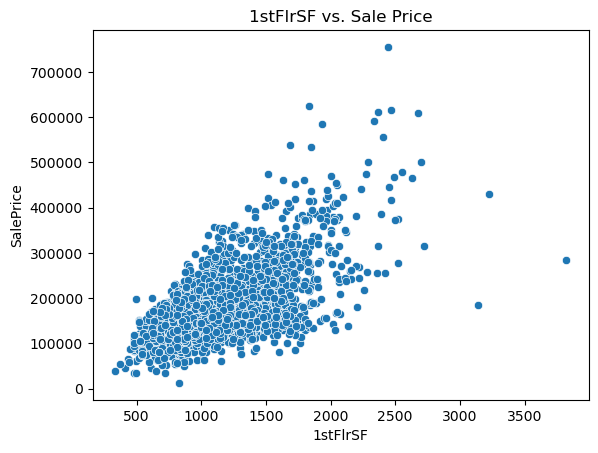

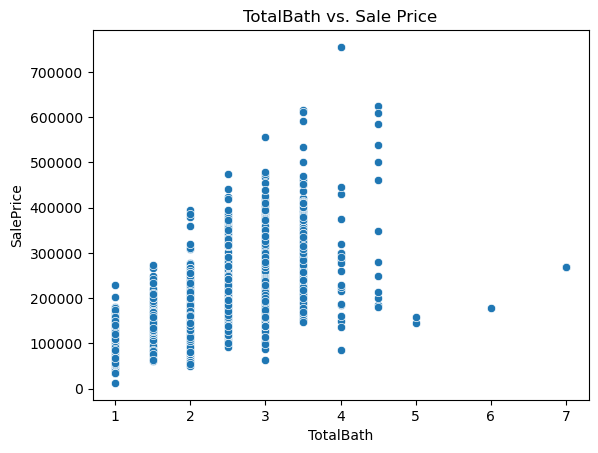

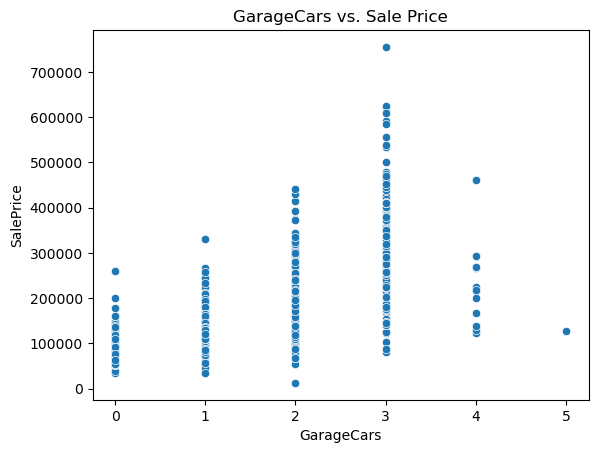

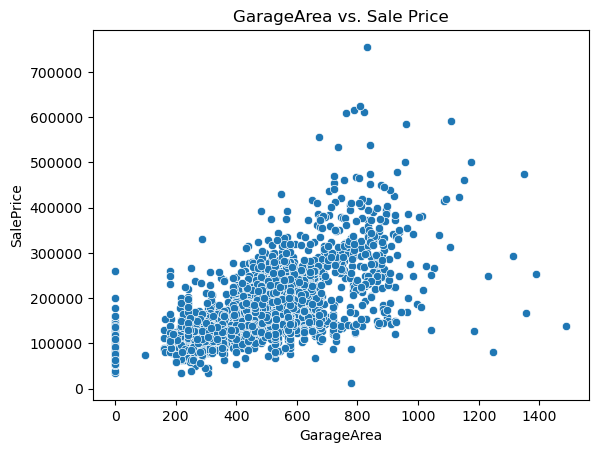

In [232]:
#Visualize relationship between variables with the top R^2: scatter for numerical, boxplots for categorical

for i in range(13):
    col = ols_list[i][0]
    mydf = housing.loc[:, [col, 'SalePrice']]
    
    #Scatterplot
    
    if housing[col].dtype in ['int64', 'float64']:
        sns.scatterplot(data = mydf, x = col, y = 'SalePrice')
        plt.title(f"{col} vs. Sale Price")
        plt.show()
    
    #Boxplot
    
    else:
        sorted_cats = mydf.groupby(col)['SalePrice'].mean().sort_values().index
        mydf[col] = pd.Categorical(mydf[col], categories = sorted_cats, ordered = True)
        mydf_sorted = mydf.sort_values(by=col)
        plot = sns.boxplot(data = mydf_sorted, x = col, y = 'SalePrice')
        plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)
        plt.title(f"{col} vs. Sale Price")
        plt.figure(figsize=(25, 15))
        plt.show()
        

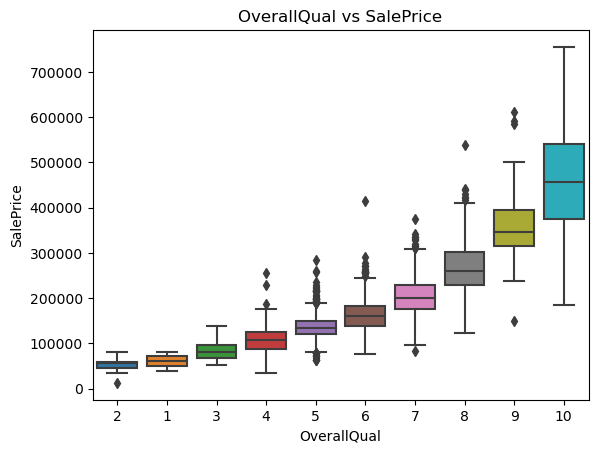

In [234]:
#OverallQual as Boxplot
oq = 'OverallQual'
mydf = housing.loc[:, [oq, 'SalePrice']]
sorted_cats = mydf.groupby(oq)['SalePrice'].mean().sort_values().index
mydf[oq] = pd.Categorical(mydf[oq], categories = sorted_cats, ordered = True)
mydf_sorted = mydf.sort_values(by=oq)
plot = sns.boxplot(data = mydf_sorted, x = oq, y = 'SalePrice')
plt.title("OverallQual vs SalePrice")
plt.show()

## Neighborhoods over Time
Understanding how neighborhoods have changed over time is an important aspect of understanding the Ames housing Market. As you move through the facetgrid below, you can see the neighborhoods beginning (from where?), expanding to (where?)--- neighborhoods typified by older construction, newer neighborhoods, etc. Which of these newer ones are more expensive (testing?).

In [258]:
bins = range(-11, 5)

housing['Age_Stand_Cut'] = housing['Age_Standardized'].apply(int)

housing[['Age_Standardized', 'Age_Stand_Cut']]

Age_Standardized  Age_Stand_Cut
1           -3.132571             -3
2            1.367429              1
3           -4.032571             -4
4           -7.032571             -7
5            3.067429              3
..                ...            ...
759         -5.432571             -5
760         -1.532571             -1
761         -2.132571             -2
762          2.967429              2
763          2.267429              2

[2579 rows x 2 columns]

/Users/joesferra/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/joesferra/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


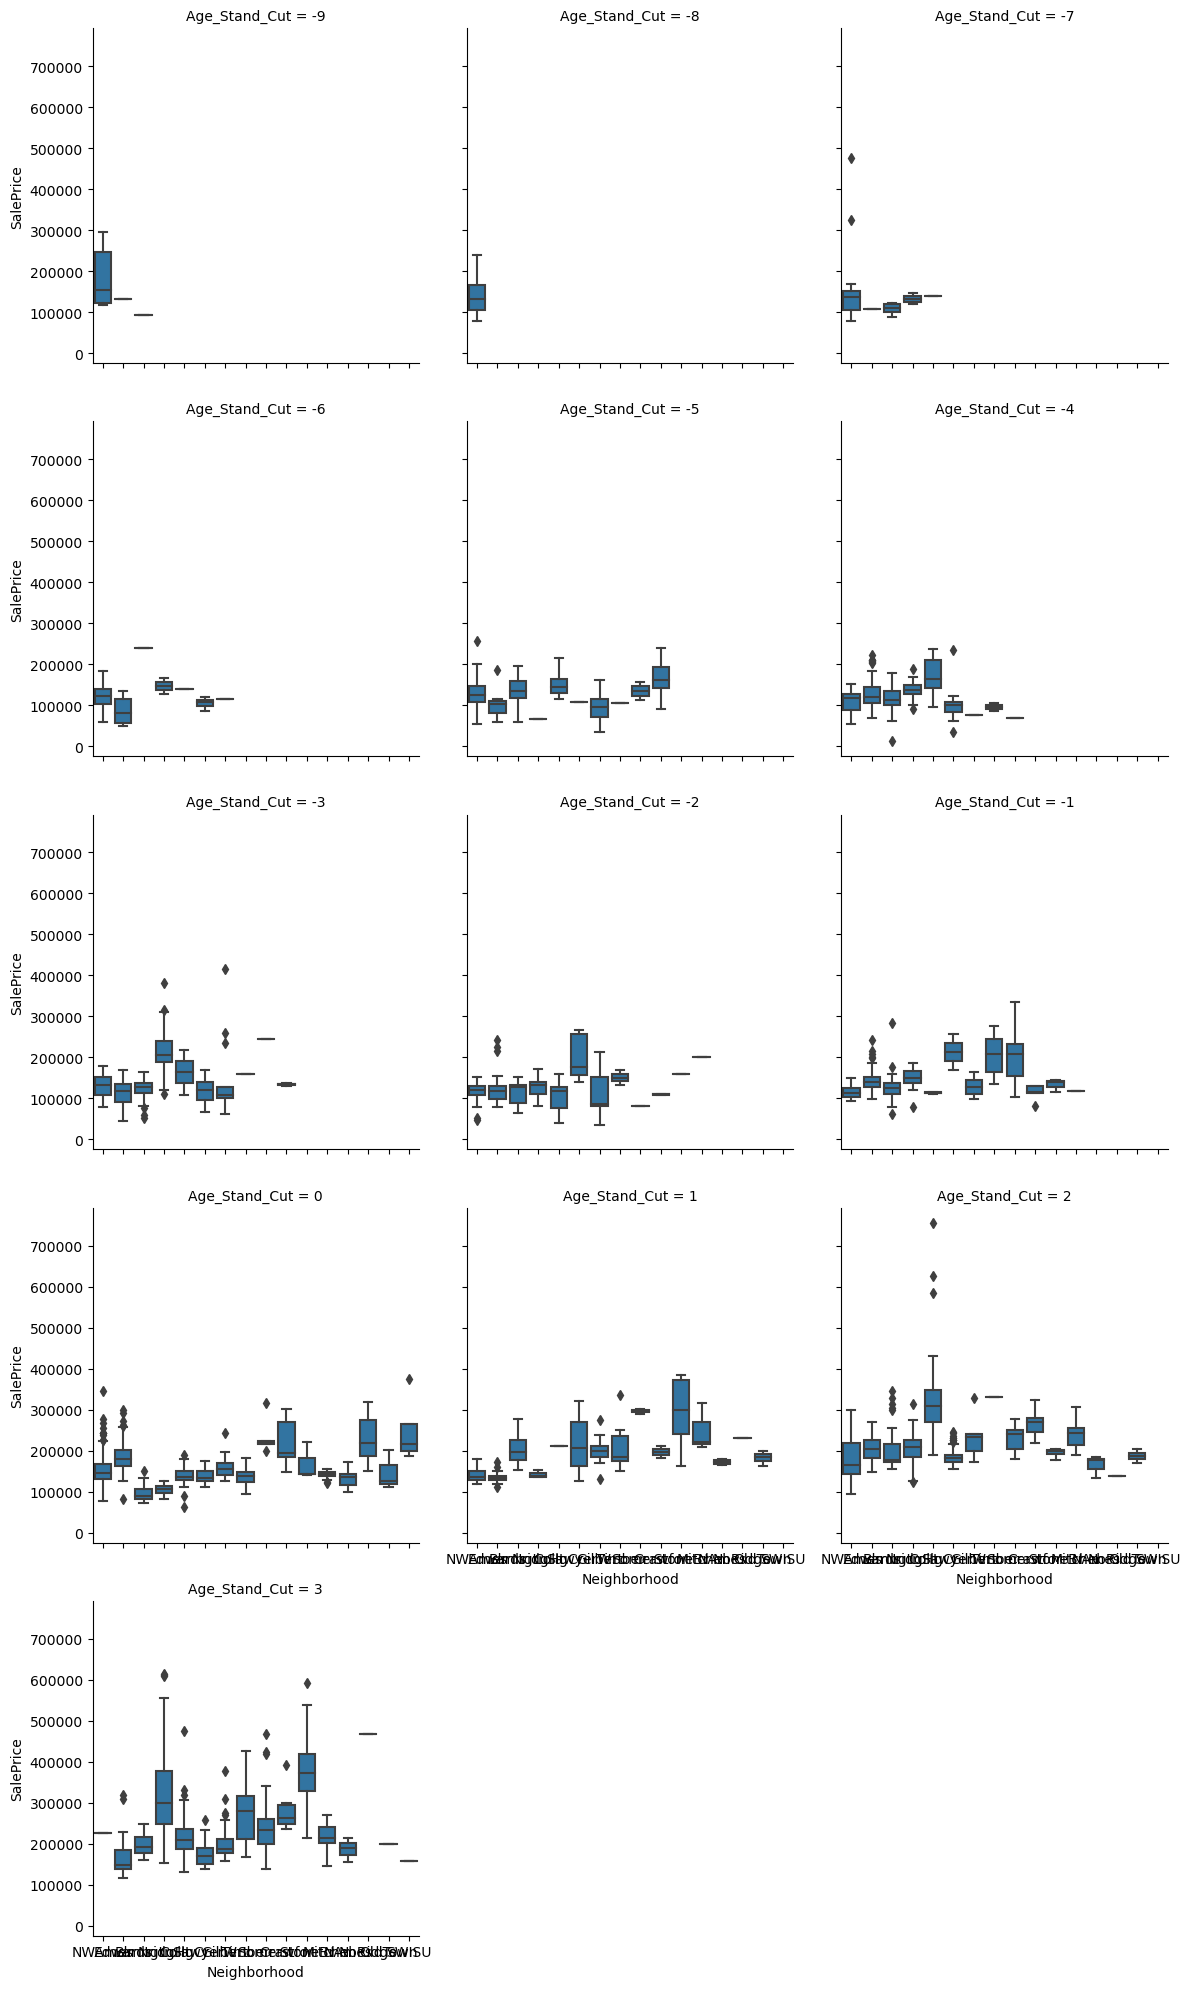

In [260]:
mydf = housing.loc[:, ['Neighborhood', 'SalePrice', 'Age_Stand_Cut']]

g = sns.FacetGrid(mydf, col='Age_Stand_Cut', col_wrap=3, height=4)
g.map(sns.boxplot, 'Neighborhood', 'SalePrice')

TypeError: cannot convert the series to <class 'int'>